In [1]:
import nltk
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.metrics import f1_score

df = pd.read_csv('smsspamcollection/SMSSpamCollection', sep='\t', names=["class_label","messages"] ) 

#cleaning message
def clean_message(msg):
    msg = msg.lower() #convert to lowercase
    lemmatizer= WordNetLemmatizer()
    message_tokens = word_tokenize(msg) #tokenize, gives a list of words in the message.
    no_punctuation_tokens = [word for word in message_tokens if word.isalpha()]
    tokens_without_sw_lemm = [ lemmatizer.lemmatize(word) for word in no_punctuation_tokens if not word in stopwords.words()] #if word not part of stopword set it will be lemmatized
    filtered_message = (" ").join(tokens_without_sw_lemm) #convert the list back into a sentence/message
            
    return  filtered_message


In [2]:
df['class_label'].value_counts()# GIVES COUNT FOR SPAMS AND HAMS 


ham     4825
spam     747
Name: class_label, dtype: int64

upsampling

In [3]:
from sklearn.utils import resample# BALANCING DATA

In [4]:
df_ham = df[df.class_label=='ham']
df_spam = df[df.class_label=='spam']
df_spam_upsampled = resample(df_spam, 
                                 replace=True,    
                                 n_samples=4825,    
                                 random_state=123) 
df.columns
df.rename(columns = {'v1':'class_label', 'v2':'message'}, inplace = True)
df_balanced = pd.concat([df_spam_upsampled, df_ham])

MSG_LIST=df_balanced["messages"].tolist() #converting message column (series obj) to list

#print(*MSG_LIST, sep ="\n")
for i in range(len(MSG_LIST)):
    print("Before: ")
    print(MSG_LIST[i])
    MSG_LIST[i]=clean_message(MSG_LIST[i])
    print("After: ")
    print(MSG_LIST[i])
df_balanced['Cleaned_MSGS']=pd.Series(MSG_LIST)
df_balanced

Before: 
Free msg: Single? Find a partner in your area! 1000s of real people are waiting to chat now!Send CHAT to 62220Cncl send STOPCS 08717890890£1.50 per msg
After: 
free msg single find partner area real people waiting chat send chat send stopcs msg
Before: 
New Tones This week include: 1)McFly-All Ab.., 2) Sara Jorge-Shock.. 3) Will Smith-Switch.. To order follow instructions on next message
After: 
new tone week include sara order follow instruction next message
Before: 
FreeMsg>FAV XMAS TONES!Reply REAL
After: 
freemsg fav xmas tone reply real
Before: 
You have won a Nokia 7250i. This is what you get when you win our FREE auction. To take part send Nokia to 86021 now. HG/Suite342/2Lands Row/W1JHL 16+ 
After: 
nokia get win free auction part send nokia
Before: 
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
After: 
hi year old work lapdancer love sex text live bedroom t

After: 
twinks bear scallies skin jock calling miss weekend fun call stop text call nat rate
Before: 
1000's of girls many local 2 u who r virgins 2 this & r ready 2 4fil ur every sexual need. Can u 4fil theirs? text CUTE to 69911(£1.50p. m)
After: 
girl many local r virgin r ready ur every sexual need text cute
Before: 
What do U want for Xmas? How about 100 free text messages & a new video phone with half price line rental? Call free now on 0800 0721072 to find out more!
After: 
xmas free text message new video phone half price line rental call free find
Before: 
<Forwarded from 448712404000>Please CALL 08712404000 immediately as there is an urgent message waiting for you.
After: 
forwarded please call immediately urgent message waiting
Before: 
For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk.
After: 
ur chance win cash every wk txt action custcare
Before: 
You have 1 new voicemail. Please call 08719181503
Aft

After: 
forwarded hi mailbox messaging sm alert match please call back retrieve message match
Before: 
YOU VE WON! Your 4* Costa Del Sol Holiday or £5000 await collection. Call 09050090044 Now toClaim. SAE, TC s, POBox334, Stockport, SK38xh, Cost£1.50/pm, Max10mins
After: 
costa sol holiday await collection call toclaim sae tc stockport
Before: 
You will be receiving this week's Triple Echo ringtone shortly. Enjoy it!
After: 
receiving week triple echo ringtone shortly enjoy
Before: 
SIX chances to win CASH! From 100 to 20,000 pounds txt> CSH11 and send to 87575. Cost 150p/day, 6days, 16+ TsandCs apply Reply HL 4 info
After: 
six chance win cash pound txt send cost tsandcs apply reply hl info
Before: 
URGENT! Your mobile No 07xxxxxxxxx won a £2,000 bonus caller prize on 02/06/03! this is the 2nd attempt to reach YOU! call 09066362231 ASAP! BOX97N7QP, 150PPM
After: 
urgent mobile bonus caller prize attempt reach call asap
Before: 
Ringtone Club: Gr8 new polys direct to your mobile every

After: 
thanks ringtone order reference number mobile charged tone arrive please call customer service text txtstar
Before: 
Your free ringtone is waiting to be collected. Simply text the password "MIX" to 85069 to verify. Get Usher and Britney. FML, PO Box 5249, MK17 92H. 450Ppw 16
After: 
free ringtone waiting collected simply text password mix verify get usher britney fml box
Before: 
Santa calling! Would your little ones like a call from Santa Xmas Eve? Call 09077818151 to book you time. Calls1.50ppm last 3mins 30s T&C www.santacalling.com
After: 
santa calling would little one like call santa xmas eve call book time last
Before: 
You are guaranteed the latest Nokia Phone, a 40GB iPod MP3 player or a £500 prize! Txt word: COLLECT to No: 83355! IBHltd LdnW15H 150p/Mtmsgrcvd18
After: 
guaranteed latest nokia phone ipod player prize txt word collect ibhltd
Before: 
You have an important customer service announcement from PREMIER.
After: 
important customer service announcement premier

After: 
free week entry textpod chance win ipod cash every wk txt t c custcare
Before: 
Free-message: Jamster!Get the crazy frog sound now! For poly text MAD1, for real text MAD2 to 88888. 6 crazy sounds for just 3 GBP/week! 16+only! T&C's apply
After: 
jamster get crazy frog sound poly text real text crazy sound apply
Before: 
Loan for any purpose £500 - £75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'
After: 
loan purpose homeowner tenant welcome previously refused still help call free text back
Before: 
Ur cash-balance is currently 500 pounds - to maximize ur cash-in now send GO to 86688 only 150p/msg. CC 08718720201 HG/Suite342/2Lands Row/W1J6HL
After: 
ur currently pound maximize ur send go cc
Before: 
Bears Pic Nick, and Tom, Pete and ... Dick. In fact, all types try gay chat with photo upload call 08718730666 (10p/min). 2 stop texts call 08712460324
After: 
bear nick tom dick fact type try gay 

After: 
boltblue tone reply poly mono cha cha slide yeah slow jamz toxic stop tone txt
Before: 
Show ur colours! Euro 2004 2-4-1 Offer! Get an England Flag & 3Lions tone on ur phone! Click on the following service message for info!
After: 
show ur colour euro offer get england flag tone ur phone click following service message info
Before: 
PRIVATE! Your 2003 Account Statement for <fone no> shows 800 un-redeemed S. I. M. points. Call 08715203656 Identifier Code: 42049 Expires 26/10/04
After: 
private account statement fone show point call identifier code expires
Before: 
YOU HAVE WON! As a valued Vodafone customer our computer has picked YOU to win a £150 prize. To collect is easy. Just call 09061743386 
After: 
valued vodafone customer computer picked win prize collect easy call
Before: 
You've won tkts to the EURO2004 CUP FINAL or £800 CASH, to collect CALL 09058099801 b4190604, POBOX 7876150ppm
After: 
tkts cup final cash collect call pobox
Before: 
Dear Voucher Holder, 2 claim this

After: 
buy space invader chance win orig arcade game console press game arcade std wap charge see term setting purchase
Before: 
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!
After: 
please call customer service representative freephone guaranteed cash prize
Before: 
You have won a Nokia 7250i. This is what you get when you win our FREE auction. To take part send Nokia to 86021 now. HG/Suite342/2Lands Row/W1JHL 16+ 
After: 
nokia get win free auction part send nokia
Before: 
SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV
After: 
sm ac sptv new jersey devil detroit red wing play ice hockey correct incorrect reply sptv
Before: 
You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p p£3.99
After: 
awarded sipix digital camera

After: 
xmas offer latest motorola sonyericsson nokia free bluetooth dvd double min txt orange call
Before: 
Urgent UR awarded a complimentary trip to EuroDisinc Trav, Aco&Entry41 Or £1000. To claim txt DIS to 87121 18+6*£1.50(moreFrmMob. ShrAcomOrSglSuplt)10, LS1 3AJ
After: 
urgent ur awarded complimentary trip eurodisinc trav aco claim txt dis morefrmmob shracomorsglsuplt
Before: 
SMS. ac Blind Date 4U!: Rodds1 is 21/m from Aberdeen, United Kingdom. Check Him out http://img. sms. ac/W/icmb3cktz8r7!-4 no Blind Dates send HIDE
After: 
sm ac blind date aberdeen united kingdom check http sm blind date send hide
Before: 
Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min
After: 
explicit sex sec ring cost
Before: 
Guess who am I?This is the first time I created a web page WWW.ASJESUS.COM read all I wrote. I'm waiting for your opinions. I want to be your friend 1/1
After: 
guess first time created web page read wrote waiting opinion friend
Before: 
SMS SERVICES For your incl

After: 
free msg single find partner area real people waiting chat send chat send stopcs msg
Before: 
Update_Now - Xmas Offer! Latest Motorola, SonyEricsson & Nokia & FREE Bluetooth! Double Mins & 1000 Txt on Orange. Call MobileUpd8 on 08000839402 or call2optout/F4Q=
After: 
xmas offer latest motorola sonyericsson nokia free bluetooth double min txt orange call
Before: 
Fantasy Football is back on your TV. Go to Sky Gamestar on Sky Active and play £250k Dream Team. Scoring starts on Saturday, so register now!SKY OPT OUT to 88088
After: 
fantasy football back tv go sky gamestar sky active play dream team scoring start saturday register sky opt
Before: 
2/2 146tf150p
After: 

Before: 
We tried to contact you re your reply to our offer of 750 mins 150 textand a new video phone call 08002988890 now or reply for free delivery tomorrow
After: 
tried contact reply offer min textand new video phone call reply free delivery tomorrow
Before: 
Congrats 2 mobile 3G Videophones R yours. call 090634

After: 
contacted dating service someone know find call land line
Before: 
You have 1 new message. Please call 08712400200.
After: 
new message please call
Before: 
Dear Voucher Holder, 2 claim this weeks offer, at your PC go to http://www.e-tlp.co.uk/expressoffer Ts&Cs apply.2 stop texts txt STOP to 80062.
After: 
dear voucher holder claim week offer pc go http t c stop text txt stop
Before: 
PRIVATE! Your 2003 Account Statement for 07973788240 shows 800 un-redeemed S. I. M. points. Call 08715203649 Identifier Code: 40533 Expires 31/10/04
After: 
private account statement show point call identifier code expires
Before: 
Join the UK's horniest Dogging service and u can have sex 2nite!. Just sign up and follow the instructions. Txt ENTRY to 69888 now! Nyt.EC2A.3LP.msg@150p
After: 
join uk horniest dogging service sex sign follow instruction txt entry
Before: 
Your 2004 account for 07XXXXXXXXX shows 786 unredeemed points. To claim call 08719181259 Identifier code: XXXXX Expires 26.03.05


After: 
today voda number ending selected receive reward match please call quoting claim code standard rate apply
Before: 
Congrats! Nokia 3650 video camera phone is your Call 09066382422 Calls cost 150ppm Ave call 3mins vary from mobiles 16+ Close 300603 post BCM4284 Ldn WC1N3XX
After: 
congrats nokia video camera phone call call cost ave call vary mobile close post ldn
Before: 
Thanks for your ringtone order, reference number X49. Your mobile will be charged 4.50. Should your tone not arrive please call customer services 09065989182. From: [colour=red]text[/colour]TXTstar
After: 
thanks ringtone order reference number mobile charged tone arrive please call customer service text txtstar
Before: 
PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S. I. M. points. Call 08719899230 Identifier Code: 41685 Expires 07/11/04
After: 
private account statement show point call identifier code expires
Before: 
YOU HAVE WON! As a valued Vodafone customer our computer has picked YOU to

After: 
sm service inclusive text credit pls goto unsubscribe stop extra charge
Before: 
U have a secret admirer. REVEAL who thinks U R So special. Call 09065174042. To opt out Reply REVEAL STOP. 1.50 per msg recd. Cust care 07821230901
After: 
secret admirer reveal think r special call opt reply reveal stop msg recd cust
Before: 
network operator. The service is free. For T & C's visit 80488.biz
After: 
network operator service free visit
Before: 
You are awarded a SiPix Digital Camera! call 09061221061 from landline. Delivery within 28days. T Cs Box177. M221BP. 2yr warranty. 150ppm. 16 . p p£3.99
After: 
awarded sipix digital camera call landline delivery within c warranty p
Before: 
Do you ever notice that when you're driving, anyone going slower than you is an idiot and everyone driving faster than you is a maniac?
After: 
ever notice driving anyone going slower idiot everyone driving faster maniac
Before: 
22 days to kick off! For Euro2004 U will be kept up to date with the latest

After: 
december mobile entitled update latest colour camera mobile free call mobile update co free
Before: 
Eerie Nokia tones 4u, rply TONE TITLE to 8007 eg TONE DRACULA to 8007 Titles: GHOST, ADDAMSFA, MUNSTERS, EXORCIST, TWILIGHT www.getzed.co.uk POBox36504W45WQ 150p
After: 
eerie nokia tone rply tone title tone dracula title ghost addamsfa munsters exorcist twilight
Before: 
You are being contacted by our dating service by someone you know! To find out who it is, call from a land line 09050000878. PoBox45W2TG150P
After: 
contacted dating service someone know find call land line
Before: 
We currently have a message awaiting your collection. To collect your message just call 08718723815.
After: 
currently message awaiting collection collect message call
Before: 
URGENT! We are trying to contact U. Todays draw shows that you have won a £2000 prize GUARANTEED. Call 09058094507 from land line. Claim 3030. Valid 12hrs only
After: 
urgent trying contact today draw show prize guaranteed ca

After: 
xmas reward waiting computer randomly picked loyal mobile customer receive reward call
Before: 
FREE NOKIA Or Motorola with upto 12mths 1/2price linerental, 500 FREE x-net mins&100txt/mth FREE B'tooth*. Call Mobileupd8 on 08001950382 or call 2optout/D3WV
After: 
free nokia motorola upto linerental free min free call call
Before: 
You have 1 new voicemail. Please call 08719181503
After: 
new voicemail please call
Before: 
You are a winner you have been specially selected to receive £1000 cash or a £2000 award. Speak to a live operator to claim call 087123002209am-7pm. Cost 10p
After: 
winner specially selected receive cash award speak live operator claim call cost
Before: 
Sex up ur mobile with a FREE sexy pic of Jordan! Just text BABE to 88600. Then every wk get a sexy celeb! PocketBabe.co.uk 4 more pics. 16 £3/wk 087016248
After: 
sex ur mobile free sexy jordan text babe every wk get sexy celeb pic
Before: 
For sale - arsenal dartboard. Good condition but no doubles or trebles

After: 
tell call claim prize enter ur mobile personal detail prompt careful
Before: 
URGENT! Your Mobile number has been awarded with a £2000 Bonus Caller Prize. Call 09058095201 from land line. Valid 12hrs only
After: 
urgent mobile number awarded bonus caller prize call land line valid
Before: 
Thanks for your ringtone order, ref number R836. Your mobile will be charged £4.50. Should your tone not arrive please call customer services on 09065069154
After: 
thanks ringtone order ref number mobile charged tone arrive please call customer service
Before: 
+123 Congratulations - in this week's competition draw u have won the £1450 prize to claim just call 09050002311 b4280703. T&Cs/stop SMS 08718727868. Over 18 only 150ppm
After: 
congratulation week competition draw prize claim call sm
Before: 
Someone U know has asked our dating service 2 contact you! Cant guess who? CALL 09058095107 NOW all will be revealed. POBox 7, S3XY 150p 
After: 
someone know asked dating service contact cant g

After: 
nokia get win free auction part send nokia
Before: 
URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
After: 
urgent week free membership prize jackpot txt word claim lccltd pobox
Before: 
all the lastest from Stereophonics, Marley, Dizzee Racal, Libertines and The Strokes! Win Nookii games with Flirt!! Click TheMob WAP Bookmark or text WAP to 82468
After: 
lastest stereophonics marley dizzee racal libertine stroke win nookii game flirt click themob wap bookmark text wap
Before: 
You have 1 new message. Call 0207-083-6089
After: 
new message call
Before: 
You have 1 new message. Call 0207-083-6089
After: 
new message call
Before: 
Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged
After: 
thanks subscription ringtone uk mobile charged please confirm replying yes reply

After: 
attempt contract week top prize either cash prize call
Before: 
Get the official ENGLAND poly ringtone or colour flag on yer mobile for tonights game! Text TONE or FLAG to 84199. Optout txt ENG STOP Box39822 W111WX £1.50
After: 
get official england poly ringtone colour flag yer mobile tonight game text tone flag optout txt eng stop
Before: 
Your account has been credited with 500 FREE Text Messages. To activate, just txt the word: CREDIT to No: 80488 T&Cs www.80488.biz
After: 
account credited free text message activate txt word credit c
Before: 
WIN a year supply of CDs 4 a store of ur choice worth £500 & enter our £100 Weekly draw txt MUSIC to 87066 Ts&Cs www.Ldew.com.subs16+1win150ppmx3
After: 
win year supply cd store ur choice worth enter weekly draw txt music t c
Before: 
This is the 2nd time we have tried to contact u. U have won the £400 prize. 2 claim is easy, just call 087104711148 NOW! Only 10p per minute. BT-national-rate
After: 
time tried contact prize claim easy

After: 
sunshine quiz wkly q win top sony dvd player know country algarve txt ansr sp tyrone
Before: 
BIG BROTHER ALERT! The computer has selected u for 10k cash or #150 voucher. Call 09064018838. NTT PO Box CRO1327 18+ BT Landline Cost 150ppm mobiles vary
After: 
big brother alert computer selected cash voucher call ntt box bt landline cost mobile vary
Before: 
Jamster! To get your free wallpaper text HEART to 88888 now! T&C apply. 16 only. Need Help? Call 08701213186.
After: 
jamster get free wallpaper text heart apply need help call
Before: 
Wan2 win a Meet+Greet with Westlife 4 U or a m8? They are currently on what tour? 1)Unbreakable, 2)Untamed, 3)Unkempt. Text 1,2 or 3 to 83049. Cost 50p +std text
After: 
win westlife currently tour unbreakable untamed unkempt text cost text
Before: 
This message is brought to you by GMW Ltd. and is not connected to the
After: 
message brought gmw connected
Before: 
Spook up your mob with a Halloween collection of a logo & pic message plus a free

After: 
free top polyphonic tone call national rate get toppoly tune sent every week text subpoly pole unsub
Before: 
PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S. I. M. points. Call 08715203694 Identifier Code: 40533 Expires 31/10/04
After: 
private account statement show point call identifier code expires
Before: 
You are being contacted by our dating service by someone you know! To find out who it is, call from a land line 09050000878. PoBox45W2TG150P
After: 
contacted dating service someone know find call land line
Before: 
Hi babe its Chloe, how r u? I was smashed on saturday night, it was great! How was your weekend? U been missing me? SP visionsms.com Text stop to stop 150p/text
After: 
hi babe chloe r smashed saturday night great weekend missing sp text stop stop
Before: 
URGENT! We are trying to contact U. Todays draw shows that you have won a £800 prize GUARANTEED. Call 09050001808 from land line. Claim M95. Valid12hrs only
After: 
urgent trying contact to

After: 
call use ur min call cast mob vary service provided aom aom stop age
Before: 
Someonone you know is trying to contact you via our dating service! To find out who it could be call from your mobile or landline 09064015307 BOX334SK38ch 
After: 
someonone know trying contact via dating service find could call mobile landline
Before: 
You have won a Nokia 7250i. This is what you get when you win our FREE auction. To take part send Nokia to 86021 now. HG/Suite342/2Lands Row/W1JHL 16+
After: 
nokia get win free auction part send nokia
Before: 
Dear Voucher Holder 2 claim your 1st class airport lounge passes when using Your holiday voucher call 08704439680. When booking quote 1st class x 2
After: 
dear voucher holder claim class airport lounge pass using holiday voucher call booking quote class x
Before: 
Fantasy Football is back on your TV. Go to Sky Gamestar on Sky Active and play £250k Dream Team. Scoring starts on Saturday, so register now!SKY OPT OUT to 88088
After: 
fantasy footb

After: 
free tarot text find love life try free text chance free msg
Before: 
BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile internet/service menu
After: 
bangbabes ur order way receive service msg download ur content goto wap bangb tv ur mobile menu
Before: 
U have a Secret Admirer who is looking 2 make contact with U-find out who they R*reveal who thinks UR so special-call on 09065171142-stopsms-08718727870150ppm
After: 
secret admirer looking make contact think ur
Before: 
Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. £1.50 SP:Tyrone
After: 
sunshine quiz wkly q win top sony dvd player know country algarve txt ansr sp tyrone
Before: 
December only! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for Free! Call The Mobile Update Co FREE on 08002986906
After: 
december mobile entitled update latest

After: 
price claim call
Before: 
Missed call alert. These numbers called but left no message. 07008009200
After: 
missed call alert number called left message
Before: 
Free Top ringtone -sub to weekly ringtone-get 1st week free-send SUBPOLY to 81618-?3 per week-stop sms-08718727870
After: 
free top ringtone weekly week subpoly
Before: 
Eerie Nokia tones 4u, rply TONE TITLE to 8007 eg TONE DRACULA to 8007 Titles: GHOST, ADDAMSFA, MUNSTERS, EXORCIST, TWILIGHT www.getzed.co.uk POBox36504W45WQ 150p 
After: 
eerie nokia tone rply tone title tone dracula title ghost addamsfa munsters exorcist twilight
Before: 
Do you ever notice that when you're driving, anyone going slower than you is an idiot and everyone driving faster than you is a maniac?
After: 
ever notice driving anyone going slower idiot everyone driving faster maniac
Before: 
100 dating service cal;l 09064012103 box334sk38ch
After: 
dating service cal
Before: 
Your credits have been topped up for http://www.bubbletext.com Your ren

After: 
tone club sub expired reply monoc mono polyc polys weekly week txt stop stop msg free stream
Before: 
Sorry I missed your call let's talk when you have the time. I'm on 07090201529
After: 
sorry missed call let talk time
Before: 
Someonone you know is trying to contact you via our dating service! To find out who it could be call from your mobile or landline 09064015307 BOX334SK38ch 
After: 
someonone know trying contact via dating service find could call mobile landline
Before: 
Promotion Number: 8714714 - UR awarded a City Break and could WIN a £200 Summer Shopping spree every WK. Txt STORE to 88039 . SkilGme. TsCs087147403231Winawk!Age16 £1.50perWKsub
After: 
promotion number ur awarded city break could win summer shopping spree every wk txt store skilgme
Before: 
Dorothy@kiefer.com (Bank of Granite issues Strong-Buy) EXPLOSIVE PICK FOR OUR MEMBERS *****UP OVER 300% *********** Nasdaq Symbol CDGT That is a $5.00 per..
After: 
dorothy bank granite issue explosive pick member n

After: 
sm ac sptv new jersey devil detroit red wing play ice hockey correct incorrect reply sptv
Before: 
YOUR CHANCE TO BE ON A REALITY FANTASY SHOW call now = 08707509020 Just 20p per min NTT Ltd, PO Box 1327 Croydon CR9 5WB 0870 is a national = rate call.
After: 
chance reality fantasy show call ntt ltd box croydon national rate call
Before: 
25p 4 alfie Moon's Children in need song on ur mob. Tell ur m8s. Txt Tone charity to 8007 for Nokias or Poly charity for polys: zed 08701417012 profit 2 charity.
After: 
alfie moon child need song ur mob tell ur txt tone charity nokias poly charity polys zed profit charity
Before: 
Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Information call 08707808226.
After: 
dont forget place many free request wish information call
Before: 
We tried to call you re your reply to our sms for a video mobile 750 mins UNLIMITED TEXT free camcorder Reply or call now 08000930705 Del Thurs
After: 
tried call reply sm 

After: 
six chance win cash pound txt send cost tsandcs apply reply hl info
Before: 
+123 Congratulations - in this week's competition draw u have won the £1450 prize to claim just call 09050002311 b4280703. T&Cs/stop SMS 08718727868. Over 18 only 150ppm
After: 
congratulation week competition draw prize claim call sm
Before: 
URGENT! This is the 2nd attempt to contact U!U have WON £1000CALL 09071512432 b4 300603t&csBCM4235WC1N3XX.callcost150ppmmobilesvary. max£7. 50
After: 
urgent attempt contact
Before: 
Ur cash-balance is currently 500 pounds - to maximize ur cash-in now send CASH to 86688 only 150p/msg. CC: 08718720201 PO BOX 114/14 TCR/W1
After: 
ur currently pound maximize ur send cash cc box
Before: 
PRIVATE! Your 2003 Account Statement for 07808247860 shows 800 un-redeemed S. I. M. points. Call 08719899229 Identifier Code: 40411 Expires 06/11/04
After: 
private account statement show point call identifier code expires
Before: 
Good Luck! Draw takes place 28th Feb 06. Good Luck!

After: 
ringtone club get uk single chart mobile week choose top quality ringtone message free charge
Before: 
Congrats! 2 mobile 3G Videophones R yours. call 09063458130 now! videochat wid your mates, play java games, Dload polyPH music, noline rentl.
After: 
congrats mobile videophones r call videochat wid mate play java game dload polyph music noline rentl
Before: 
Goal! Arsenal 4 (Henry, 7 v Liverpool 2 Henry scores with a simple shot from 6 yards from a pass by Bergkamp to give Arsenal a 2 goal margin after 78 mins.
After: 
goal arsenal henry liverpool henry score simple shot yard pas bergkamp give arsenal goal margin min
Before: 
Ur cash-balance is currently 500 pounds - to maximize ur cash-in now send CASH to 86688 only 150p/msg. CC: 08708800282 HG/Suite342/2Lands Row/W1J6HL
After: 
ur currently pound maximize ur send cash cc
Before: 
Free entry to the gr8prizes wkly comp 4 a chance to win the latest Nokia 8800, PSP or £250 cash every wk.TXT GREAT to 80878 http//www.gr8prizes.co

After: 
great new offer double min double txt best orange tariff get latest camera phone free call free c
Before: 
Congratulations! Thanks to a good friend U have WON the £2,000 Xmas prize. 2 claim is easy, just call 08718726978 NOW! Only 10p per minute. BT-national-rate
After: 
congratulation thanks good friend xmas prize claim easy call minute
Before: 
Do you want a New Nokia 3510i colour phone DeliveredTomorrow? With 300 free minutes to any mobile + 100 free texts + Free Camcorder reply or call 08000930705.
After: 
new nokia colour phone deliveredtomorrow free minute mobile free text free camcorder reply call
Before: 
Dear Voucher Holder, 2 claim this weeks offer, at your PC go to http://www.e-tlp.co.uk/expressoffer Ts&Cs apply.2 stop texts txt STOP to 80062.
After: 
dear voucher holder claim week offer pc go http t c stop text txt stop
Before: 
88066 FROM 88066 LOST 3POUND HELP
After: 
lost help
Before: 
U've been selected to stay in 1 of 250 top British hotels - FOR NOTHING! Holid

After: 
rodger burn msg tried call reply sm free nokia mobile free camcorder please call delivery tomorrow
Before: 
SMS AUCTION - A BRAND NEW Nokia 7250 is up 4 auction today! Auction is FREE 2 join & take part! Txt NOKIA to 86021 now!
After: 
sm auction brand new nokia auction today auction free join part txt nokia
Before: 
GENT! We are trying to contact you. Last weekends draw shows that you won a £1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm 
After: 
gent trying contact last weekend draw show prize guaranteed call claim code valid
Before: 
You have an important customer service announcement. Call FREEPHONE 0800 542 0825 now!
After: 
important customer service announcement call freephone
Before: 
Sorry! U can not unsubscribe yet. THE MOB offer package has a min term of 54 weeks> pls resubmit request after expiry. Reply THEMOB HELP 4 more info
After: 
sorry unsubscribe yet mob offer package term week pls resubmit request expiry reply themob help in

After: 
gent trying contact last weekend draw show prize guaranteed call claim code valid
Before: 
A £400 XMAS REWARD IS WAITING FOR YOU! Our computer has randomly picked you from our loyal mobile customers to receive a £400 reward. Just call 09066380611 
After: 
xmas reward waiting computer randomly picked loyal mobile customer receive reward call
Before: 
FreeMsg: Hey - I'm Buffy. 25 and love to satisfy men. Home alone feeling randy. Reply 2 C my PIX! QlynnBV Help08700621170150p a msg Send stop to stop txts
After: 
freemsg hey buffy love satisfy home alone feeling randy reply pix qlynnbv msg send stop stop txts
Before: 
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
After: 
mobile month r entitled update latest colour mobile camera free call mobile update co free
Before: 
Bloomberg -Message center +447797706009 Why wait? Apply for your future http://careers. bloomberg.com
After

After: 
sm ac blind date aberdeen united kingdom check http sm blind date send hide
Before: 
Block Breaker now comes in deluxe format with new features and great graphics from T-Mobile. Buy for just £5 by replying GET BBDELUXE and take the challenge
After: 
block breaker come deluxe format new feature great graphic buy replying get bbdeluxe challenge
Before: 
85233 FREE>Ringtone!Reply REAL
After: 
free ringtone reply real
Before: 
Do you ever notice that when you're driving, anyone going slower than you is an idiot and everyone driving faster than you is a maniac?
After: 
ever notice driving anyone going slower idiot everyone driving faster maniac
Before: 
Thank you, winner notified by sms. Good Luck! No future marketing reply STOP to 84122 customer services 08450542832
After: 
thank winner notified sm good luck future marketing reply stop customer service
Before: 
We have new local dates in your area - Lots of new people registered in YOUR AREA. Reply DATE to start now! 18 only www.fl

After: 
dating service asked contact someone shy call revealed
Before: 
FROM 88066 LOST £12 HELP
After: 
lost help
Before: 
Guess who am I?This is the first time I created a web page WWW.ASJESUS.COM read all I wrote. I'm waiting for your opinions. I want to be your friend 1/1
After: 
guess first time created web page read wrote waiting opinion friend
Before: 
YOU ARE CHOSEN TO RECEIVE A £350 AWARD! Pls call claim number 09066364311 to collect your award which you are selected to receive as a valued mobile customer.
After: 
chosen receive award pls call claim number collect award selected receive valued mobile customer
Before: 
FREE entry into our £250 weekly comp just send the word ENTER to 84128 NOW. 18 T&C www.textcomp.com cust care 08712405020.
After: 
free entry weekly comp send word enter cust
Before: 
England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/ú1.20 POBOXox36504W45WQ 16+
After: 
england macedonia

After: 
pro video club need help info call must club credit redeemable enjoy
Before: 
83039 62735=£450 UK Break AccommodationVouchers terms & conditions apply. 2 claim you mustprovide your claim number which is 15541 
After: 
uk break accommodationvouchers term condition apply claim mustprovide claim number
Before: 
FREE RINGTONE text FIRST to 87131 for a poly or text GET to 87131 for a true tone! Help? 0845 2814032 16 after 1st free, tones are 3x£150pw to e£nd txt stop
After: 
free ringtone text first poly text get true tone help free tone txt stop
Before: 
Great News! Call FREEFONE 08006344447 to claim your guaranteed £1000 CASH or £2000 gift. Speak to a live operator NOW!
After: 
great news call freefone claim guaranteed cash gift speak live operator
Before: 
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
After: 
winner valued network customer selected receivea prize reward

After: 
urgent mobile number bonus caller prize attempt reach call asap box
Before: 
Call 09095350301 and send our girls into erotic ecstacy. Just 60p/min. To stop texts call 08712460324 (nat rate)
After: 
call send girl erotic ecstacy stop text call nat rate
Before: 
Warner Village 83118 C Colin Farrell in SWAT this wkend @Warner Village & get 1 free med. Popcorn!Just show msg+ticket@kiosk.Valid 4-7/12. C t&c @kiosk. Reply SONY 4 mre film offers
After: 
warner village colin farrell swat wkend warner village get free popcorn show kiosk reply sony mre film offer
Before: 
4mths half price Orange line rental & latest camera phones 4 FREE. Had your phone 11mths ? Call MobilesDirect free on 08000938767 to update now! or2stoptxt
After: 
half price orange line rental latest camera phone free phone call mobilesdirect free update
Before: 
We tried to contact you re your reply to our offer of 750 mins 150 textand a new video phone call 08002988890 now or reply for free delivery tomorrow
After: 


After: 
urgent mobile number awarded prize guaranteed call land line claim valid
Before: 
A £400 XMAS REWARD IS WAITING FOR YOU! Our computer has randomly picked you from our loyal mobile customers to receive a £400 reward. Just call 09066380611
After: 
xmas reward waiting computer randomly picked loyal mobile customer receive reward call
Before: 
Your unique user ID is 1172. For removal send STOP to 87239 customer services 08708034412
After: 
unique user id removal send stop customer service
Before: 
Got what it takes 2 take part in the WRC Rally in Oz? U can with Lucozade Energy! Text RALLY LE to 61200 (25p), see packs or lucozade.co.uk/wrc & itcould be u!
After: 
got take part wrc rally oz lucozade energy text rally see pack itcould
Before: 
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
After: 
winner valued network customer selected receivea prize reward claim call claim 

After: 
marvel mobile play official ultimate game ur mobile right text spider game send free wallpaper
Before: 
Someone has contacted our dating service and entered your phone because they fancy you! To find out who it is call from a landline 09111032124 . PoBox12n146tf150p
After: 
someone contacted dating service entered phone fancy find call landline
Before: 
Buy Space Invaders 4 a chance 2 win orig Arcade Game console. Press 0 for Games Arcade (std WAP charge) See o2.co.uk/games 4 Terms + settings. No purchase
After: 
buy space invader chance win orig arcade game console press game arcade std wap charge see term setting purchase
Before: 
XCLUSIVE@CLUBSAISAI 2MOROW 28/5 SOIREE SPECIALE ZOUK WITH NICHOLS FROM PARIS.FREE ROSES 2 ALL LADIES !!! info: 07946746291/07880867867 
After: 
xclusive clubsaisai soiree speciale zouk nichols rose lady info
Before: 
U are subscribed to the best Mobile Content Service in the UK for £3 per ten days until you send STOP to 83435. Helpline 08706091795.


After: 
themob come new selection hot downloads member get free click open next link sent ur fone
Before: 
Bored housewives! Chat n date now! 0871750.77.11! BT-national rate 10p/min only from landlines!
After: 
bored housewife chat date rate landline
Before: 
Well done ENGLAND! Get the official poly ringtone or colour flag on yer mobile! text TONE or FLAG to 84199 NOW! Opt-out txt ENG STOP. Box39822 W111WX £1.50
After: 
well done england get official poly ringtone colour flag yer mobile text tone flag txt eng stop
Before: 
What do U want for Xmas? How about 100 free text messages & a new video phone with half price line rental? Call free now on 0800 0721072 to find out more!
After: 
xmas free text message new video phone half price line rental call free find
Before: 
5p 4 alfie Moon's Children in need song on ur mob. Tell ur m8s. Txt Tone charity to 8007 for Nokias or Poly charity for polys: zed 08701417012 profit 2 charity.
After: 
alfie moon child need song ur mob tell ur txt tone ch

After: 
guaranteed cash prize claim yr prize call customer service representative cost
Before: 
Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min
After: 
explicit sex sec ring cost
Before: 
Reminder: You have not downloaded the content you have already paid for. Goto http://doit. mymoby. tv/ to collect your content.
After: 
reminder downloaded content already paid goto http mymoby collect content
Before: 
LIFE has never been this much fun and great until you came in. You made it truly special for me. I won't forget you! enjoy @ one gbp/sms
After: 
life never much fun great came made truly special forget enjoy
Before: 
U have a secret admirer who is looking 2 make contact with U-find out who they R*reveal who thinks UR so special-call on 09058094565
After: 
secret admirer looking make contact think ur
Before: 
Natalja (25/F) is inviting you to be her friend. Reply YES-440 or NO-440 See her: www.SMS.ac/u/nat27081980 STOP? Send STOP FRND to 62468
After: 
natalja inviting f

After: 
latest news police station toilet stolen cop nothing go
Before: 
FREE entry into our £250 weekly comp just send the word WIN to 80086 NOW. 18 T&C www.txttowin.co.uk
After: 
free entry weekly comp send word win
Before: 
WELL DONE! Your 4* Costa Del Sol Holiday or £5000 await collection. Call 09050090044 Now toClaim. SAE, TCs, POBox334, Stockport, SK38xh, Cost£1.50/pm, Max10mins
After: 
well done costa sol holiday await collection call toclaim sae tc stockport
Before: 
FREE RINGTONE text FIRST to 87131 for a poly or text GET to 87131 for a true tone! Help? 0845 2814032 16 after 1st free, tones are 3x£150pw to e£nd txt stop
After: 
free ringtone text first poly text get true tone help free tone txt stop
Before: 
Great NEW Offer - DOUBLE Mins & DOUBLE Txt on best Orange tariffs AND get latest camera phones 4 FREE! Call MobileUpd8 free on 08000839402 NOW! or 2stoptxt T&Cs
After: 
great new offer double min double txt best orange tariff get latest camera phone free call free c
Before

After: 
freemsg hey got fones reply wild txt send pic hurry bored work xxx
Before: 
URGENT! Your mobile number *************** WON a £2000 Bonus Caller prize on 10/06/03! This is the 2nd attempt to reach you! Call 09066368753 ASAP! Box 97N7QP, 150ppm
After: 
urgent mobile number bonus caller prize attempt reach call asap box
Before: 
Do you want 750 anytime any network mins 150 text and a NEW video phone for only five pounds per week call 08000776320 now or reply for delivery Tomorrow
After: 
anytime network min text new video phone five pound week call reply delivery tomorrow
Before: 
Congrats! 2 mobile 3G Videophones R yours. call 09063458130 now! videochat wid your mates, play java games, Dload polyPH music, noline rentl.
After: 
congrats mobile videophones r call videochat wid mate play java game dload polyph music noline rentl
Before: 
To review and KEEP the fantastic Nokia N-Gage game deck with Club Nokia, go 2 www.cnupdates.com/newsletter. unsubscribe from alerts reply with the 

After: 
private account statement show point call identifier code expires
Before: 
Camera - You are awarded a SiPix Digital Camera! call 09061221066 fromm landline. Delivery within 28 days.
After: 
camera awarded sipix digital camera call fromm landline delivery within day
Before: 
U've been selected to stay in 1 of 250 top British hotels - FOR NOTHING! Holiday valued at £350! Dial 08712300220 to claim - National Rate Call. Bx526, SW73SS
After: 
selected stay top british hotel nothing holiday valued dial claim national rate call
Before: 
Mila, age23, blonde, new in UK. I look sex with UK guys. if u like fun with me. Text MTALK to 69866.18 . 30pp/txt 1st 5free. £1.50 increments. Help08718728876
After: 
mila blonde new uk look sex uk guy like fun text mtalk increment
Before: 
You have 1 new message. Call 0207-083-6089
After: 
new message call
Before: 
Bored housewives! Chat n date now! 0871750.77.11! BT-national rate 10p/min only from landlines!
After: 
bored housewife chat date rate lan

After: 
someone contacted dating service entered phone becausethey fancy find call landline
Before: 
Hard LIVE 121 chat just 60p/min. Choose your girl and connect LIVE. Call 09094646899 now! Cheap Chat UK's biggest live service. VU BCM1896WC1N3XX
After: 
hard live chat choose girl connect live call cheap chat uk biggest live service vu
Before: 
U have won a nokia 6230 plus a free digital camera. This is what u get when u win our FREE auction. To take part send NOKIA to 83383 now. POBOX114/14TCR/W1 16
After: 
nokia plus free digital camera get win free auction part send nokia
Before: 
Hi babe its Jordan, how r u? Im home from abroad and lonely, text me back if u wanna chat xxSP visionsms.com Text stop to stopCost 150p 08712400603
After: 
hi babe jordan r home abroad lonely text back wan chat xxsp text stop stopcost
Before: 
Call Germany for only 1 pence per minute! Call from a fixed line via access number 0844 861 85 85. No prepayment. Direct access! www.telediscount.co.uk
After: 
call 

After: 
bored speed dating try speedchat txt speedchat like txt swap get new chatter rcd
Before: 
Get 3 Lions England tone, reply lionm 4 mono or lionp 4 poly. 4 more go 2 www.ringtones.co.uk, the original n best. Tones 3GBP network operator rates apply
After: 
get lion england tone reply lionm mono lionp poly go original best tone network operator rate apply
Before: 
Join the UK's horniest Dogging service and u can have sex 2nite!. Just sign up and follow the instructions. Txt ENTRY to 69888 now! Nyt.EC2A.3LP.msg@150p
After: 
join uk horniest dogging service sex sign follow instruction txt entry
Before: 
This message is free. Welcome to the new & improved Sex & Dogging club! To unsubscribe from this service reply STOP. msgs@150p 18 only
After: 
message free welcome new improved sex dogging club unsubscribe service reply stop msg
Before: 
UR awarded a City Break and could WIN a £200 Summer Shopping spree every WK. Txt STORE to 88039.SkilGme.TsCs087147403231Winawk!Age16+£1.50perWKsub
Af

After: 
buy space invader chance win orig arcade game console press game arcade std wap charge see term setting purchase
Before: 
PRIVATE! Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires
After: 
private account statement show unredeemed bonus point claim call identifier code expires
Before: 
FROM 88066 LOST £12 HELP
After: 
lost help
Before: 
Loan for any purpose £500 - £75,000. Homeowners + Tenants welcome. Have you been previously refused? We can still help. Call Free 0800 1956669 or text back 'help'
After: 
loan purpose homeowner tenant welcome previously refused still help call free text back
Before: 
Wanna have a laugh? Try CHIT-CHAT on your mobile now! Logon by txting the word: CHAT and send it to No: 8883 CM PO Box 4217 London W1A 6ZF 16+ 118p/msg rcvd
After: 
wan laugh try mobile logon txting word chat send cm box london rcvd
Before: 
Free Msg: Ringtone!From: http://tms. widelive.com/index. 

After: 
new nokia colour phone delivered tomorrow free minute mobile free text free camcorder reply call
Before: 
Shop till u Drop, IS IT YOU, either 10K, 5K, £500 Cash or £100 Travel voucher, Call now, 09064011000. NTT PO Box CR01327BT fixedline Cost 150ppm mobile vary
After: 
shop drop either cash travel voucher call ntt box fixedline cost mobile vary
Before: 
YOU 07801543489 are guaranteed the latests Nokia Phone, a 40GB iPod MP3 player or a £500 prize! Txt word:COLLECT to No:83355! TC-LLC NY-USA 150p/Mt msgrcvd18+
After: 
guaranteed latest nokia phone ipod player prize txt word collect
Before: 
Great NEW Offer - DOUBLE Mins & DOUBLE Txt on best Orange tariffs AND get latest camera phones 4 FREE! Call MobileUpd8 free on 08000839402 NOW! or 2stoptxt T&Cs
After: 
great new offer double min double txt best orange tariff get latest camera phone free call free c
Before: 
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX s

After: 
tried contact reply offer video handset anytime network min unlimited text camcorder reply call
Before: 
Camera - You are awarded a SiPix Digital Camera! call 09061221066 fromm landline. Delivery within 28 days.
After: 
camera awarded sipix digital camera call fromm landline delivery within day
Before: 
Hi this is Amy, we will be sending you a free phone number in a couple of days, which will give you an access to all the adult parties...
After: 
hi amy sending free phone number couple day give access adult party
Before: 
U have won a nokia 6230 plus a free digital camera. This is what u get when u win our FREE auction. To take part send NOKIA to 83383 now. POBOX114/14TCR/W1 16
After: 
nokia plus free digital camera get win free auction part send nokia
Before: 
Valentines Day Special! Win over £1000 in our quiz and take your partner on the trip of a lifetime! Send GO to 83600 now. 150p/msg rcvd. CustCare:08718720201
After: 
valentine day special win quiz partner trip lifetime s

After: 
summer finally fancy chat flirt sexy single yr area get matched reply summer free join optout txt stop
Before: 
Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out!
After: 
congrats year special cinema pas call suprman etc free dont miss
Before: 
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
After: 
mobile month r entitled update latest colour mobile camera free call mobile update co free
Before: 
Ur cash-balance is currently 500 pounds - to maximize ur cash-in now send GO to 86688 only 150p/meg. CC: 08718720201 HG/Suite342/2lands Row/W1j6HL
After: 
ur currently pound maximize ur send go cc
Before: 
5p 4 alfie Moon's Children in need song on ur mob. Tell ur m8s. Txt Tone charity to 8007 for Nokias or Poly charity for polys: zed 08701417012 profit 2 charity.
After: 

After: 
hey boy hot xxx pic sent direct ur phone txt porn free day stop text stopbcm sf
Before: 
Reminder: You have not downloaded the content you have already paid for. Goto http://doit. mymoby. tv/ to collect your content.
After: 
reminder downloaded content already paid goto http mymoby collect content
Before: 
Double mins and txts 4 6months FREE Bluetooth on Orange. Available on Sony, Nokia Motorola phones. Call MobileUpd8 on 08000839402 or call2optout/N9DX
After: 
double min txts free bluetooth orange available sony nokia motorola phone call
Before: 
Gr8 new service - live sex video chat on your mob - see the sexiest dirtiest girls live on ur phone - 4 details text horny to 89070 to cancel send STOP to 89070
After: 
new service live sex video chat mob see sexiest dirtiest girl live ur phone detail text horny cancel send stop
Before: 
WINNER! As a valued network customer you hvae been selected to receive a £900 reward! To collect call 09061701444. Valid 24 hours only. ACL03530150PM

After: 
free entry wkly comp win fa cup final tkts may text fa receive entry question std txt rate apply
Before: 
You won't believe it but it's true. It's Incredible Txts! Reply G now to learn truly amazing things that will blow your mind. From O2FWD only 18p/txt
After: 
believe true incredible txts reply g learn truly amazing thing blow mind
Before: 
Santa Calling! Would your little ones like a call from Santa Xmas eve? Call 09058094583 to book your time.
After: 
santa calling would little one like call santa xmas eve call book time
Before: 
Kit Strip - you have been billed 150p. Netcollex Ltd. PO Box 1013 IG11 OJA
After: 
kit strip billed netcollex box oja
Before: 
money!!! you r a lucky winner ! 2 claim your prize text money 2 88600 over £1million to give away ! ppt150x3+normal text rate box403 w1t1jy
After: 
money r lucky winner claim prize text money give away text rate
Before: 
Loan for any purpose £500 - £75,000. Homeowners + Tenants welcome. Have you been previously refused? We

After: 
urgent mobile bonus caller prize attempt reach call asap
Before: 
You have 1 new message. Call 0207-083-6089
After: 
new message call
Before: 
YOU ARE CHOSEN TO RECEIVE A £350 AWARD! Pls call claim number 09066364311 to collect your award which you are selected to receive as a valued mobile customer.
After: 
chosen receive award pls call claim number collect award selected receive valued mobile customer
Before: 
WIN a year supply of CDs 4 a store of ur choice worth £500 & enter our £100 Weekly draw txt MUSIC to 87066 Ts&Cs www.Ldew.com.subs16+1win150ppmx3
After: 
win year supply cd store ur choice worth enter weekly draw txt music t c
Before: 
449050000301 You have won a £2,000 price! To claim, call 09050000301.
After: 
price claim call
Before: 
1000's of girls many local 2 u who r virgins 2 this & r ready 2 4fil ur every sexual need. Can u 4fil theirs? text CUTE to 69911(£1.50p. m)
After: 
girl many local r virgin r ready ur every sexual need text cute
Before: 
FREE NOKIA Or M

After: 
hmv bonus special pound genuine hmv voucher answer easy question play send hmv info
Before: 
URGENT! We are trying to contact U. Todays draw shows that you have won a £2000 prize GUARANTEED. Call 09066358361 from land line. Claim Y87. Valid 12hrs only
After: 
urgent trying contact today draw show prize guaranteed call land line claim valid
Before: 
We know someone who you know that fancies you. Call 09058097218 to find out who. POBox 6, LS15HB 150p
After: 
know someone know fancy call find pobox
Before: 
Someone U know has asked our dating service 2 contact you! Cant Guess who? CALL 09058091854 NOW all will be revealed. PO BOX385 M6 6WU
After: 
someone know asked dating service contact cant guess call revealed
Before: 
You have WON a guaranteed £1000 cash or a £2000 prize. To claim yr prize call our customer service representative on 08714712412 between 10am-7pm Cost 10p
After: 
guaranteed cash prize claim yr prize call customer service representative cost
Before: 
You are a £1

After: 
urgent mobile awarded bonus caller prize final try contact call landline
Before: 
You have 1 new message. Call 0207-083-6089
After: 
new message call
Before: 
Block Breaker now comes in deluxe format with new features and great graphics from T-Mobile. Buy for just £5 by replying GET BBDELUXE and take the challenge
After: 
block breaker come deluxe format new feature great graphic buy replying get bbdeluxe challenge
Before: 
A £400 XMAS REWARD IS WAITING FOR YOU! Our computer has randomly picked you from our loyal mobile customers to receive a £400 reward. Just call 09066380611
After: 
xmas reward waiting computer randomly picked loyal mobile customer receive reward call
Before: 
You can stop further club tones by replying "STOP MIX" See my-tone.com/enjoy. html for terms. Club tones cost GBP4.50/week. MFL, PO Box 1146 MK45 2WT (2/3)
After: 
stop club tone replying stop mix see html term club tone cost mfl box
Before: 
Ever thought about living a good life with a perfect partner?

After: 
customer service announcement recently tried make delivery unable please call
Before: 
UpgrdCentre Orange customer, you may now claim your FREE CAMERA PHONE upgrade for your loyalty. Call now on 0207 153 9153. Offer ends 26th July. T&C's apply. Opt-out available
After: 
upgrdcentre orange customer may claim free camera phone upgrade loyalty call offer end july apply available
Before: 
Dear 0776xxxxxxx U've been invited to XCHAT. This is our final attempt to contact u! Txt CHAT to 86688 150p/MsgrcvdHG/Suite342/2Lands/Row/W1J6HL LDN 18yrs 
After: 
dear invited xchat final attempt contact txt chat ldn
Before: 
XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL
After: 
xxxmobilemovieclub use credit click wap link next txt message click http
Before: 
Talk sexy!! Make new friends or fall in love in the worlds most discreet text dating service. Just text VIP to 83110 and see who you coul

After: 
send logo ur lover name joined heart txt love mobno love adam eve yahoo txtno ad
Before: 
Hello. We need some posh birds and chaps to user trial prods for champneys. Can i put you down? I need your address and dob asap. Ta r
After: 
hello need posh bird chap user trial prod champneys put need address dob asap r
Before: 
Call 09095350301 and send our girls into erotic ecstacy. Just 60p/min. To stop texts call 08712460324 (nat rate)
After: 
call send girl erotic ecstacy stop text call nat rate
Before: 
Our records indicate u maybe entitled to 5000 pounds in compensation for the Accident you had. To claim 4 free reply with CLAIM to this msg. 2 stop txt STOP
After: 
record indicate maybe entitled pound compensation accident claim free reply claim msg stop txt stop
Before: 
Hi, this is Mandy Sullivan calling from HOTMIX FM...you are chosen to receive £5000.00 in our Easter Prize draw.....Please telephone 09041940223 to claim before 29/03/05 or your prize will be transferred to someo

After: 
freemsg awarded free mini digital camera reply snap collect prize quizclub opt stop sp rwm
Before: 
You have 1 new message. Please call 08712400200.
After: 
new message please call
Before: 
Last Chance! Claim ur £150 worth of discount vouchers today! Text SHOP to 85023 now! SavaMob, offers mobile! T Cs SavaMob POBOX84, M263UZ. £3.00 Sub. 16
After: 
last chance claim ur worth discount voucher today text shop savamob offer mobile c savamob
Before: 
Please call Amanda with regard to renewing or upgrading your current T-Mobile handset free of charge. Offer ends today. Tel 0845 021 3680 subject to T's and C's
After: 
please call amanda regard renewing upgrading current handset free charge offer end today tel subject
Before: 
CLAIRE here am havin borin time & am now alone U wanna cum over 2nite? Chat now 09099725823 hope 2 C U Luv CLAIRE xx Calls£1/minmoremobsEMSPOBox45PO139WA
After: 
claire havin borin time alone wan chat hope luv claire xx
Before: 
We tried to call you re your repl

After: 
great news call freefone claim guaranteed cash gift speak live operator
Before: 
New Tones This week include: 1)McFly-All Ab.., 2) Sara Jorge-Shock.. 3) Will Smith-Switch.. To order follow instructions on next message
After: 
new tone week include sara order follow instruction next message
Before: 
Todays Voda numbers ending with 7634 are selected to receive a £350 reward. If you have a match please call 08712300220 quoting claim code 7684 standard rates apply.
After: 
today voda number ending selected receive reward match please call quoting claim code standard rate apply
Before: 
Do you want 750 anytime any network mins 150 text and a NEW video phone for only five pounds per week call 08000776320 now or reply for delivery Tomorrow
After: 
anytime network min text new video phone five pound week call reply delivery tomorrow
Before: 
Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. £1.50 SP:Tyrone
After: 
sunshine qui

After: 
forwarded free entry weekly comp send word enter
Before: 
FREEMSG: Our records indicate you may be entitled to 3750 pounds for the Accident you had. To claim for free reply with YES to this msg. To opt out text STOP
After: 
freemsg record indicate may entitled pound accident claim free reply yes msg opt text stop
Before: 
IMPORTANT MESSAGE. This is a final contact attempt. You have important messages waiting out our customer claims dept. Expires 13/4/04. Call 08717507382 NOW!
After: 
important message final contact attempt important message waiting customer claim dept expires call
Before: 
Thanks for your ringtone order, reference number X29. Your mobile will be charged 4.50. Should your tone not arrive please call customer services 09065989180
After: 
thanks ringtone order reference number mobile charged tone arrive please call customer service
Before: 
Want 2 get laid tonight? Want real Dogging locations sent direct 2 ur mob? Join the UK's largest Dogging Network bt Txting GR

After: 
congrats year special cinema pas call suprman etc free dont miss
Before: 
Hi its LUCY Hubby at meetins all day Fri & I will B alone at hotel U fancy cumin over? Pls leave msg 2day 09099726395 Lucy x Calls£1/minMobsmoreLKPOBOX177HP51FL
After: 
hi lucy hubby meetins day fri b alone fancy cumin pls leave msg lucy x
Before: 
Would you like to see my XXX pics they are so hot they were nearly banned in the uk!
After: 
would like see xxx pic hot nearly banned uk
Before: 
XXXMobileMovieClub: To use your credit, click the WAP link in the next txt message or click here>> http://wap. xxxmobilemovieclub.com?n=QJKGIGHJJGCBL
After: 
xxxmobilemovieclub use credit click wap link next txt message click http
Before: 
URGENT! Your mobile No *********** WON a £2,000 Bonus Caller Prize on 02/06/03! This is the 2nd attempt to reach YOU! Call 09066362220 ASAP! BOX97N7QP, 150ppm
After: 
urgent mobile bonus caller prize attempt reach call asap
Before: 
EASTENDERS TV Quiz. What FLOWER does DOT compare h

After: 
mobile mths update latest orange phone free save free call text yes callback orno opt
Before: 
Text & meet someone sexy today. U can find a date or even flirt its up to U. Join 4 just 10p. REPLY with NAME & AGE eg Sam 25. 18 -msg recd@thirtyeight pence
After: 
text meet someone sexy today find date even flirt join reply age sam recd thirtyeight penny
Before: 
500 New Mobiles from 2004, MUST GO! Txt: NOKIA to No: 89545 & collect yours today!From ONLY £1 www.4-tc.biz 2optout 087187262701.50gbp/mtmsg18 TXTAUCTION
After: 
new mobile must go txt nokia collect today txtauction
Before: 
Double mins and txts 4 6months FREE Bluetooth on Orange. Available on Sony, Nokia Motorola phones. Call MobileUpd8 on 08000839402 or call2optout/N9DX
After: 
double min txts free bluetooth orange available sony nokia motorola phone call
Before: 
500 free text msgs. Just text ok to 80488 and we'll credit your account
After: 
free text msg text ok credit account
Before: 
FREE MSG:We billed your mobile nu

After: 
winner valued network customer selected receivea prize reward claim call claim code valid hour
Before: 
Congrats 2 mobile 3G Videophones R yours. call 09063458130 now! videochat wid ur mates, play java games, Dload polypH music, noline rentl. bx420. ip4. 5we. 150p
After: 
congrats mobile videophones r call videochat wid ur mate play java game dload polyph music noline rentl
Before: 
This message is brought to you by GMW Ltd. and is not connected to the
After: 
message brought gmw connected
Before: 
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
After: 
free entry wkly comp win fa cup final tkts may text fa receive entry question std txt rate apply
Before: 
Urgent! Please call 09066612661 from your landline, your complimentary 4* Lux Costa Del Sol holiday or £1000 CASH await collection. ppm 150 SAE T&Cs James 28, EH74RR
After: 
urgent please call landline complimentary lu

After: 
winner specially selected receive cash award speak live operator claim call cost
Before: 
Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066 TnCs www.Ldew.com1win150ppmx3age16
After: 
congratulation ur awarded cd voucher guaranteed free entry wkly draw txt music tncs
Before: 
FREE for 1st week! No1 Nokia tone 4 ur mobile every week just txt NOKIA to 8077 Get txting and tell ur mates. www.getzed.co.uk POBox 36504 W45WQ 16+ norm150p/tone
After: 
free week nokia tone ur mobile every week txt nokia get txting tell ur mate pobox
Before: 
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
After: 
free entry wkly comp win fa cup final tkts may text fa receive entry question std txt rate apply
Before: 
BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. 

After: 
today offer claim ur worth discount voucher text yes savamob member offer mobile c unsub reply x
Before: 
Bears Pic Nick, and Tom, Pete and ... Dick. In fact, all types try gay chat with photo upload call 08718730666 (10p/min). 2 stop texts call 08712460324
After: 
bear nick tom dick fact type try gay chat photo upload call stop text call
Before: 
Send a logo 2 ur lover - 2 names joined by a heart. Txt LOVE NAME1 NAME2 MOBNO eg LOVE ADAM EVE 07123456789 to 87077 Yahoo! POBox36504W45WQ TxtNO 4 no ads 150p.
After: 
send logo ur lover name joined heart txt love mobno love adam eve yahoo txtno ad
Before: 
FreeMsg: Hey - I'm Buffy. 25 and love to satisfy men. Home alone feeling randy. Reply 2 C my PIX! QlynnBV Help08700621170150p a msg Send stop to stop txts
After: 
freemsg hey buffy love satisfy home alone feeling randy reply pix qlynnbv msg send stop stop txts
Before: 
Your free ringtone is waiting to be collected. Simply text the password "MIX" to 85069 to verify. Get Usher and B

After: 
mobile mths update latest phone free keep ur number get extra free text yes call
Before: 
sports fans - get the latest sports news str* 2 ur mobile 1 wk FREE PLUS a FREE TONE Txt SPORT ON to 8007 www.getzed.co.uk 0870141701216+ norm 4txt/120p 
After: 
sport fan get latest sport news ur mobile wk free plus free tone txt sport norm
Before: 
Dont forget you can place as many FREE Requests with 1stchoice.co.uk as you wish. For more Information call 08707808226.
After: 
dont forget place many free request wish information call
Before: 
Congratulations YOU'VE Won. You're a Winner in our August £1000 Prize Draw. Call 09066660100 NOW. Prize Code 2309.
After: 
congratulation winner august prize draw call prize code
Before: 
For ur chance to win a £250 cash every wk TXT: ACTION to 80608. T's&C's www.movietrivia.tv custcare 08712405022, 1x150p/wk
After: 
ur chance win cash every wk txt action custcare
Before: 
74355 XMAS iscoming & ur awarded either £500 CD gift vouchers & free entry 2 r 

After: 
urgent please call landline abta complimentary tenerife holiday cash await collection sae c box
Before: 
goldviking (29/M) is inviting you to be his friend. Reply YES-762 or NO-762 See him: www.SMS.ac/u/goldviking STOP? Send STOP FRND to 62468
After: 
goldviking inviting friend reply see stop send stop frnd
Before: 
Moby Pub Quiz.Win a £100 High Street prize if u know who the new Duchess of Cornwall will be? Txt her first name to 82277.unsub STOP £1.50 008704050406 SP Arrow
After: 
moby pub high street prize know new duchess cornwall txt first stop sp arrow
Before: 
Mobile Club: Choose any of the top quality items for your mobile. 7cfca1a
After: 
mobile club choose top quality item mobile
Before: 
Get a FREE mobile video player FREE movie. To collect text GO to 89105. Its free! Extra films can be ordered t's and c's apply. 18 yrs only
After: 
get free mobile video player free movie collect text go free extra film ordered apply yr
Before: 
WELL DONE! Your 4* Costa Del Sol Holida

After: 
hot live fantasy call ntt ltd box croydon national rate call
Before: 
Thanks for your ringtone order, ref number K718. Your mobile will be charged £4.50. Should your tone not arrive please call customer services on 09065069120
After: 
thanks ringtone order ref number mobile charged tone arrive please call customer service
Before: 
UpgrdCentre Orange customer, you may now claim your FREE CAMERA PHONE upgrade for your loyalty. Call now on 0207 153 9153. Offer ends 26th July. T&C's apply. Opt-out available
After: 
upgrdcentre orange customer may claim free camera phone upgrade loyalty call offer end july apply available
Before: 
URGENT! Your Mobile number has been awarded with a £2000 prize GUARANTEED. Call 09058094454 from land line. Claim 3030. Valid 12hrs only
After: 
urgent mobile number awarded prize guaranteed call land line claim valid
Before: 
Hi 07734396839 IBH Customer Loyalty Offer: The NEW NOKIA6600 Mobile from ONLY £10 at TXTAUCTION!Txt word:START to No:81151 & get Yo

After: 
message brought gmw connected
Before: 
Do you want a new video handset? 750 anytime any network mins? Half Price Line Rental? Camcorder? Reply or call 08000930705 for delivery tomorrow
After: 
new video handset anytime network min half price line rental camcorder reply call delivery tomorrow
Before: 
WIN: We have a winner! Mr. T. Foley won an iPod! More exciting prizes soon, so keep an eye on ur mobile or visit www.win-82050.co.uk
After: 
win winner foley ipod exciting prize soon keep eye ur mobile visit
Before: 
Todays Vodafone numbers ending with 4882 are selected to a receive a £350 award. If your number matches call 09064019014 to receive your £350 award.
After: 
today vodafone number ending selected receive award number match call receive award
Before: 
WIN a £200 Shopping spree every WEEK Starting NOW. 2 play text STORE to 88039. SkilGme. TsCs08714740323 1Winawk! age16 £1.50perweeksub.
After: 
win shopping spree every week starting play text store skilgme
Before: 
URGENT!

After: 
urgent ur awarded complimentary trip eurodisinc trav aco claim txt dis morefrmmob shracomorsglsuplt
Before: 
Update_Now - Xmas Offer! Latest Motorola, SonyEricsson & Nokia & FREE Bluetooth! Double Mins & 1000 Txt on Orange. Call MobileUpd8 on 08000839402 or call2optout/F4Q=
After: 
xmas offer latest motorola sonyericsson nokia free bluetooth double min txt orange call
Before: 
3. You have received your mobile content. Enjoy
After: 
received mobile content enjoy
Before: 
I am hot n horny and willing I live local to you - text a reply to hear strt back from me 150p per msg Netcollex LtdHelpDesk: 02085076972 reply Stop to end
After: 
hot horny willing live local text reply hear strt back msg netcollex ltdhelpdesk reply stop
Before: 
0A$NETWORKS allow companies to bill for SMS, so they are responsible for their "suppliers", just as a shop has to give a guarantee on what they sell. B. G.
After: 
network allow company bill sm responsible supplier shop give guarantee sell g
Before: 
F

After: 
urgent mobile awarded bonus caller prize attempt contact call bt national rate
Before: 
Urgent! Please call 09066612661 from your landline, your complimentary 4* Lux Costa Del Sol holiday or £1000 CASH await collection. ppm 150 SAE T&Cs James 28, EH74RR
After: 
urgent please call landline complimentary lux costa sol holiday cash await collection ppm sae c james
Before: 
Hi this is Amy, we will be sending you a free phone number in a couple of days, which will give you an access to all the adult parties...
After: 
hi amy sending free phone number couple day give access adult party
Before: 
As one of our registered subscribers u can enter the draw 4 a 100 G.B. gift voucher by replying with ENTER. To unsubscribe text STOP
After: 
registered subscriber enter draw gift voucher replying enter unsubscribe text stop
Before: 
As a Registered Subscriber yr draw 4 a £100 gift voucher will b entered on receipt of a correct ans. When are the next olympics. Txt ans to 80062
After: 
registere

After: 
dear invited xchat final attempt contact txt chat ldn
Before: 
UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 and speak to a live operator to claim either Bahamas cruise of£2000 CASH 18+only. To opt out txt X to 07786200117
After: 
ur going bahamas callfreefone speak live operator claim either bahamas cruise cash opt txt x
Before: 
England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/ú1.20 POBOXox36504W45WQ 16+
After: 
england macedonia dont miss news txt ur national team england try wale scotland
Before: 
FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 8007 Get txting and tell ur mates www.getzed.co.uk POBox 36504 W45WQ norm150p/tone 16+
After: 
free week nokia tone ur mob every week txt nokia get txting tell ur mate pobox
Before: 
HOT LIVE FANTASIES call now 08707509020 Just 20p per min NTT Ltd, PO Box 1327 Croydon CR9 5WB 0870..k
After: 
hot live fantasy call ntt ltd box croydon


After: 
urgent mobile awarded bonus caller prize final attempt contact call
Before: 
You have 1 new message. Please call 08718738034.
After: 
new message please call
Before: 
URGENT!: Your Mobile No. was awarded a £2,000 Bonus Caller Prize on 02/09/03! This is our 2nd attempt to contact YOU! Call 0871-872-9755 BOX95QU
After: 
urgent mobile awarded bonus caller prize attempt contact call
Before: 
PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S. I. M. points. Call 08719899230 Identifier Code: 41685 Expires 07/11/04
After: 
private account statement show point call identifier code expires
Before: 
Great News! Call FREEFONE 08006344447 to claim your guaranteed £1000 CASH or £2000 gift. Speak to a live operator NOW!
After: 
great news call freefone claim guaranteed cash gift speak live operator
Before: 
**FREE MESSAGE**Thanks for using the Auction Subscription Service. 18 . 150p/MSGRCVD 2 Skip an Auction txt OUT. 2 Unsubscribe txt STOP CustomerCare 08718726270
After: 
using

After: 
mobile month r entitled update latest colour mobile camera free call mobile update co free
Before: 
lyricalladie(21/F) is inviting you to be her friend. Reply YES-910 or NO-910. See her: www.SMS.ac/u/hmmross STOP? Send STOP FRND to 62468
After: 
lyricalladie inviting friend reply see stop send stop frnd
Before: 
Hi 07734396839 IBH Customer Loyalty Offer: The NEW NOKIA6600 Mobile from ONLY £10 at TXTAUCTION!Txt word:START to No:81151 & get Yours Now!4T&
After: 
hi ibh customer loyalty offer new mobile txtauction txt word start get
Before: 
FREE for 1st week! No1 Nokia tone 4 ur mob every week just txt NOKIA to 87077 Get txting and tell ur mates. zed POBox 36504 W45WQ norm150p/tone 16+
After: 
free week nokia tone ur mob every week txt nokia get txting tell ur mate zed pobox
Before: 
Guess who am I?This is the first time I created a web page WWW.ASJESUS.COM read all I wrote. I'm waiting for your opinions. I want to be your friend 1/1
After: 
guess first time created web page read

After: 
msg mobile content order resent previous attempt failed due network error query customersqueries
Before: 
* FREE* POLYPHONIC RINGTONE Text SUPER to 87131 to get your FREE POLY TONE of the week now! 16 SN PoBox202 NR31 7ZS subscription 450pw
After: 
polyphonic ringtone text super get free poly tone week sn subscription
Before: 
January Male Sale! Hot Gay chat now cheaper, call 08709222922. National rate from 1.5p/min cheap to 7.8p/min peak! To stop texts call 08712460324 (10p/min)
After: 
january male hot gay chat cheaper call national rate cheap peak stop text call
Before: 
You have 1 new voicemail. Please call 08719181513.
After: 
new voicemail please call
Before: 
Claim a 200 shopping spree, just call 08717895698 now! Have you won! MobStoreQuiz10ppm
After: 
claim shopping spree call
Before: 
URGENT! Your Mobile number has been awarded with a £2000 Bonus Caller Prize. Call 09058095201 from land line. Valid 12hrs only
After: 
urgent mobile number awarded bonus caller prize call

After: 
awarded play instant cash call claim every player win optout
Before: 
SplashMobile: Choose from 1000s of gr8 tones each wk! This is a subscrition service with weekly tones costing 300p. U have one credit - kick back and ENJOY
After: 
splashmobile choose tone wk subscrition service weekly tone costing credit kick back enjoy
Before: 
Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's
After: 
free entry wkly comp win fa cup final tkts may text fa receive entry question std txt rate apply
Before: 
thesmszone.com lets you send free anonymous and masked messages..im sending this message from there..do you see the potential for abuse???
After: 
let send free anonymous masked sending message see potential abuse
Before: 
-PLS STOP bootydelious (32/F) is inviting you to be her friend. Reply YES-434 or NO-434 See her: www.SMS.ac/u/bootydelious STOP? Send STOP FRND to 62468
After: 
stop

After: 
congrats mobile videophones r call videochat wid mate play java game dload polyph music noline rentl
Before: 
Had your contract mobile 11 Mnths? Latest Motorola, Nokia etc. all FREE! Double Mins & Text on Orange tariffs. TEXT YES for callback, no to remove from records
After: 
contract mobile mnths latest motorola nokia etc free double min text orange tariff text yes callback remove record
Before: 
FREE>Ringtone! Reply REAL or POLY eg REAL1 1. PushButton 2. DontCha 3. BabyGoodbye 4. GoldDigger 5. WeBeBurnin 1st tone FREE and 6 more when u join for £3/wk
After: 
free ringtone reply real poly pushbutton dontcha babygoodbye golddigger webeburnin tone free join
Before: 
Mila, age23, blonde, new in UK. I look sex with UK guys. if u like fun with me. Text MTALK to 69866.18 . 30pp/txt 1st 5free. £1.50 increments. Help08718728876
After: 
mila blonde new uk look sex uk guy like fun text mtalk increment
Before: 
Rock yr chik. Get 100's of filthy films &XXX pics on yr phone now. rply FILT

After: 
know know send chat let find rcvd ldn year
Before: 
Camera - You are awarded a SiPix Digital Camera! call 09061221066 fromm landline. Delivery within 28 days.
After: 
camera awarded sipix digital camera call fromm landline delivery within day
Before: 
U have a Secret Admirer who is looking 2 make contact with U-find out who they R*reveal who thinks UR so special-call on 09065171142-stopsms-08718727870150ppm
After: 
secret admirer looking make contact think ur
Before: 
URGENT! Your mobile was awarded a £1,500 Bonus Caller Prize on 27/6/03. Our final attempt 2 contact U! Call 08714714011
After: 
urgent mobile awarded bonus caller prize final attempt contact call
Before: 
Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Other nos used also. Beware!
After: 
hi babe x bout scammer getting regular vodafone respond get prem rate used beware
Before: 
Ur balance is now £600. Next ques

After: 
new textbuddy chat horny guy ur area free receive search postcode txt rpl stop cnl
Before: 
Santa calling! Would your little ones like a call from Santa Xmas Eve? Call 09077818151 to book you time. Calls1.50ppm last 3mins 30s T&C www.santacalling.com
After: 
santa calling would little one like call santa xmas eve call book time last
Before: 
FREE RINGTONE text FIRST to 87131 for a poly or text GET to 87131 for a true tone! Help? 0845 2814032 16 after 1st free, tones are 3x£150pw to e£nd txt stop
After: 
free ringtone text first poly text get true tone help free tone txt stop
Before: 
URGENT! Your mobile No *********** WON a £2,000 Bonus Caller Prize on 02/06/03! This is the 2nd attempt to reach YOU! Call 09066362220 ASAP! BOX97N7QP, 150ppm
After: 
urgent mobile bonus caller prize attempt reach call asap
Before: 
500 free text msgs. Just text ok to 80488 and we'll credit your account
After: 
free text msg text ok credit account
Before: 
PRIVATE! Your 2003 Account Statement for 0

After: 
reply win weekly fifa world cup held send stop service
Before: 
wamma get laid?want real doggin locations sent direct to your mobile? join the UKs largest dogging network. txt dogs to 69696 now!nyt. ec2a. 3lp £1.50/msg.
After: 
wamma get laid real doggin location sent direct mobile join uk largest dogging network txt dog
Before: 
Natalja (25/F) is inviting you to be her friend. Reply YES-440 or NO-440 See her: www.SMS.ac/u/nat27081980 STOP? Send STOP FRND to 62468
After: 
natalja inviting friend reply see stop send stop frnd
Before: 
Message Important information for O2 user. Today is your lucky day! 2 find out why log onto http://www.urawinner.com there is a fantastic surprise awaiting you
After: 
message important information user today lucky day find log onto http fantastic surprise awaiting
Before: 
FREE RING TONE just text "POLYS" to 87131. Then every week get a new tone. 0870737910216yrs only £1.50/wk.
After: 
free ring tone text polys every week get new tone
Before: 
Fre

After: 
important information orange user today ur lucky day find log onto http fantastic prizeawaiting
Before: 
Well done ENGLAND! Get the official poly ringtone or colour flag on yer mobile! text TONE or FLAG to 84199 NOW! Opt-out txt ENG STOP. Box39822 W111WX £1.50
After: 
well done england get official poly ringtone colour flag yer mobile text tone flag txt eng stop
Before: 
Panasonic & BluetoothHdset FREE. Nokia FREE. Motorola FREE & DoubleMins & DoubleTxt on Orange contract. Call MobileUpd8 on 08000839402 or call 2optout
After: 
panasonic bluetoothhdset free nokia free motorola free doublemins doubletxt orange contract call call
Before: 
Do you want 750 anytime any network mins 150 text and a NEW video phone for only five pounds per week call 08000776320 now or reply for delivery Tomorrow
After: 
anytime network min text new video phone five pound week call reply delivery tomorrow
Before: 
Urgent Please call 09066612661 from landline. £5000 cash or a luxury 4* Canary Islands Holi

After: 
moby pub high street prize know new duchess cornwall txt first stop sp arrow
Before: 
The current leading bid is 151. To pause this auction send OUT. Customer Care: 08718726270
After: 
current leading bid pause auction send customer
Before: 
Santa calling! Would your little ones like a call from Santa Xmas Eve? Call 09077818151 to book you time. Calls1.50ppm last 3mins 30s T&C www.santacalling.com
After: 
santa calling would little one like call santa xmas eve call book time last
Before: 
Free Msg: get Gnarls Barkleys "Crazy" ringtone TOTALLY FREE just reply GO to this message right now!
After: 
free msg get gnarl barkley crazy ringtone totally free reply go message right
Before: 
5p 4 alfie Moon's Children in need song on ur mob. Tell ur m8s. Txt Tone charity to 8007 for Nokias or Poly charity for polys: zed 08701417012 profit 2 charity.
After: 
alfie moon child need song ur mob tell ur txt tone charity nokias poly charity polys zed profit charity
Before: 
Oh my god! I've foun

After: 
download many ringtones like restriction choose even send yr buddy txt sir
Before: 
Want 2 get laid tonight? Want real Dogging locations sent direct 2 ur mob? Join the UK's largest Dogging Network bt Txting GRAVEL to 69888! Nt. ec2a. 31p.msg@150p
After: 
get laid tonight real dogging location sent direct ur mob join uk largest dogging network bt txting gravel nt
Before: 
Your credits have been topped up for http://www.bubbletext.com Your renewal Pin is tgxxrz
After: 
credit topped http renewal pin tgxxrz
Before: 
FreeMsg: Claim ur 250 SMS messages-Text OK to 84025 now!Use web2mobile 2 ur mates etc. Join Txt250.com for 1.50p/wk. T&C BOX139, LA32WU. 16 . Remove txtX or stop
After: 
freemsg claim ur sm ok use ur mate etc join remove txtx stop
Before: 
Want explicit SEX in 30 secs? Ring 02073162414 now! Costs 20p/min
After: 
explicit sex sec ring cost
Before: 
Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. £1.50 SP:Tyro

After: 
sm auction nokia get win free auction part send nokia
Before: 
This is the 2nd attempt to contract U, you have won this weeks top prize of either £1000 cash or £200 prize. Just call 09066361921
After: 
attempt contract week top prize either cash prize call
Before: 
For taking part in our mobile survey yesterday! You can now have 500 texts 2 use however you wish. 2 get txts just send TXT to 80160 T&C www.txt43.com 1.50p
After: 
taking part mobile survey yesterday text use however wish get txts send txt
Before: 
87077: Kick off a new season with 2wks FREE goals & news to ur mobile! Txt ur club name to 87077 eg VILLA to 87077
After: 
kick new season free goal news ur mobile txt ur club villa
Before: 
FREE GAME. Get Rayman Golf 4 FREE from the O2 Games Arcade. 1st get UR games settings. Reply POST, then save & activ8. Press 0 key for Arcade. Termsapply
After: 
free game get rayman golf free game arcade get ur game setting reply post save press key arcade termsapply
Before: 
<Forwar

After: 
message free welcome new improved sex dogging club unsubscribe service reply stop msg
Before: 
+449071512431 URGENT! This is the 2nd attempt to contact U!U have WON £1250 CALL 09071512433 b4 050703 T&CsBCM4235WC1N3XX. callcost 150ppm mobilesvary. max£7. 50
After: 
urgent attempt contact call callcost mobilesvary
Before: 
You have won ?1,000 cash or a ?2,000 prize! To claim, call09050000327. T&C: RSTM, SW7 3SS. 150ppm
After: 
cash prize claim rstm
Before: 
WELL DONE! Your 4* Costa Del Sol Holiday or £5000 await collection. Call 09050090044 Now toClaim. SAE, TCs, POBox334, Stockport, SK38xh, Cost£1.50/pm, Max10mins
After: 
well done costa sol holiday await collection call toclaim sae tc stockport
Before: 
Your free ringtone is waiting to be collected. Simply text the password "MIX" to 85069 to verify. Get Usher and Britney. FML, PO Box 5249, MK17 92H. 450Ppw 16
After: 
free ringtone waiting collected simply text password mix verify get usher britney fml box
Before: 
Todays Voda n

After: 
reminder downloaded content already paid goto http mymoby collect content
Before: 
Monthly password for wap. mobsi.com is 391784. Use your wap phone not PC.
After: 
monthly password wap use wap phone pc
Before: 
Mila, age23, blonde, new in UK. I look sex with UK guys. if u like fun with me. Text MTALK to 69866.18 . 30pp/txt 1st 5free. £1.50 increments. Help08718728876
After: 
mila blonde new uk look sex uk guy like fun text mtalk increment
Before: 
This is the 2nd time we have tried 2 contact u. U have won the 750 Pound prize. 2 claim is easy, call 08712101358 NOW! Only 10p per min. BT-national-rate
After: 
time tried contact pound prize claim easy call
Before: 
You have 1 new voicemail. Please call 08719181513.
After: 
new voicemail please call
Before: 
Hey I am really horny want to chat or see me naked text hot to 69698 text charged at 150pm to unsubscribe text stop 69698
After: 
hey really horny chat see naked text hot text charged unsubscribe text stop
Before: 
Wan2 win a M

After: 
today offer claim ur worth discount voucher text yes savamob member offer mobile c unsub reply x
Before: 
Your B4U voucher w/c 27/03 is MARSMS. Log onto www.B4Utele.com for discount credit. To opt out reply stop. Customer care call 08717168528
After: 
voucher marsms log onto discount credit opt reply stop customer call
Before: 
TBS/PERSOLVO. been chasing us since Sept for£38 definitely not paying now thanks to your information. We will ignore them. Kath. Manchester.
After: 
chasing u since sept definitely paying thanks information ignore kath manchester
Before: 
We have new local dates in your area - Lots of new people registered in YOUR AREA. Reply DATE to start now! 18 only www.flirtparty.us REPLYS150
After: 
new local date area lot new people registered area reply date start
Before: 
To review and KEEP the fantastic Nokia N-Gage game deck with Club Nokia, go 2 www.cnupdates.com/newsletter. unsubscribe from alerts reply with the word OUT
After: 
review keep fantastic nokia ga

After: 
urgent costa sol holiday await collection call toclaim sae tc stockport
Before: 
Sunshine Hols. To claim ur med holiday send a stamped self address envelope to Drinks on Us UK, PO Box 113, Bray, Wicklow, Eire. Quiz Starts Saturday! Unsub Stop
After: 
sunshine hols claim ur holiday send stamped self address envelope drink u uk box bray wicklow eire quiz start saturday unsub stop
Before: 
Hi there, 2nights ur lucky night! Uve been invited 2 XCHAT, the Uks wildest chat! Txt CHAT to 86688 now! 150p/MsgrcvdHG/Suite342/2Lands/Row/W1J6HL LDN 18yrs
After: 
hi ur lucky night uve invited xchat uk wildest chat txt chat ldn
Before: 
2p per min to call Germany 08448350055 from your BT line. Just 2p per min. Check PlanetTalkInstant.com for info & T's & C's. Text stop to opt out
After: 
call germany bt line check info text stop opt
Before: 
Thank you, winner notified by sms. Good Luck! No future marketing reply STOP to 84122 customer services 08450542832
After: 
thank winner notified sm good 

After: 
sex ur mobile free sexy jordan text babe every wk get sexy celeb pic
Before: 
Call Germany for only 1 pence per minute! Call from a fixed line via access number 0844 861 85 85. No prepayment. Direct access! www.telediscount.co.uk
After: 
call germany penny minute call fixed line via access number prepayment direct access
Before: 
4mths half price Orange line rental & latest camera phones 4 FREE. Had your phone 11mths ? Call MobilesDirect free on 08000938767 to update now! or2stoptxt
After: 
half price orange line rental latest camera phone free phone call mobilesdirect free update
Before: 
Reply with your name and address and YOU WILL RECEIVE BY POST a weeks completely free accommodation at various global locations www.phb1.com ph:08700435505150p
After: 
reply address receive post week completely free accommodation various global location
Before: 
UR GOING 2 BAHAMAS! CallFREEFONE 08081560665 and speak to a live operator to claim either Bahamas cruise of£2000 CASH 18+only. To op

After: 
england macedonia dont miss news txt ur national team england try wale scotland
Before: 
Want 2 get laid tonight? Want real Dogging locations sent direct 2 ur Mob? Join the UK's largest Dogging Network by txting MOAN to 69888Nyt. ec2a. 31p.msg@150p
After: 
get laid tonight real dogging location sent direct ur mob join uk largest dogging network txting moan
Before: 
IMPORTANT INFORMATION 4 ORANGE USER 0796XXXXXX. TODAY IS UR LUCKY DAY!2 FIND OUT WHY LOG ONTO http://www.urawinner.com THERE'S A FANTASTIC PRIZEAWAITING YOU!
After: 
important information orange user today ur lucky day find log onto http fantastic prizeawaiting
Before: 
Eerie Nokia tones 4u, rply TONE TITLE to 8007 eg TONE DRACULA to 8007 Titles: GHOST, ADDAMSFA, MUNSTERS, EXORCIST, TWILIGHT www.getzed.co.uk POBox36504W45WQ 150p 
After: 
eerie nokia tone rply tone title tone dracula title ghost addamsfa munsters exorcist twilight
Before: 
YOU VE WON! Your 4* Costa Del Sol Holiday or £5000 await collection. Call 09050

After: 
please call customer service representative guaranteed cash prize
Before: 
England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/ú1.20 POBOXox36504W45WQ 16+
After: 
england macedonia dont miss news txt ur national team england try wale scotland
Before: 
Guess what! Somebody you know secretly fancies you! Wanna find out who it is? Give us a call on 09065394973 from Landline DATEBox1282EssexCM61XN 150p/min 18
After: 
guess somebody know secretly fancy wan find give u call landline
Before: 
FREE UNLIMITED HARDCORE PORN direct 2 your mobile Txt PORN to 69200 & get FREE access for 24 hrs then chrgd@50p per day txt Stop 2exit. This msg is free
After: 
free unlimited hardcore porn direct mobile txt porn get free access hr chrgd day txt stop msg free
Before: 
Great NEW Offer - DOUBLE Mins & DOUBLE Txt on best Orange tariffs AND get latest camera phones 4 FREE! Call MobileUpd8 free on 08000839402 NOW! or 2stoptxt 

After: 
congrats mobile videophones r call videochat wid ur mate play java game dload polyph music noline rentl
Before: 
FreeMsg: Hey - I'm Buffy. 25 and love to satisfy men. Home alone feeling randy. Reply 2 C my PIX! QlynnBV Help08700621170150p a msg Send stop to stop txts
After: 
freemsg hey buffy love satisfy home alone feeling randy reply pix qlynnbv msg send stop stop txts
Before: 
Santa Calling! Would your little ones like a call from Santa Xmas eve? Call 09058094583 to book your time.
After: 
santa calling would little one like call santa xmas eve call book time
Before: 
You have an important customer service announcement. Call FREEPHONE 0800 542 0825 now!
After: 
important customer service announcement call freephone
Before: 
Send a logo 2 ur lover - 2 names joined by a heart. Txt LOVE NAME1 NAME2 MOBNO eg LOVE ADAM EVE 07123456789 to 87077 Yahoo! POBox36504W45WQ TxtNO 4 no ads 150p.
After: 
send logo ur lover name joined heart txt love mobno love adam eve yahoo txtno ad
Befor

After: 
spook mob halloween collection logo message plus free eerie tone txt card spook zed
Before: 
Customer service announcement. We recently tried to make a delivery to you but were unable to do so, please call 07090298926 to re-schedule. Ref:9307622
After: 
customer service announcement recently tried make delivery unable please call
Before: 
You have 1 new message. Please call 08718738034.
After: 
new message please call
Before: 
SMS AUCTION You have won a Nokia 7250i. This is what you get when you win our FREE auction. To take part send Nokia to 86021 now. HG/Suite342/2Lands Row/W1JHL 16+
After: 
sm auction nokia get win free auction part send nokia
Before: 
Dear Subscriber ur draw 4 £100 gift voucher will b entered on receipt of a correct ans. When was Elvis Presleys Birthday? TXT answer to 80062
After: 
dear subscriber ur draw gift voucher b entered receipt correct an elvis presley birthday txt answer
Before: 
Oh my god! I've found your number again! I'm so glad, text me back x

After: 
getting touch folk waiting company txt back age opt enjoy community
Before: 
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
After: 
ever thought living good life perfect partner txt back age join mobile community
Before: 
Urgent! Please call 09061743811 from landline. Your ABTA complimentary 4* Tenerife Holiday or £5000 cash await collection SAE T&Cs Box 326 CW25WX 150ppm
After: 
urgent please call landline abta complimentary tenerife holiday cash await collection sae c box
Before: 
Hi, the SEXYCHAT girls are waiting for you to text them. Text now for a great night chatting. send STOP to stop this service
After: 
hi sexychat girl waiting text text great night chatting send stop stop service
Before: 
Urgent -call 09066649731from Landline. Your complimentary 4* Ibiza Holiday or £10,000 cash await collection SAE T&Cs PO BOX 434 SK3 8WP 150ppm 18+
After: 
urgent landline complimentary ibiza holiday c

After: 
win year supply cd store ur choice worth enter weekly draw txt music t c
Before: 
YOU ARE CHOSEN TO RECEIVE A £350 AWARD! Pls call claim number 09066364311 to collect your award which you are selected to receive as a valued mobile customer.
After: 
chosen receive award pls call claim number collect award selected receive valued mobile customer
Before: 
URGENT! Your Mobile number has been awarded with a £2000 prize GUARANTEED. Call 09061790126 from land line. Claim 3030. Valid 12hrs only 150ppm
After: 
urgent mobile number awarded prize guaranteed call land line claim valid
Before: 
LIFE has never been this much fun and great until you came in. You made it truly special for me. I won't forget you! enjoy @ one gbp/sms
After: 
life never much fun great came made truly special forget enjoy
Before: 
Double Mins & 1000 txts on Orange tariffs. Latest Motorola, SonyEricsson & Nokia with Bluetooth FREE! Call MobileUpd8 on 08000839402 or call2optout/HF8
After: 
double min txts orange tar

After: 
thanks ringtone order reference number mobile charged tone arrive please call customer service text txtstar
Before: 
URGENT! We are trying to contact you. Last weekends draw shows that you have won a £900 prize GUARANTEED. Call 09061701851. Claim code K61. Valid 12hours only
After: 
urgent trying contact last weekend draw show prize guaranteed call claim code valid
Before: 
Congrats! 2 mobile 3G Videophones R yours. call 09061744553 now! videochat wid ur mates, play java games, Dload polyH music, noline rentl. bx420. ip4. 5we. 150pm
After: 
congrats mobile videophones r call videochat wid ur mate play java game dload polyh music noline rentl
Before: 
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!
After: 
please call customer service representative freephone guaranteed cash prize
Before: 
No. 1 Nokia Tone 4 ur mob every week! Just txt NOK to 87021. 1st Tone FREE ! so get txtin no

After: 
hmv bonus special pound genuine hmv voucher answer easy question play send hmv info
Before: 
You have an important customer service announcement. Call FREEPHONE 0800 542 0825 now!
After: 
important customer service announcement call freephone
Before: 
PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S. I. M. points. Call 08715203652 Identifier Code: 42810 Expires 29/10/0
After: 
private account statement show point call identifier code expires
Before: 
U have a secret admirer who is looking 2 make contact with U-find out who they R*reveal who thinks UR so special-call on 09058094594
After: 
secret admirer looking make contact think ur
Before: 
December only! Had your mobile 11mths+? You are entitled to update to the latest colour camera mobile for Free! Call The Mobile Update Co FREE on 08002986906 
After: 
december mobile entitled update latest colour camera mobile free call mobile update co free
Before: 
ou are guaranteed the latest Nokia Phone, a 40GB iPod MP3 

After: 
new textbuddy chat horny guy ur area free receive search postcode txt rpl stop cnl
Before: 
URGENT!! Your 4* Costa Del Sol Holiday or £5000 await collection. Call 09050090044 Now toClaim. SAE, TC s, POBox334, Stockport, SK38xh, Cost£1.50/pm, Max10mins
After: 
urgent costa sol holiday await collection call toclaim sae tc stockport
Before: 
Text PASS to 69669 to collect your polyphonic ringtones. Normal gprs charges apply only. Enjoy your tones
After: 
text pas collect polyphonic ringtones normal gprs charge apply enjoy tone
Before: 
Urgent! Please call 09061743810 from landline. Your ABTA complimentary 4* Tenerife Holiday or #5000 cash await collection SAE T&Cs Box 326 CW25WX 150 ppm
After: 
urgent please call landline abta complimentary tenerife holiday cash await collection sae c box ppm
Before: 
WINNER!! As a valued network customer you have been selected to receivea £900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hours only.
After: 
winner valued net

After: 
free top polyphonic tone call national rate get toppoly tune sent every week text subpoly pole unsub
Before: 
Text PASS to 69669 to collect your polyphonic ringtones. Normal gprs charges apply only. Enjoy your tones
After: 
text pas collect polyphonic ringtones normal gprs charge apply enjoy tone
Before: 
You have 1 new voicemail. Please call 08719181513.
After: 
new voicemail please call
Before: 
Eerie Nokia tones 4u, rply TONE TITLE to 8007 eg TONE DRACULA to 8007 Titles: GHOST, ADDAMSFA, MUNSTERS, EXORCIST, TWILIGHT www.getzed.co.uk POBox36504W45WQ 150p 
After: 
eerie nokia tone rply tone title tone dracula title ghost addamsfa munsters exorcist twilight
Before: 
Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out!
After: 
congrats year special cinema pas call suprman etc free dont miss
Before: 
Free-message: Jamster!Get the crazy frog sound now! For poly text MAD1, fo

After: 
babe dont baby nasty thing filthyguys fancy rude time sexy bitch go slo hard txt xxx slo
Before: 
Congratulations ur awarded 500 of CD vouchers or 125gift guaranteed & Free entry 2 100 wkly draw txt MUSIC to 87066
After: 
congratulation ur awarded cd voucher guaranteed free entry wkly draw txt music
Before: 
sexy sexy cum and text me im wet and warm and ready for some porn! u up for some fun? THIS MSG IS FREE RECD MSGS 150P INC VAT 2 CANCEL TEXT STOP
After: 
sexy sexy text wet warm ready porn fun msg free recd msg inc vat cancel text stop
Before: 
Did you hear about the new "Divorce Barbie"? It comes with all of Ken's stuff!
After: 
hear new divorce barbie come ken stuff
Before: 
Urgent! Please call 09061213237 from landline. £5000 cash or a luxury 4* Canary Islands Holiday await collection. T&Cs SAE PO Box 177. M227XY. 150ppm. 16+
After: 
urgent please call landline cash luxury canary island holiday await collection c sae box
Before: 
Reminder: You have not downloaded the cont

After: 
thanks ringtone order reference number mobile charged tone arrive please call customer service
Before: 
Ur balance is now £600. Next question: Complete the landmark, Big, A. Bob, B. Barry or C. Ben ?. Text A, B or C to 83738. Good luck!
After: 
ur balance next question complete landmark big bob barry text b good luck
Before: 
Call Germany for only 1 pence per minute! Call from a fixed line via access number 0844 861 85 85. No prepayment. Direct access! www.telediscount.co.uk
After: 
call germany penny minute call fixed line via access number prepayment direct access
Before: 
SplashMobile: Choose from 1000s of gr8 tones each wk! This is a subscrition service with weekly tones costing 300p. U have one credit - kick back and ENJOY
After: 
splashmobile choose tone wk subscrition service weekly tone costing credit kick back enjoy
Before: 
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 

After: 
xclusive clubsaisai soiree speciale zouk nichols rose lady info
Before: 
PRIVATE! Your 2003 Account Statement for 07753741225 shows 800 un-redeemed S. I. M. points. Call 08715203677 Identifier Code: 42478 Expires 24/10/04
After: 
private account statement show point call identifier code expires
Before: 
Hi I'm sue. I am 20 years old and work as a lapdancer. I love sex. Text me live - I'm i my bedroom now. text SUE to 89555. By TextOperator G2 1DA 150ppmsg 18+
After: 
hi year old work lapdancer love sex text live bedroom text textoperator
Before: 
Bored of speed dating? Try SPEEDCHAT, txt SPEEDCHAT to 80155, if you don't like em txt SWAP and get a new chatter! Chat80155 POBox36504W45WQ 150p/msg rcd 16
After: 
bored speed dating try speedchat txt speedchat like txt swap get new chatter rcd
Before: 
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
After: 
mobile month r entitl

After: 
tried contact reply offer video handset anytime network min unlimited text camcorder reply call
Before: 
You are a winner you have been specially selected to receive £1000 cash or a £2000 award. Speak to a live operator to claim call 087123002209am-7pm. Cost 10p
After: 
winner specially selected receive cash award speak live operator claim call cost
Before: 
u r a winner U ave been specially selected 2 receive £1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810710p/min (18 )
After: 
r winner ave specially selected receive cash holiday flight inc speak live operator claim
Before: 
We tried to call you re your reply to our sms for a video mobile 750 mins UNLIMITED TEXT + free camcorder Reply of call 08000930705 Now
After: 
tried call reply sm video mobile min unlimited text free camcorder reply call
Before: 
Urgent! Please call 09061743810 from landline. Your ABTA complimentary 4* Tenerife Holiday or #5000 cash await collection SAE T&Cs Box 326 CW

After: 
know know send chat let find rcvd ldn year
Before: 
Do you want a new video handset? 750 anytime any network mins? Half Price Line Rental? Camcorder? Reply or call 08000930705 for delivery tomorrow
After: 
new video handset anytime network min half price line rental camcorder reply call delivery tomorrow
Before: 
HOT LIVE FANTASIES call now 08707509020 Just 20p per min NTT Ltd, PO Box 1327 Croydon CR9 5WB 0870 is a national rate call
After: 
hot live fantasy call ntt ltd box croydon national rate call
Before: 
Phony £350 award - Todays Voda numbers ending XXXX are selected to receive a £350 award. If you have a match please call 08712300220 quoting claim code 3100 standard rates app
After: 
phony award today voda number ending xxxx selected receive award match please call quoting claim code standard rate app
Before: 
Sorry I missed your call let's talk when you have the time. I'm on 07090201529
After: 
sorry missed call let talk time
Before: 
1000's of girls many local 2 u who 

After: 
dear voucher holder claim week offer pc please go http t c apply
Before: 
ree entry in 2 a weekly comp for a chance to win an ipod. Txt POD to 80182 to get entry (std txt rate) T&C's apply 08452810073 for details 18+
After: 
ree entry weekly comp chance win ipod txt get entry std txt rate apply detail
Before: 
XMAS Prize draws! We are trying to contact U. Todays draw shows that you have won a £2000 prize GUARANTEED. Call 09058094565 from land line. Valid 12hrs only
After: 
xmas prize draw trying contact today draw show prize guaranteed call land line valid
Before: 
GENT! We are trying to contact you. Last weekends draw shows that you won a £1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm 
After: 
gent trying contact last weekend draw show prize guaranteed call claim code valid
Before: 
UpgrdCentre Orange customer, you may now claim your FREE CAMERA PHONE upgrade for your loyalty. Call now on 0207 153 9153. Offer ends 26th July. T&C's apply. Opt

After: 
sunshine quiz wkly q win top sony dvd player know country liverpool played mid week txt ansr sp tyrone
Before: 
TBS/PERSOLVO. been chasing us since Sept for£38 definitely not paying now thanks to your information. We will ignore them. Kath. Manchester.
After: 
chasing u since sept definitely paying thanks information ignore kath manchester
Before: 
Urgent! Please call 09061743810 from landline. Your ABTA complimentary 4* Tenerife Holiday or #5000 cash await collection SAE T&Cs Box 326 CW25WX 150 ppm
After: 
urgent please call landline abta complimentary tenerife holiday cash await collection sae c box ppm
Before: 
Hi, the SEXYCHAT girls are waiting for you to text them. Text now for a great night chatting. send STOP to stop this service
After: 
hi sexychat girl waiting text text great night chatting send stop stop service
Before: 
UpgrdCentre Orange customer, you may now claim your FREE CAMERA PHONE upgrade for your loyalty. Call now on 0207 153 9153. Offer ends 26th July. T&C'

After: 
hi ur lucky night uve invited xchat uk wildest chat txt chat ldn
Before: 
Missed call alert. These numbers called but left no message. 07008009200
After: 
missed call alert number called left message
Before: 
WIN: We have a winner! Mr. T. Foley won an iPod! More exciting prizes soon, so keep an eye on ur mobile or visit www.win-82050.co.uk
After: 
win winner foley ipod exciting prize soon keep eye ur mobile visit
Before: 
Had your mobile 11mths ? Update for FREE to Oranges latest colour camera mobiles & unlimited weekend calls. Call Mobile Upd8 on freefone 08000839402 or 2StopTxt
After: 
mobile update free orange latest colour camera mobile unlimited weekend call call mobile freefone
Before: 
Get a brand new mobile phone by being an agent of The Mob! Plus loads more goodies! For more info just text MAT to 87021.
After: 
get brand new mobile phone agent mob plus load goody info text mat
Before: 
+449071512431 URGENT! This is the 2nd attempt to contact U!U have WON £1250 CALL 090

After: 
eastenders tv quiz flower dot compare violet tulip lily txt f chance win cash
Before: 
Hard LIVE 121 chat just 60p/min. Choose your girl and connect LIVE. Call 09094646899 now! Cheap Chat UK's biggest live service. VU BCM1896WC1N3XX
After: 
hard live chat choose girl connect live call cheap chat uk biggest live service vu
Before: 
Had your mobile 11 months or more? U R entitled to Update to the latest colour mobiles with camera for Free! Call The Mobile Update Co FREE on 08002986030
After: 
mobile month r entitled update latest colour mobile camera free call mobile update co free
Before: 
Think ur smart ? Win £200 this week in our weekly quiz, text PLAY to 85222 now!T&Cs WinnersClub PO BOX 84, M26 3UZ. 16+. GBP1.50/week
After: 
think ur smart win week weekly quiz text play c winnersclub box
Before: 
As a SIM subscriber, you are selected to receive a Bonus! Get it delivered to your door, Txt the word OK to No: 88600 to claim. 150p/msg, EXP. 30Apr
After: 
sim subscriber selected 

After: 
ur going bahamas callfreefone speak live operator claim either bahamas cruise cash opt txt x
Before: 
Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country the Algarve is in? Txt ansr to 82277. £1.50 SP:Tyrone
After: 
sunshine quiz wkly q win top sony dvd player know country algarve txt ansr sp tyrone
Before: 
Bored housewives! Chat n date now! 0871750.77.11! BT-national rate 10p/min only from landlines!
After: 
bored housewife chat date rate landline
Before: 
Todays Voda numbers ending 5226 are selected to receive a ?350 award. If you hava a match please call 08712300220 quoting claim code 1131 standard rates app 
After: 
today voda number ending selected receive award hava match please call quoting claim code standard rate app
Before: 
88066 FROM 88066 LOST 3POUND HELP
After: 
lost help
Before: 
Ur balance is now £500. Ur next question is: Who sang 'Uptown Girl' in the 80's ? 2 answer txt ur ANSWER to 83600. Good luck!
After: 
ur balance ur next question san

After: 
congrats mobile videophones r call videochat wid ur mate play java game dload polyph music noline rentl
Before: 
Money i have won wining number 946 wot do i do next
After: 
money wining number wot next
Before: 
Dear 0776xxxxxxx U've been invited to XCHAT. This is our final attempt to contact u! Txt CHAT to 86688 150p/MsgrcvdHG/Suite342/2Lands/Row/W1J6HL LDN 18yrs
After: 
dear invited xchat final attempt contact txt chat ldn
Before: 
Bloomberg -Message center +447797706009 Why wait? Apply for your future http://careers. bloomberg.com
After: 
bloomberg center wait apply future http
Before: 
SMS. ac Sptv: The New Jersey Devils and the Detroit Red Wings play Ice Hockey. Correct or Incorrect? End? Reply END SPTV
After: 
sm ac sptv new jersey devil detroit red wing play ice hockey correct incorrect reply sptv
Before: 
We tried to contact you re your reply to our offer of a Video Handset? 750 anytime any networks mins? UNLIMITED TEXT? Camcorder? Reply or call 08000930705 NOW
After: 
t

After: 
sexy single waiting text age followed gender wither f gay text age followed
Before: 
Congrats 2 mobile 3G Videophones R yours. call 09063458130 now! videochat wid ur mates, play java games, Dload polypH music, noline rentl. bx420. ip4. 5we. 150p
After: 
congrats mobile videophones r call videochat wid ur mate play java game dload polyph music noline rentl
Before: 
FREE UNLIMITED HARDCORE PORN direct 2 your mobile Txt PORN to 69200 & get FREE access for 24 hrs then chrgd@50p per day txt Stop 2exit. This msg is free
After: 
free unlimited hardcore porn direct mobile txt porn get free access hr chrgd day txt stop msg free
Before: 
GENT! We are trying to contact you. Last weekends draw shows that you won a £1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm
After: 
gent trying contact last weekend draw show prize guaranteed call claim code valid
Before: 
Today's Offer! Claim ur £150 worth of discount vouchers! Text YES to 85023 now! SavaMob, member of

After: 
xxxmobilemovieclub use credit click wap link next txt message click http
Before: 
Want to funk up ur fone with a weekly new tone reply TONES2U 2 this text. www.ringtones.co.uk, the original n best. Tones 3GBP network operator rates apply
After: 
funk ur fone weekly new tone reply text original best tone network operator rate apply
Before: 
Sorry I missed your call let's talk when you have the time. I'm on 07090201529
After: 
sorry missed call let talk time
Before: 
FREE UNLIMITED HARDCORE PORN direct 2 your mobile Txt PORN to 69200 & get FREE access for 24 hrs then chrgd@50p per day txt Stop 2exit. This msg is free
After: 
free unlimited hardcore porn direct mobile txt porn get free access hr chrgd day txt stop msg free
Before: 
GENT! We are trying to contact you. Last weekends draw shows that you won a £1000 prize GUARANTEED. Call 09064012160. Claim Code K52. Valid 12hrs only. 150ppm 
After: 
gent trying contact last weekend draw show prize guaranteed call claim code valid
Bef

After: 
final chance claim ur worth discount voucher today text yes savamob member offer mobile c savamob sub
Before: 
You can donate £2.50 to UNICEF's Asian Tsunami disaster support fund by texting DONATE to 864233. £2.50 will be added to your next bill
After: 
donate unicef asian tsunami disaster support fund texting donate added next bill
Before: 
Wan2 win a Meet+Greet with Westlife 4 U or a m8? They are currently on what tour? 1)Unbreakable, 2)Untamed, 3)Unkempt. Text 1,2 or 3 to 83049. Cost 50p +std text
After: 
win westlife currently tour unbreakable untamed unkempt text cost text
Before: 
Final Chance! Claim ur £150 worth of discount vouchers today! Text YES to 85023 now! SavaMob, member offers mobile! T Cs SavaMob POBOX84, M263UZ. £3.00 Subs 16
After: 
final chance claim ur worth discount voucher today text yes savamob member offer mobile c savamob sub
Before: 
GENT! We are trying to contact you. Last weekends draw shows that you won a £1000 prize GUARANTEED. Call 09064012160. 

After: 
loan purpose homeowner tenant welcome previously refused still help call free text back
Before: 
Latest Nokia Mobile or iPOD MP3 Player +£400 proze GUARANTEED! Reply with: WIN to 83355 now! Norcorp Ltd.£1,50/Mtmsgrcvd18+
After: 
latest nokia mobile ipod player proze guaranteed reply win norcorp
Before: 
UpgrdCentre Orange customer, you may now claim your FREE CAMERA PHONE upgrade for your loyalty. Call now on 0207 153 9153. Offer ends 26th July. T&C's apply. Opt-out available
After: 
upgrdcentre orange customer may claim free camera phone upgrade loyalty call offer end july apply available
Before: 
This message is free. Welcome to the new & improved Sex & Dogging club! To unsubscribe from this service reply STOP. msgs@150p 18 only
After: 
message free welcome new improved sex dogging club unsubscribe service reply stop msg
Before: 
Free Msg: get Gnarls Barkleys "Crazy" ringtone TOTALLY FREE just reply GO to this message right now!
After: 
free msg get gnarl barkley crazy ringto

After: 
lastest stereophonics marley dizzee racal libertine stroke win nookii game flirt click themob wap bookmark text wap
Before: 
Someone U know has asked our dating service 2 contact you! Cant Guess who? CALL 09058091854 NOW all will be revealed. PO BOX385 M6 6WU
After: 
someone know asked dating service contact cant guess call revealed
Before: 
Dorothy@kiefer.com (Bank of Granite issues Strong-Buy) EXPLOSIVE PICK FOR OUR MEMBERS *****UP OVER 300% *********** Nasdaq Symbol CDGT That is a $5.00 per..
After: 
dorothy bank granite issue explosive pick member nasdaq symbol cdgt
Before: 
For your chance to WIN a FREE Bluetooth Headset then simply reply back with "ADP"
After: 
chance win free bluetooth headset simply reply back adp
Before: 
Phony £350 award - Todays Voda numbers ending XXXX are selected to receive a £350 award. If you have a match please call 08712300220 quoting claim code 3100 standard rates app
After: 
phony award today voda number ending xxxx selected receive award ma

After: 
thank winner notified sm good luck future marketing reply stop customer service
Before: 
Sorry! U can not unsubscribe yet. THE MOB offer package has a min term of 54 weeks> pls resubmit request after expiry. Reply THEMOB HELP 4 more info
After: 
sorry unsubscribe yet mob offer package term week pls resubmit request expiry reply themob help info
Before: 
This msg is for your mobile content order It has been resent as previous attempt failed due to network error Queries to customersqueries@netvision.uk.com
After: 
msg mobile content order resent previous attempt failed due network error query customersqueries
Before: 
Save money on wedding lingerie at www.bridal.petticoatdreams.co.uk Choose from a superb selection with national delivery. Brought to you by WeddingFriend
After: 
save money wedding lingerie choose superb selection national delivery brought weddingfriend
Before: 
Wan2 win a Meet+Greet with Westlife 4 U or a m8? They are currently on what tour? 1)Unbreakable, 2)Untame

After: 
hi mandy sullivan calling hotmix fm chosen receive easter prize draw telephone claim prize transferred someone else
Before: 
Someone U know has asked our dating service 2 contact you! Cant guess who? CALL 09058095107 NOW all will be revealed. POBox 7, S3XY 150p 
After: 
someone know asked dating service contact cant guess call revealed pobox
Before: 
Great NEW Offer - DOUBLE Mins & DOUBLE Txt on best Orange tariffs AND get latest camera phones 4 FREE! Call MobileUpd8 free on 08000839402 NOW! or 2stoptxt T&Cs
After: 
great new offer double min double txt best orange tariff get latest camera phone free call free c
Before: 
4mths half price Orange line rental & latest camera phones 4 FREE. Had your phone 11mths ? Call MobilesDirect free on 08000938767 to update now! or2stoptxt
After: 
half price orange line rental latest camera phone free phone call mobilesdirect free update
Before: 
wamma get laid?want real doggin locations sent direct to your mobile? join the UKs largest dogging

After: 
ur tonexs subscription renewed charged choose polys month
Before: 
Hard LIVE 121 chat just 60p/min. Choose your girl and connect LIVE. Call 09094646899 now! Cheap Chat UK's biggest live service. VU BCM1896WC1N3XX
After: 
hard live chat choose girl connect live call cheap chat uk biggest live service vu
Before: 
Latest News! Police station toilet stolen, cops have nothing to go on!
After: 
latest news police station toilet stolen cop nothing go
Before: 
Santa Calling! Would your little ones like a call from Santa Xmas eve? Call 09058094583 to book your time.
After: 
santa calling would little one like call santa xmas eve call book time
Before: 
Your credits have been topped up for http://www.bubbletext.com Your renewal Pin is tgxxrz
After: 
credit topped http renewal pin tgxxrz
Before: 
URGENT! Your mobile No 07xxxxxxxxx won a £2,000 bonus caller prize on 02/06/03! this is the 2nd attempt to reach YOU! call 09066362231 ASAP! BOX97N7QP, 150PPM
After: 
urgent mobile bonus caller p

After: 
reminder get pound free call credit detail great offer pls reply text valid house postcode
Before: 
URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18
After: 
urgent week free membership prize jackpot txt word claim lccltd pobox
Before: 
important information 4 orange user . today is your lucky day!2find out why log onto http://www.urawinner.com THERE'S A FANTASTIC SURPRISE AWAITING YOU!
After: 
important information orange user today lucky day log onto http fantastic surprise awaiting
Before: 
wamma get laid?want real doggin locations sent direct to your mobile? join the UKs largest dogging network. txt dogs to 69696 now!nyt. ec2a. 3lp £1.50/msg.
After: 
wamma get laid real doggin location sent direct mobile join uk largest dogging network txt dog
Before: 
Get the official ENGLAND poly ringtone or colour flag on yer mobile for tonights game! Text TONE or FLAG to 84199. Opto

After: 
think ur smart win week weekly quiz text play c winnersclub box
Before: 
We currently have a message awaiting your collection. To collect your message just call 08718723815.
After: 
currently message awaiting collection collect message call
Before: 
Congratulations ur awarded either a yrs supply of CDs from Virgin Records or a Mystery Gift GUARANTEED Call 09061104283 Ts&Cs www.smsco.net £1.50pm approx 3mins
After: 
congratulation ur awarded either yr supply cd virgin record mystery gift guaranteed call t c approx
Before: 
Congrats! 1 year special cinema pass for 2 is yours. call 09061209465 now! C Suprman V, Matrix3, StarWars3, etc all 4 FREE! bx420-ip4-5we. 150pm. Dont miss out! 
After: 
congrats year special cinema pas call suprman etc free dont miss
Before: 
Xmas & New Years Eve tickets are now on sale from the club, during the day from 10am till 8pm, and on Thurs, Fri & Sat night this week. They're selling fast!
After: 
xmas new year eve ticket club day thurs fri sat night 

After: 
free ringtone waiting collected simply text password mix verify get usher britney fml box
Before: 
A £400 XMAS REWARD IS WAITING FOR YOU! Our computer has randomly picked you from our loyal mobile customers to receive a £400 reward. Just call 09066380611
After: 
xmas reward waiting computer randomly picked loyal mobile customer receive reward call
Before: 
Free Top ringtone -sub to weekly ringtone-get 1st week free-send SUBPOLY to 81618-?3 per week-stop sms-08718727870
After: 
free top ringtone weekly week subpoly
Before: 
What do U want for Xmas? How about 100 free text messages & a new video phone with half price line rental? Call free now on 0800 0721072 to find out more!
After: 
xmas free text message new video phone half price line rental call free find
Before: 
Congrats 2 mobile 3G Videophones R yours. call 09063458130 now! videochat wid ur mates, play java games, Dload polypH music, noline rentl. bx420. ip4. 5we. 150p
After: 
congrats mobile videophones r call videochat 

After: 
new message please call
Before: 
HOT LIVE FANTASIES call now 08707509020 Just 20p per min NTT Ltd, PO Box 1327 Croydon CR9 5WB 0870..k
After: 
hot live fantasy call ntt ltd box croydon
Before: 
PRIVATE! Your 2004 Account Statement for 07742676969 shows 786 unredeemed Bonus Points. To claim call 08719180248 Identifier Code: 45239 Expires
After: 
private account statement show unredeemed bonus point claim call identifier code expires
Before: 
You are being contacted by our dating service by someone you know! To find out who it is, call from a land line 09050000878. PoBox45W2TG150P
After: 
contacted dating service someone know find call land line
Before: 
TheMob>Yo yo yo-Here comes a new selection of hot downloads for our members to get for FREE! Just click & open the next link sent to ur fone...
After: 
themob come new selection hot downloads member get free click open next link sent ur fone
Before: 
Want 2 get laid tonight? Want real Dogging locations sent direct 2 ur mob? Join 

After: 
sexy st george day jordan txt dont miss every wk saucy celeb pic
Before: 
Your credits have been topped up for http://www.bubbletext.com Your renewal Pin is tgxxrz
After: 
credit topped http renewal pin tgxxrz
Before: 
This is the 2nd time we have tried 2 contact u. U have won the 750 Pound prize. 2 claim is easy, call 08712101358 NOW! Only 10p per min. BT-national-rate
After: 
time tried contact pound prize claim easy call
Before: 
You are a winner you have been specially selected to receive £1000 cash or a £2000 award. Speak to a live operator to claim call 087147123779am-7pm. Cost 10p
After: 
winner specially selected receive cash award speak live operator claim call cost
Before: 
You have 1 new voicemail. Please call 08719181513.
After: 
new voicemail please call
Before: 
Final Chance! Claim ur £150 worth of discount vouchers today! Text YES to 85023 now! SavaMob, member offers mobile! T Cs SavaMob POBOX84, M263UZ. £3.00 Subs 16
After: 
final chance claim ur worth discount 

After: 
half price orange line rental latest camera phone free phone call mobilesdirect free update
Before: 
Today's Offer! Claim ur £150 worth of discount vouchers! Text YES to 85023 now! SavaMob, member offers mobile! T Cs 08717898035. £3.00 Sub. 16 . Unsub reply X
After: 
today offer claim ur worth discount voucher text yes savamob member offer mobile c unsub reply x
Before: 
Do you want a New Nokia 3510i Colour Phone Delivered Tomorrow? With 200 FREE minutes to any mobile + 100 FREE text + FREE camcorder Reply or Call 08000930705
After: 
new nokia colour phone delivered tomorrow free minute mobile free text free camcorder reply call
Before: 
You are a winner U have been specially selected 2 receive £1000 cash or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810810
After: 
winner specially selected receive cash holiday flight inc speak live operator claim
Before: 
sports fans - get the latest sports news str* 2 ur mobile 1 wk FREE PLUS a FREE TONE Txt SPORT ON t

After: 
tried contact response offer new nokia fone camcorder hit reply call delivery
Before: 
Santa calling! Would your little ones like a call from Santa Xmas Eve? Call 09077818151 to book you time. Calls1.50ppm last 3mins 30s T&C www.santacalling.com
After: 
santa calling would little one like call santa xmas eve call book time last
Before: 
83039 62735=£450 UK Break AccommodationVouchers terms & conditions apply. 2 claim you mustprovide your claim number which is 15541 
After: 
uk break accommodationvouchers term condition apply claim mustprovide claim number
Before: 
Want to funk up ur fone with a weekly new tone reply TONES2U 2 this text. www.ringtones.co.uk, the original n best. Tones 3GBP network operator rates apply
After: 
funk ur fone weekly new tone reply text original best tone network operator rate apply
Before: 
Ever thought about living a good life with a perfect partner? Just txt back NAME and AGE to join the mobile community. (100p/SMS)
After: 
ever thought living goo

After: 
tddnewsletter game thedailydraw dear helen dozen free game great
Before: 
http//tms. widelive.com/index. wml?id=820554ad0a1705572711&first=true¡C C Ringtone¡
After: 
wml
Before: 
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!
After: 
please call customer service representative freephone guaranteed cash prize
Before: 
Please CALL 08712402779 immediately as there is an urgent message waiting for you
After: 
please call immediately urgent message waiting
Before: 
URGENT! Your Mobile number has been awarded a <UKP>2000 prize GUARANTEED. Call 09061790125 from landline. Claim 3030. Valid 12hrs only 150ppm
After: 
urgent mobile number awarded ukp prize guaranteed call landline claim valid
Before: 
To review and KEEP the fantastic Nokia N-Gage game deck with Club Nokia, go 2 www.cnupdates.com/newsletter. unsubscribe from alerts reply with the word OUT
After: 
review keep fantastic nokia

After: 
realize year thousand old lady running around tattoo
Before: 
Call Germany for only 1 pence per minute! Call from a fixed line via access number 0844 861 85 85. No prepayment. Direct access!
After: 
call germany penny minute call fixed line via access number prepayment direct access
Before: 
Dear Voucher holder Have your next meal on us. Use the following link on your pc 2 enjoy a 2 4 1 dining experiencehttp://www.vouch4me.com/etlp/dining.asp
After: 
dear voucher holder next meal u use following link pc enjoy dining experiencehttp
Before: 
3. You have received your mobile content. Enjoy
After: 
received mobile content enjoy
Before: 
Summers finally here! Fancy a chat or flirt with sexy singles in yr area? To get MATCHED up just reply SUMMER now. Free 2 Join. OptOut txt STOP Help08714742804
After: 
summer finally fancy chat flirt sexy single yr area get matched reply summer free join optout txt stop
Before: 
Urgent! Please call 09061743811 from landline. Your ABTA complimentary 

After: 
heard call rude chat private line wan pic gettin shagged text pix send stop sam xxx
Before: 
You are a winner U have been specially selected 2 receive £1000 or a 4* holiday (flights inc) speak to a live operator 2 claim 0871277810910p/min (18+) 
After: 
winner specially selected receive holiday flight inc speak live operator claim
Before: 
4mths half price Orange line rental & latest camera phones 4 FREE. Had your phone 11mths ? Call MobilesDirect free on 08000938767 to update now! or2stoptxt
After: 
half price orange line rental latest camera phone free phone call mobilesdirect free update
Before: 
URGENT! Your mobile No 07xxxxxxxxx won a £2,000 bonus caller prize on 02/06/03! this is the 2nd attempt to reach YOU! call 09066362231 ASAP! BOX97N7QP, 150PPM
After: 
urgent mobile bonus caller prize attempt reach call asap
Before: 
Tone Club: Your subs has now expired 2 re-sub reply MONOC 4 monos or POLYC 4 polys 1 weekly @ 150p per week Txt STOP 2 stop This msg free Stream 0871212

After: 
time tried contact pound prize claim easy call
Before: 
Think ur smart ? Win £200 this week in our weekly quiz, text PLAY to 85222 now!T&Cs WinnersClub PO BOX 84, M26 3UZ. 16+. GBP1.50/week
After: 
think ur smart win week weekly quiz text play c winnersclub box
Before: 
08714712388 between 10am-7pm Cost 10p
After: 
cost
Before: 
Congratulations U can claim 2 VIP row A Tickets 2 C Blu in concert in November or Blu gift guaranteed Call 09061104276 to claim TS&Cs www.smsco.net cost£3.75max 
After: 
congratulation claim vip row ticket blu concert november blu gift guaranteed call claim t c
Before: 
Hi ya babe x u 4goten bout me?' scammers getting smart..Though this is a regular vodafone no, if you respond you get further prem rate msg/subscription. Other nos used also. Beware!
After: 
hi babe x bout scammer getting regular vodafone respond get prem rate used beware
Before: 
Thank you, winner notified by sms. Good Luck! No future marketing reply STOP to 84122 customer services 08450

After: 
double min txts free bluetooth orange available sony nokia motorola phone call
Before: 
Free Msg: Ringtone!From: http://tms. widelive.com/index. wml?id=1b6a5ecef91ff9*37819&first=true18:0430-JUL-05
After: 
free msg ringtone http wml
Before: 
This message is brought to you by GMW Ltd. and is not connected to the
After: 
message brought gmw connected
Before: 
Natalja (25/F) is inviting you to be her friend. Reply YES-440 or NO-440 See her: www.SMS.ac/u/nat27081980 STOP? Send STOP FRND to 62468
After: 
natalja inviting friend reply see stop send stop frnd
Before: 
As a SIM subscriber, you are selected to receive a Bonus! Get it delivered to your door, Txt the word OK to No: 88600 to claim. 150p/msg, EXP. 30Apr
After: 
sim subscriber selected receive bonus get delivered txt word ok claim exp
Before: 
SPJanuary Male Sale! Hot Gay chat now cheaper, call 08709222922. National rate from 1.5p/min cheap to 7.8p/min peak! To stop texts call 08712460324 (10p/min)
After: 
spjanuary male hot

After: 
freemsg fancy flirt reply date join uk fastest growing mobile dating service msg rcvd optout txt stop reply date
Before: 
Todays Voda numbers ending 7548 are selected to receive a $350 award. If you have a match please call 08712300220 quoting claim code 4041 standard rates app
After: 
today voda number ending selected receive award match please call quoting claim code standard rate app
Before: 
ree entry in 2 a weekly comp for a chance to win an ipod. Txt POD to 80182 to get entry (std txt rate) T&C's apply 08452810073 for details 18+
After: 
ree entry weekly comp chance win ipod txt get entry std txt rate apply detail
Before: 
PRIVATE! Your 2003 Account Statement for shows 800 un-redeemed S.I.M. points. Call 08715203685 Identifier Code:4xx26 Expires 13/10/04
After: 
private account statement show point call identifier expires
Before: 
Sunshine Quiz Wkly Q! Win a top Sony DVD player if u know which country Liverpool played in mid week? Txt ansr to 82277. £1.50 SP:Tyrone
After:

After: 
message important information user today lucky day find log onto http fantastic surprise awaiting
Before: 
No 1 POLYPHONIC tone 4 ur mob every week! Just txt PT2 to 87575. 1st Tone FREE ! so get txtin now and tell ur friends. 150p/tone. 16 reply HL 4info
After: 
polyphonic tone ur mob every week txt tone free get txtin tell ur friend reply hl
Before: 
Please call our customer service representative on FREEPHONE 0808 145 4742 between 9am-11pm as you have WON a guaranteed £1000 cash or £5000 prize!
After: 
please call customer service representative freephone guaranteed cash prize
Before: 
January Male Sale! Hot Gay chat now cheaper, call 08709222922. National rate from 1.5p/min cheap to 7.8p/min peak! To stop texts call 08712460324 (10p/min)
After: 
january male hot gay chat cheaper call national rate cheap peak stop text call
Before: 
Your account has been credited with 500 FREE Text Messages. To activate, just txt the word: CREDIT to No: 80488 T&Cs www.80488.biz
After: 
accoun

After: 
gent trying contact last weekend draw show prize guaranteed call claim code valid
Before: 
ree entry in 2 a weekly comp for a chance to win an ipod. Txt POD to 80182 to get entry (std txt rate) T&C's apply 08452810073 for details 18+
After: 
ree entry weekly comp chance win ipod txt get entry std txt rate apply detail
Before: 
Text82228>> Get more ringtones, logos and games from www.txt82228.com. Questions: info@txt82228.co.uk
After: 
get ringtones logo game question info
Before: 
Urgent! Please call 09061213237 from landline. £5000 cash or a luxury 4* Canary Islands Holiday await collection. T&Cs SAE PO Box 177. M227XY. 150ppm. 16+
After: 
urgent please call landline cash luxury canary island holiday await collection c sae box
Before: 
Had your mobile 11mths ? Update for FREE to Oranges latest colour camera mobiles & unlimited weekend calls. Call Mobile Upd8 on freefone 08000839402 or 2StopTx
After: 
mobile update free orange latest colour camera mobile unlimited weekend call 

After: 
network operator service free visit
Before: 
CALL 09090900040 & LISTEN TO EXTREME DIRTY LIVE CHAT GOING ON IN THE OFFICE RIGHT NOW TOTAL PRIVACY NO ONE KNOWS YOUR [sic] LISTENING 60P MIN 24/7MP 0870753331018+
After: 
call listen extreme dirty live chat going office right total privacy know sic listening
Before: 
Adult 18 Content Your video will be with you shortly
After: 
adult content video shortly
Before: 
Urgent! call 09066350750 from your landline. Your complimentary 4* Ibiza Holiday or 10,000 cash await collection SAE T&Cs PO BOX 434 SK3 8WP 150 ppm 18+ 
After: 
urgent call landline complimentary ibiza holiday cash await collection sae c box ppm
Before: 
Congratulations YOU'VE Won. You're a Winner in our August £1000 Prize Draw. Call 09066660100 NOW. Prize Code 2309.
After: 
congratulation winner august prize draw call prize code
Before: 
This is the 2nd time we have tried 2 contact u. U have won the 750 Pound prize. 2 claim is easy, call 08718726970 NOW! Only 10p per min.

After: 
double min double txt price linerental latest orange bluetooth mobile call latest offer
Before: 
FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, £1.50 to rcv
After: 
freemsg hey darling week word back like fun still tb ok xxx std chgs send rcv
Before: 
FREE MESSAGE Activate your 500 FREE Text Messages by replying to this message with the word FREE For terms & conditions, visit www.07781482378.com
After: 
free message activate free text message replying message word free term condition visit
Before: 
FreeMSG You have been awarded a FREE mini DIGITAL CAMERA, just reply SNAP to collect your prize! (quizclub Opt out? Stop 80122300p/wk SP:RWM Ph:08704050406)
After: 
freemsg awarded free mini digital camera reply snap collect prize quizclub opt stop sp rwm
Before: 
We currently have a message awaiting your collection. To collect your message just call 08718723815.
After: 
currently message awaiting

After: 
private account statement show point call identifier code expires
Before: 
Mila, age23, blonde, new in UK. I look sex with UK guys. if u like fun with me. Text MTALK to 69866.18 . 30pp/txt 1st 5free. £1.50 increments. Help08718728876
After: 
mila blonde new uk look sex uk guy like fun text mtalk increment
Before: 
Urgent UR awarded a complimentary trip to EuroDisinc Trav, Aco&Entry41 Or £1000. To claim txt DIS to 87121 18+6*£1.50(moreFrmMob. ShrAcomOrSglSuplt)10, LS1 3AJ
After: 
urgent ur awarded complimentary trip eurodisinc trav aco claim txt dis morefrmmob shracomorsglsuplt
Before: 
PRIVATE! Your 2003 Account Statement for 07973788240 shows 800 un-redeemed S. I. M. points. Call 08715203649 Identifier Code: 40533 Expires 31/10/04
After: 
private account statement show point call identifier code expires
Before: 
Ur cash-balance is currently 500 pounds - to maximize ur cash-in now send GO to 86688 only 150p/msg. CC 08718720201 HG/Suite342/2Lands Row/W1J6HL
After: 
ur currently 

After: 
freemsg record indicate may entitled pound accident claim free reply yes msg opt text stop
Before: 
Please CALL 08712402972 immediately as there is an urgent message waiting for you
After: 
please call immediately urgent message waiting
Before: 
YOUR CHANCE TO BE ON A REALITY FANTASY SHOW call now = 08707509020 Just 20p per min NTT Ltd, PO Box 1327 Croydon CR9 5WB 0870 is a national = rate call.
After: 
chance reality fantasy show call ntt ltd box croydon national rate call
Before: 
You have 1 new message. Please call 08718738034.
After: 
new message please call
Before: 
Wanna get laid 2nite? Want real Dogging locations sent direct to ur mobile? Join the UK's largest Dogging Network. Txt PARK to 69696 now! Nyt. ec2a. 3lp £1.50/msg
After: 
wan get laid real dogging location sent direct ur mobile join uk largest dogging network txt park
Before: 
BangBabes Ur order is on the way. U SHOULD receive a Service Msg 2 download UR content. If U do not, GoTo wap. bangb. tv on UR mobile in

After: 
congrats mobile videophones r call videochat wid ur mate play java game dload polyph music noline rentl
Before: 
England v Macedonia - dont miss the goals/team news. Txt ur national team to 87077 eg ENGLAND to 87077 Try:WALES, SCOTLAND 4txt/ú1.20 POBOXox36504W45WQ 16+
After: 
england macedonia dont miss news txt ur national team england try wale scotland
Before: 
3. You have received your mobile content. Enjoy
After: 
received mobile content enjoy
Before: 
Hi babe its Jordan, how r u? Im home from abroad and lonely, text me back if u wanna chat xxSP visionsms.com Text stop to stopCost 150p 08712400603
After: 
hi babe jordan r home abroad lonely text back wan chat xxsp text stop stopcost
Before: 
FREE entry into our £250 weekly comp just send the word WIN to 80086 NOW. 18 T&C www.txttowin.co.uk
After: 
free entry weekly comp send word win
Before: 
You have won a guaranteed £200 award or even £1000 cashto claim UR award call free on 08000407165 (18+) 2 stop getstop on 88222 PHP
A

After: 
fear fainting housework quick cuppa
Before: 
Yup... Ok i go home look at the timings then i msg ü again... Xuhui going to learn on 2nd may too but her lesson is at 8am
After: 
yup ok go home look timing msg xuhui going learn may lesson
Before: 
Oops, I'll let you know when my roommate's done
After: 
oops let know roommate done
Before: 
I see the letter B on my car
After: 
see letter b car
Before: 
Anything lor... U decide...
After: 
anything decide
Before: 
Hello! How's you and how did saturday go? I was just texting to see if you'd decided to do anything tomo. Not that i'm trying to invite myself or anything!
After: 
hello saturday go texting see decided anything tomo trying invite anything
Before: 
Pls go ahead with watts. I just wanted to be sure. Do have a great weekend. Abiola
After: 
pls go ahead watt wanted sure great weekend abiola
Before: 
Did I forget to tell you ? I want you , I need you, I crave you ... But most of all ... I love you my sweet Arabian steed ... Mmmmm

After: 
wow right mean guess gave boston changed search location nyc something changed cuz signin page still say boston
Before: 
Umma my life and vava umma love you lot dear
After: 
umma life vava umma love lot dear
Before: 
Thanks a lot for your wishes on my birthday. Thanks you for making my birthday truly memorable.
After: 
thanks lot wish birthday thanks making birthday truly memorable
Before: 
Aight, I'll hit you up when I get some cash
After: 
aight hit get cash
Before: 
How would my ip address test that considering my computer isn't a minecraft server
After: 
would ip address test considering computer minecraft server
Before: 
I know! Grumpy old people. My mom was like you better not be lying. Then again I am always the one to play jokes...
After: 
know grumpy old people mom like better lying always play joke
Before: 
Dont worry. I guess he's busy.
After: 
dont worry guess busy
Before: 
What is the plural of the noun research?
After: 
plural noun research
Before: 
Going for dinn

After: 
hi spoke maneesha like know satisfied experience reply toll free yes
Before: 
You lifted my hopes with the offer of money. I am in need. Especially when the end of the month approaches and it hurts my studying. Anyways have a gr8 weekend
After: 
lifted hope offer money need especially month approach hurt studying anyways weekend
Before: 
Lol no. U can trust me.
After: 
lol trust
Before: 
ok. I am a gentleman and will treat you with dignity and respect.
After: 
gentleman treat dignity respect
Before: 
He will, you guys close?
After: 
guy close
Before: 
Going on nothing great.bye
After: 
going nothing
Before: 
Hello handsome ! Are you finding that job ? Not being lazy ? Working towards getting back that net for mummy ? Where's my boytoy now ? Does he miss me ?
After: 
hello handsome finding job lazy working towards getting back net mummy boytoy miss
Before: 
Haha awesome, be there in a minute
After: 
haha awesome minute
Before: 
Have you got Xmas radio times. If not i will get it

After: 
wen ur lovable bcums angry wid dnt coz angry childish true way showing deep affection luv kettoda manda nice day
Before: 
What you doing?how are you?
After: 

Before: 
Ups which is 3days also, and the shipping company that takes 2wks. The other way is usps which takes a week but when it gets to lag you may have to bribe nipost to get your stuff.
After: 
ups shipping company take way usps take week get lag may bribe nipost get stuff
Before: 
I'm back, lemme know when you're ready
After: 
back lem know ready
Before: 
Don't necessarily expect it to be done before you get back though because I'm just now headin out
After: 
necessarily expect done get back though headin
Before: 
Mmm so yummy babe ... Nice jolt to the suzy
After: 
mmm yummy babe nice jolt suzy
Before: 
Where are you lover ? I need you ...
After: 
lover need
Before: 
I‘m parked next to a MINI!!!! When are you coming in today do you think?
After: 
parked next mini coming today think
Before: 
Yup
After: 
yup
Before: 
An

After: 
reading text sent meant joke read light
Before: 
K.k:)apo k.good movie.
After: 
apo movie
Before: 
Maybe i could get book out tomo then return it immediately ..? Or something.
After: 
maybe could get book tomo return immediately something
Before: 
Any chance you might have had with me evaporated as soon as you violated my privacy by stealing my phone number from your employer's paperwork. Not cool at all. Please do not contact me again or I will report you to your supervisor.
After: 
chance might evaporated soon violated privacy stealing phone number employer paperwork cool please contact report supervisor
Before: 
Ta-Daaaaa! I am home babe, are you still up ?
After: 
home babe still
Before: 
Cool. So how come you havent been wined and dined before?
After: 
cool havent wined dined
Before: 
Just sleeping..and surfing
After: 
surfing
Before: 
Sorry, I'll call later
After: 
sorry call later
Before: 
U calling me right? Call my hand phone...
After: 
calling right call hand phone
Be

After: 
hmmm change field quickly wan get system administrator network
Before: 
Dear how is chechi. Did you talk to her
After: 
dear chechi talk
Before: 
The hair cream has not been shipped.
After: 
hair cream shipped
Before: 
None of that's happening til you get here though
After: 
none happening get though
Before: 
Yep, the great loxahatchee xmas tree burning of  &lt;#&gt;  starts in an hour
After: 
yep great loxahatchee xmas tree burning lt gt start hour
Before: 
Haha get used to driving to usf man, I know a lot of stoners
After: 
haha get used driving usf know lot stoner
Before: 
All was well until slightly disastrous class this pm with my fav darlings! Hope day off ok. Coffee wld be good as can't stay late tomorrow. Same time + place as always?
After: 
well slightly disastrous class pm fav darling hope day coffee wld good stay late tomorrow time place always
Before: 
Hello! Good week? Fancy a drink or something later?
After: 
hello good week fancy drink something later
Before: 
He

After: 
nice line said broken plz time infront wise trust good
Before: 
Ok I'm gonna head up to usf in like fifteen minutes
After: 
ok gon head usf like fifteen minute
Before: 
Love you aathi..love u lot..
After: 
love
Before: 
Tension ah?what machi?any problem?
After: 
tension ah machi problem
Before: 
K, can I pick up another 8th when you're done?
After: 
pick another done
Before: 
When're you guys getting back? G said you were thinking about not staying for mcr
After: 
guy getting back g said thinking staying mcr
Before: 
Almost there, see u in a sec
After: 
almost see sec
Before: 
Yo carlos, a few friends are already asking me about you, you working at all this weekend?
After: 
carlos friend already asking working weekend
Before: 
Watching tv lor...
After: 
watching tv
Before: 
Thank you baby! I cant wait to taste the real thing...
After: 
thank baby cant wait taste real thing
Before: 
You should change your fb to jaykwon thuglyfe falconerf
After: 
change fb jaykwon thuglyfe falcon

After: 
sure get acknowledgement astoundingly tactless generally faggy demand blood oath fo
Before: 
Ok. Every night take a warm bath drink a cup of milk and you'll see a work of magic. You still need to loose weight. Just so that you know
After: 
every night warm bath drink cup milk see work magic still need loose weight know
Before: 
I‘ll have a look at the frying pan in case it‘s cheap or a book perhaps. No that‘s silly a frying pan isn‘t likely to be a book
After: 
look frying pan case cheap book perhaps silly frying pan likely book
Before: 
O. Well uv causes mutations. Sunscreen is like essential thesedays
After: 
well uv cause mutation sunscreen like essential thesedays
Before: 
Having lunch:)you are not in online?why?
After: 
lunch online
Before: 
I know that my friend already told that.
After: 
know friend already told
Before: 
Hi Princess! Thank you for the pics. You are very pretty. How are you?
After: 
hi princess thank pic pretty
Before: 
Aiyo... U always c our ex one... I 

After: 
many lick get center tootsie pop
Before: 
Yup i thk they r e teacher said that will make my face look longer. Darren ask me not 2 cut too short.
After: 
yup thk r teacher said make look longer darren ask cut short
Before: 
Please dont say like that. Hi hi hi
After: 
please dont say like hi hi hi
Before: 
Thank u!
After: 
thank
Before: 
Oh that was a forwarded message. I thought you send that to me
After: 
oh forwarded message thought send
Before: 
Got it. Seventeen pounds for seven hundred ml – hope ok.
After: 
got seventeen pound seven hundred ml hope ok
Before: 
Me n him so funny...
After: 
funny
Before: 
Sweetheart, hope you are not having that kind of day! Have one with loads of reasons to smile. Biola
After: 
sweetheart hope kind day load reason smile biola
Before: 
When ü login dat time... Dad fetching ü home now?
After: 
login time dad fetching home
Before: 
What will we do in the shower, baby?
After: 
shower baby
Before: 
I had askd u a question some hours before. Its a

After: 
quite late lar ard anyway wun b drivin
Before: 
Height of Confidence: All the Aeronautics professors wer calld &amp; they wer askd 2 sit in an aeroplane. Aftr they sat they wer told dat the plane ws made by their students. Dey all hurried out of d plane.. Bt only 1 didnt move... He said:"if it is made by my students,this wont even start........ Datz confidence..
After: 
height confidence aeronautics professor wer calld amp wer askd aeroplane aftr sat wer told plane w made student dey hurried bt didnt move said made student wont even start datz
Before: 
It just seems like weird timing that the night that all you and g want is for me to come smoke is the same day as when a shitstorm is attributed to me always coming over and making everyone smoke
After: 
seems like weird timing night g smoke day shitstorm attributed always coming making everyone smoke
Before: 
Save yourself the stress. If the person has a dorm account, just send your account details and the money will be sent to 

After: 
hi kate lovely see tonight phone tomorrow got sing guy gave card xxx
Before: 
Happy New year my dear brother. I really do miss you. Just got your number and decided to send you this text wishing you only happiness. Abiola
After: 
happy new year dear brother really miss got number decided send text wishing happiness abiola
Before: 
That means get the door
After: 
mean get
Before: 
Your opinion about me? 1. Over 2. Jada 3. Kusruthi 4. Lovable 5. Silent 6. Spl character 7. Not matured 8. Stylish 9. Simple Pls reply..
After: 
opinion jada kusruthi lovable silent spl character matured stylish simple pls
Before: 
Hmmm ... I thought we said 2 hours slave, not 3 ... You are late ... How should I punish you ?
After: 
hmmm thought said hour slave late punish
Before: 
Beerage?
After: 
beerage
Before: 
Dont think so. It turns off like randomlly within 5min of opening
After: 
dont think turn like randomlly within opening
Before: 
She was supposed to be but couldn't make it, she's still in t

After: 
ana tomarrow coming morning lt decimal gt sathy go rto office reply came home
Before: 
Spoons it is then okay?
After: 
spoon okay
Before: 
Did he just say somebody is named tampa
After: 
say somebody named tampa
Before: 
In work now. Going have in few min.
After: 
work going
Before: 
Your brother is a genius
After: 
brother genius
Before: 
Sorry, I guess whenever I can get a hold of my connections, maybe an hour or two? I'll text you
After: 
sorry guess whenever get hold connection maybe hour two text
Before: 
Did u find out what time the bus is at coz i need to sort some stuff out.
After: 
find time bus coz need sort stuff
Before: 
Dude ive been seeing a lotta corvettes lately
After: 
dude ive seeing lotta corvette lately
Before: 
Same here, but I consider walls and bunkers and shit important just because I never play on peaceful but I guess your place is high enough that it don't matter
After: 
consider wall bunker shit important never play peaceful guess place high enough ma

After: 
time think need know near campus
Before: 
Then dun wear jeans lor...
After: 
dun wear jean
Before: 
Since when, which side, any fever, any vomitin.
After: 
since side fever vomitin
Before: 
K:)k.are you in college?
After: 
college
Before: 
Better. Made up for Friday and stuffed myself like a pig yesterday. Now I feel bleh. But at least its not writhing pain kind of bleh.
After: 
better made friday stuffed like pig yesterday feel bleh least writhing pain kind bleh
Before: 
No we sell it all so we'll have tons if coins. Then sell our coins to someone thru paypal. Voila! Money back in life pockets:)
After: 
sell ton coin sell coin someone thru paypal voila money back life pocket
Before: 
Theyre doing it to lots of places. Only hospitals and medical places are safe.
After: 
theyre lot place hospital medical place safe
Before: 
And also I've sorta blown him off a couple times recently so id rather not text him out of the blue looking for weed
After: 
sorta blown couple time recently

After: 
give sec think think
Before: 
I don't quite know what to do. I still can't get hold of anyone. I cud pick you up bout 7.30pm and we can see if they're in the pub?
After: 
quite know still get hold anyone cud pick bout see pub
Before: 
Poyyarikatur,kolathupalayam,unjalur post,erode dis, &lt;#&gt; .
After: 
poyyarikatur kolathupalayam unjalur post erode dis lt gt
Before: 
Dear Hero,i am leaving to qatar tonite for an apt opportunity.pls do keep in touch at  &lt;EMAIL&gt; ,kerala
After: 
dear hero leaving qatar tonite apt keep touch lt email gt kerala
Before: 
Lol I would but my mom would have a fit and tell the whole family how crazy and terrible I am
After: 
lol would mom would fit tell whole family crazy terrible
Before: 
I just got home babe, are you still awake ?
After: 
got home babe still awake
Before: 
I dunno they close oredi not... Ü v ma fan...
After: 
dunno close oredi fan
Before: 
Just buy a pizza. Meat lovers or supreme. U get to pick.
After: 
buy pizza meat lover su

After: 
make people dearer happiness feel meet pain feel miss
Before: 
For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later..
After: 
love start

After: 
sorry accidentally left phone silent last night check got
Before: 
Hey.. Something came up last min.. Think i wun be signing up tmr.. Hee
After: 
something came last think wun signing hee
Before: 
He's an adult and would learn from the experience. There's no real danger. I just dont like peeps using drugs they dont need. But no comment
After: 
adult would learn experience real danger dont like peep using drug dont need comment
Before: 
Hey! There's veggie pizza... :/
After: 
hey veggie pizza
Before: 
Yun buying... But school got offer 2000 plus only...
After: 
yun buying school got offer plus
Before: 
You sure your neighbors didnt pick it up
After: 
sure neighbor didnt pick
Before: 
K. I will sent it again
After: 
sent
Before: 
New Theory: Argument wins d SITUATION, but loses the PERSON. So dont argue with ur friends just.. . . . kick them &amp; say, I'm always correct.!
After: 
new theory argument win situation loses person dont argue ur friend kick amp say always correct
Befo

After: 
hope great new semester wish best made greatness
Before: 
Oh yes I can speak txt 2 u no! Hmm. Did u get  email?
After: 
oh yes speak txt hmm get email
Before: 
I want to show you the world, princess :) how about europe?
After: 
show world princess europe
Before: 
Nobody can decide where to eat and dad wants Chinese
After: 
nobody decide eat dad want chinese
Before: 
No shoot me. I'm in the docs waiting room. :/
After: 
shoot doc waiting room
Before: 
Now? I'm going out 4 dinner soon..
After: 
going dinner
Before: 
Hello which the site to download songs its urgent pls
After: 
hello site download song urgent pls
Before: 
I do know what u mean,  is the king of not havin credit! I'm goin2bed now. Night night sweet! Only1more sleep! 
After: 
know mean king havin credit night night sweet sleep
Before: 
Horrible gal. Me in sch doing some stuff. How come u got mc?
After: 
horrible gal sch stuff got mc
Before: 
HI HUN! IM NOT COMIN 2NITE-TELL EVERY1 IM SORRY 4 ME, HOPE U AVA GOODTIME!OL

After: 
r much close heart go away shattered plz stay
Before: 
I love u 2 babe! R u sure everything is alrite. Is he being an idiot? Txt bak girlie
After: 
love babe r sure everything alrite idiot txt bak girlie
Before: 
How abt making some of the pics bigger?
After: 
abt making pic bigger
Before: 
Got but got 2 colours lor. One colour is quite light n e other is darker lor. Actually i'm done she's styling my hair now.
After: 
got got colour colour quite light darker actually done styling hair
Before: 
Whenevr ur sad, Whenevr ur gray, Remembr im here 2 listn 2 watevr u wanna say, Jus walk wid me a little while,&amp; I promise I'll bring back ur smile.:-)
After: 
whenevr ur sad whenevr ur gray remembr listn watevr wan say jus walk wid little amp promise bring back ur smile
Before: 
Why nothing. Ok anyway give me treat
After: 
nothing ok anyway give treat
Before: 
Ok...
After: 
ok
Before: 
Correct. So how was work today
After: 
correct work today
Before: 
Just sent again. Do you scream a

After: 
spend day waiting ideal path appear front forget path made goodnight
Before: 
Its ok my arm is feeling weak cuz i got a shot so we can go another time
After: 
ok arm feeling weak cuz got shot go another time
Before: 
Please reserve ticket on saturday eve from chennai to thirunelvali and again from tirunelvali to chennai on sunday eve...i already see in net..no ticket available..i want to book ticket through tackle ..
After: 
please reserve ticket saturday eve chennai thirunelvali tirunelvali chennai sunday eve already see ticket book ticket tackle
Before: 
Storming msg: Wen u lift d phne, u say "HELLO" Do u knw wt is d real meaning of HELLO?? . . . It's d name of a girl..! . . . Yes.. And u knw who is dat girl?? "Margaret Hello" She is d girlfrnd f Grahmbell who invnted telphone... . . . . Moral:One can 4get d name of a person, bt not his girlfrnd... G o o d n i g h t . . .@
After: 
storming msg wen lift phne say hello knw wt real meaning hello knw girl margaret hello girlfrnd 

After: 
look like b getting headstart leaving bout r desperate company could head goin meet rummer
Before: 
Don‘t give a flying monkeys wot they think and I certainly don‘t mind. Any friend of mine and all that!
After: 
give flying monkey wot think certainly mind friend
Before: 
say thanks2. 
After: 
say
Before: 
Msg me when rajini comes.
After: 
msg rajini come
Before: 
Ya! when are ü taking ure practical lessons? I start in june..  
After: 
taking ure practical lesson start
Before: 
That's good, because I need drugs
After: 
good need drug
Before: 
Stupid.its not possible
After: 
possible
Before: 
Can ü all decide faster cos my sis going home liao..
After: 
decide faster co si going home
Before: 
U sleeping now.. Or you going to take? Haha.. I got spys wat.. Me online checking n replying mails lor..
After: 
sleeping going got spy online checking replying mail
Before: 
Fighting with the world is easy, u either win or lose bt fightng with some1 who is close to u is dificult if u lose - 

After: 
hey sweet wondering moment might send file someone go yahoo connection suck remember set page go download format disc could tell know way download big file download stuff directly internet help would great prey
Before: 
Hows the champ just leaving glasgow!
After: 
hows champ leaving glasgow
Before: 
K:)all the best:)congrats...
After: 
best congrats
Before: 
I wonder if you'll get this text?
After: 
wonder get text
Before: 
I need to come home and give you some good lovin...
After: 
need home give good lovin
Before: 
Shall i ask one thing if you dont mistake me.
After: 
shall ask thing dont mistake
Before: 
Check wid corect speling i.e. Sarcasm
After: 
check wid corect speling sarcasm
Before: 
Are you angry with me. What happen dear
After: 
angry happen dear
Before: 
I thk u dun haf 2 hint in e forum already lor... Cos i told ron n darren is going 2 tell shuhui.
After: 
thk dun haf hint forum already co told ron darren going tell shuhui
Before: 
Yup ok thanx...
After: 
yup ok t

After: 
shall book chez jules half eight ok
Before: 
Hhahhaahahah rofl wtf nig was leonardo in your room or something
After: 
hhahhaahahah rofl wtf nig leonardo room something
Before: 
Yep, at derek's house now, see you Sunday &lt;3
After: 
yep derek house see sunday lt
Before: 
It's cool, let me know before it kicks off around  &lt;#&gt; , I'll be out and about all day
After: 
cool let know kick around lt gt day
Before: 
Sorry, I'll call later
After: 
sorry call later
Before: 
I was wondering if it would be okay for you to call uncle john and let him know that things are not the same in nigeria as they r here. That  &lt;#&gt;  dollars is 2years sent and that you know its a strain but i plan to pay back every dime he gives. Every dime so for me to expect anything from you is not practical. Something like that.
After: 
wondering would okay call uncle john let know thing nigeria r lt gt dollar sent know strain plan pay back every dime give every dime expect anything practical something l

After: 
laptop
Before: 
I dont have any of your file in my bag..i was in work when you called me.i 'll tell you if i find anything in my room.
After: 
dont file work called tell find anything room
Before: 
I wan but too early lei... Me outside now wun b home so early... Neva mind then...
After: 
wan early outside wun b home early neva mind
Before: 
I was at bugis juz now wat... But now i'm walking home oredi... Ü so late then reply... I oso saw a top dat i like but din buy... Where r ü now? 
After: 
bugis juz walking home oredi late reply oso saw top like buy r
Before: 
Wishing you and your family Merry "X" mas and HAPPY NEW Year in advance..
After: 
wishing family merry x happy new year
Before: 
At 7 we will go ok na.
After: 
go ok
Before: 
Yes I posted a couple of pics on fb. There's still snow outside too. I'm just waking up :)
After: 
yes posted couple pic fb still snow outside waking
Before: 
S:-)if we have one good partnership going we will take lead:)
After: 
good partnership go

After: 
alrite hunny wot didnt goin town jus pub instead jus chillin mo bedroom love jen xxx
Before: 
I went to project centre
After: 
went project centre
Before: 
As per your request 'Maangalyam (Alaipayuthe)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune
After: 
request alaipayuthe set callertune caller press copy friend callertune
Before: 
Lol yeah at this point I guess not
After: 
lol yeah point guess
Before: 
Doing project w frens lor. 
After: 
project w frens
Before: 
Lol. Well quality aint bad at all so i aint complaining
After: 
lol well quality aint bad aint complaining
Before: 
K, can that happen tonight?
After: 
happen tonight
Before: 
I think we're going to finn's now, come
After: 
think going finn
Before: 
Why tired what special there you had
After: 
tired special
Before: 
I will come tomorrow di
After: 
tomorrow
Before: 
I cant pick the phone right now. Pls send a message
After: 
cant pick phone right pls send message
Before: 
K

After: 
excellent spent lt gt year air force iraq afghanistan stable honest like traveling
Before: 
I wanna watch that movie
After: 
wan watch movie
Before: 
Ok lor thanx... Ü in school?
After: 
ok thanx school
Before: 
I'm in class. Did you get my text.
After: 
class get text
Before: 
The bus leaves at  &lt;#&gt; 
After: 
bus leaf lt gt
Before: 
God bless.get good sleep my dear...i will pray!
After: 
god good sleep dear pray
Before: 
Do have a nice day today. I love you so dearly.
After: 
nice day today love dearly
Before: 
Aiyo a bit pai seh ü noe... Scared he dun rem who i am then die... Hee... But he become better lookin oredi leh...
After: 
aiyo bit seh scared dun rem hee become better lookin oredi leh
Before: 
Aight, I'll ask a few of my roommates
After: 
aight ask roommate
Before: 
Now, whats your house # again ? And do you have any beer there ?
After: 
whats house beer
Before: 
Do ü all wan 2 meet up n combine all the parts? How's da rest of da project going?
After: 
wan meet c

After: 
mmmm fuck fair know weakness belly pull head forget know
Before: 
Today my system sh get ready.all is well and i am also in the deep well
After: 
today system sh get well deep well
Before: 
Mom wants to know where you at
After: 
mom want know
Before: 
Aight, I'll text you when I'm back
After: 
aight text back
Before: 
Dont know supports ass and srt i thnk. I think ps3 can play through usb too
After: 
dont know support as srt thnk think play usb
Before: 
Oh ok i didnt know what you meant. Yep i am baby jontin
After: 
oh ok didnt know meant yep baby jontin
Before: 
Watching tv now. I got new job :)
After: 
watching tv got new job
Before: 
This pen thing is beyond a joke. Wont a Biro do? Don't do a masters as can't do this ever again! 
After: 
pen thing beyond joke wont biro master ever
Before: 
I AM AT A PARTY WITH ALEX NICHOLS
After: 
party alex nichols
Before: 
Just seeing your missed call my dear brother. Do have a gr8 day.
After: 
seeing missed call dear brother day
Before: 


After: 
aight grab something eat text back
Before: 
K...k:)why cant you come here and search job:)
After: 
cant search job
Before: 
Take something for pain. If it moves however to any side in the next 6hrs see a doctor.
After: 
something pain move however side next see doctor
Before: 
Lol ... Oh no babe, I wont be sliding into your place after midnight, but thanks for the invite
After: 
lol oh babe wont sliding place midnight thanks invite
Before: 
Howz that persons story
After: 
howz person story
Before: 
LOL that would be awesome payback.
After: 
lol would awesome payback
Before: 
Yes :)it completely in out of form:)clark also utter waste.
After: 
yes completely form clark utter waste
Before: 
Honeybee Said: *I'm d Sweetest in d World* God Laughed &amp; Said: *Wait,U Havnt Met d Person Reading This Msg* MORAL: Even GOD Can Crack Jokes! GM+GN+GE+GN:)
After: 
honeybee said sweetest god laughed amp said havnt person reading even god crack joke
Before: 
Thanks. It was only from tescos bu

After: 
yes obviously potato speak soon
Before: 
Nah man, my car is meant to be crammed full of people
After: 
car meant crammed full people
Before: 
No got new job at bar in airport on satsgettin 4.47per hour but means no lie in! keep in touch
After: 
got new job bar airport satsgettin hour mean lie keep touch
Before: 
Kallis is ready for bat in 2nd innings
After: 
kallis ready bat inning
Before: 
Thanx but my birthday is over already.
After: 
thanx birthday already
Before: 
Ugh y can't u just apologize, admit u were wrong and ask me to take u back?
After: 
ugh apologize admit wrong ask back
Before: 
I noe la... U wana pei bf oso rite... K lor, other days den...
After: 
wana pei bf oso rite day
Before: 
Yes, i'm small kid.. And boost is the secret of my energy..
After: 
yes small boost secret
Before: 
IM GONNA MISS U SO MUCH
After: 
gon miss much
Before: 
Is avatar supposed to have subtoitles
After: 
avatar supposed subtoitles
Before: 
Simply sitting and watching match in office..
Aft

After: 
yar quite clever aft many guess got ask bring thk darren willing go aiya thk leona still attach
Before: 
Yeah, don't go to bed, I'll be back before midnight
After: 
yeah go bed back midnight
Before: 
Well I wasn't available as I washob nobbing with last night so they had to ask Nickey Platt instead of me!;
After: 
well available washob nobbing last night ask nickey platt instead
Before: 
It's that time of the week again, ryan
After: 
time week ryan
Before: 
Wish u many many returns of the day.. Happy birthday vikky..
After: 
wish many many return happy birthday
Before: 
I hope you know I'm still mad at you.
After: 
hope know still mad
Before: 
Argh my 3g is spotty, anyway the only thing I remember from the research we did was that province and sterling were the only problem-free places we looked at
After: 
argh spotty anyway thing remember research province sterling place looked
Before: 
In xam hall boy asked girl Tell me the starting term for dis answer I can den manage on my 

After: 
oh got job whats
Before: 
I don,t think so. You don't need to be going out that late on a school night. ESPECIALLY when the one class you have is the one you missed last wednesday and probably failed a test in on friday
After: 
think need going late school night especially class missed last wednesday probably failed test friday
Before: 
And popping &lt;#&gt; ibuprofens was no help.
After: 
popping lt gt ibuprofen help
Before: 
Babe ! How goes that day ? What are you doing ? Where are you ? I sip my cappuccino and think of you, my love ... I send a kiss to you from across the sea
After: 
babe go day sip cappuccino think love send kiss across
Before: 
Ok.
After: 
ok
Before: 
PS U no ur a grown up now right?
After: 
p ur grown right
Before: 
Chinatown got porridge, claypot rice, yam cake, fishhead beehoon... Either we eat cheap den go cafe n tok or go nydc or somethin...
After: 
chinatown got porridge claypot rice yam cake fishhead beehoon either eat cheap go cafe tok go nydc some

After: 
find way include detail
Before: 
will you like to be spoiled? :)
After: 
like spoiled
Before: 
I am getting threats from your sales executive Shifad as i raised complaint against him. Its an official message.
After: 
getting threat sale executive shifad raised complaint official message
Before: 
hope things went well at 'doctors' ;) reminds me i still need 2go.did u c d little thing i left in the lounge?
After: 
hope thing went well reminds still need little thing left lounge
Before: 
Den wat will e schedule b lk on sun?
After: 
schedule b lk sun
Before: 
Lol enjoy role playing much?
After: 
lol enjoy role playing much
Before: 
Ok. Me watching tv too.
After: 
watching tv
Before: 
I just lov this line: "Hurt me with the truth, I don't mind,i wil tolerat.bcs ur my someone..... But, Never comfort me with a lie" gud ni8 and sweet dreams
After: 
lov line hurt truth mind ur someone never comfort lie gud sweet dream
Before: 
Just checked out, heading out to drop off my stuff now
After

After: 
cheer message zogtorius staring phone age deciding whether text
Before: 
I will take care of financial problem.i will help:)
After: 
financial help
Before: 
Tell dear what happen to you. Why you talking to me like an alian
After: 
tell dear happen talking like alian
Before: 
1) Go to write msg 2) Put on Dictionary mode 3)Cover the screen with hand, 4)Press  &lt;#&gt; . 5)Gently remove Ur hand.. Its interesting..:)
After: 
go write msg put dictionary mode cover screen hand press lt gt gently remove ur
Before: 
Okie...
After: 
okie
Before: 
Hi this is yijue, can i meet u at 11 tmr?
After: 
hi yijue meet tmr
Before: 
Its posible dnt live in  &lt;#&gt; century cm frwd n thnk different
After: 
posible dnt live lt gt century cm frwd thnk different
Before: 
But i dint slept in afternoon.
After: 
dint slept afternoon
Before: 
That seems unnecessarily affectionate
After: 
seems unnecessarily affectionate
Before: 
Yar else i'll thk of all sorts of funny things.
After: 
yar else thk sort 

After: 
best dialogue cute wen dont near bcoz hand may wipe ur tear gud
Before: 
Solve d Case : A Man Was Found Murdered On  &lt;DECIMAL&gt; . &lt;#&gt;  AfterNoon. 1,His wife called Police. 2,Police questioned everyone. 3,Wife: Sir,I was sleeping, when the murder took place. 4.Cook: I was cooking. 5.Gardener: I was picking vegetables. 6.House-Maid: I went 2 d post office. 7.Children: We went 2 play. 8.Neighbour: We went 2 a marriage. Police arrested d murderer Immediately. Who's It? Reply With Reason, If U r Brilliant.
After: 
solve case found murdered lt decimal gt lt gt afternoon wife called police police questioned everyone wife sir sleeping murder took place cooking picking vegetable went post office went play went marriage police arrested murderer immediately reply reason r brilliant
Before: 
Dear where you will be when i reach there
After: 
dear reach
Before: 
Aww that's the first time u said u missed me without asking if I missed u first. You DO love me! :)
After: 
aww first ti

After: 
sry talk phone parent
Before: 
Ok lor wat time ü finish?
After: 
ok time finish
Before: 
Princess, i like to make love  &lt;#&gt;  times per night. Hope thats not a problem!
After: 
princess like make love lt gt time night hope thats problem
Before: 
Mm i am on the way to railway
After: 
mm way railway
Before: 
i dnt wnt to tlk wid u
After: 
dnt wnt tlk wid
Before: 
I'm done. I'm sorry. I hope your next space gives you everything you want. Remember all the furniture is yours. If i'm not around when you move it, just lock all the locks and leave the key with jenne.
After: 
done sorry hope next space give everything remember furniture around move lock lock leave key jenne
Before: 
Not yet. Just i'd like to keep in touch and it will be the easiest way to do that from barcelona. By the way how ru and how is the house?
After: 
yet like keep touch easiest way barcelona way ru house
Before: 
K.:)do it at evening da:)urgent:)
After: 
evening urgent
Before: 
Pansy! You've been living in

After: 
monthly amount terrible pay anything finishing school
Before: 
Hmmm:)how many players selected?
After: 
hmmm many player selected
Before: 
They said if its gonna snow, it will start around 8 or 9 pm tonite! They are predicting an inch of accumulation.
After: 
said gon snow start around pm tonite predicting inch accumulation
Before: 
I dont. Can you send it to me. Plus how's mode.
After: 
dont send plus mode
Before: 
Aiyo please ü got time meh.
After: 
aiyo please got time meh
Before: 
Package all your programs well
After: 
package program well
Before: 
She is our sister.. She belongs 2 our family.. She is d hope of tomorrow.. Pray 4 her,who was fated 4 d Shoranur train incident. Lets hold our hands together &amp; fuelled by love &amp; concern prior 2 her grief &amp; pain. Pls join in dis chain &amp; pass it. STOP VIOLENCE AGAINST WOMEN.
After: 
belongs hope pray fated shoranur train incident let hold hand together amp fuelled love amp concern prior grief amp pain pls join dis c

After: 
hey pple night excellent location wif breakfast hamper
Before: 
How come?
After: 

Before: 
Lol! Nah wasn't too bad thanks. Its good to b home but its been quite a reality check. Hows ur day been? Did u do anything with website?
After: 
lol bad thanks good b home quite reality check hows ur day anything website
Before: 
Ok lor...
After: 
ok
Before: 
I'm coming home 4 dinner.
After: 
coming home dinner
Before: 
S da..al r above  &lt;#&gt;
After: 
r lt gt
Before: 
Unni thank you dear for the recharge..Rakhesh
After: 
unni thank dear
Before: 
I know I'm lacking on most of this particular dramastorm's details but for the most part I'm not worried about that
After: 
know lacking particular dramastorm detail part worried
Before: 
Haha... They cant what... At the most tmr forfeit... haha so how?
After: 
haha cant tmr forfeit haha
Before: 
Hey there! Glad u r better now. I hear u treated urself to a digi cam, is it good? We r off at 9pm. Have a fab new year, c u in coupla wks!
After: 


After: 
hiya sorry hav signal seen heard neither unusual put case get sort hug snogs
Before: 
Omw back to tampa from west palm, you hear what happened?
After: 
omw back tampa west palm hear happened
Before: 
Yup no more already... Thanx 4 printing n handing it up.
After: 
yup already thanx printing handing
Before: 
What i mean is do they come chase you out when its over or is it stated you can watch as many movies as you want.
After: 
mean chase stated watch many movie
Before: 
S now only i took tablets . Reaction morning only.
After: 
took tablet reaction morning
Before: 
Nah, I'm a perpetual DD
After: 
perpetual dd
Before: 
Sorry de i went to shop.
After: 
sorry went shop
Before: 
Wen ur lovable bcums angry wid u, dnt take it seriously.. Coz being angry is d most childish n true way of showing deep affection, care n luv!.. kettoda manda... Have nice day da.
After: 
wen ur lovable bcums angry wid dnt coz angry childish true way showing deep affection luv kettoda manda nice day
Before:

After: 
cthen thk shd b still got conclusion content pg b content pg cover
Before: 
Forgot it takes me 3 years to shower, sorry. Where you at/your phone dead yet?
After: 
forgot take year shower sorry phone dead yet
Before: 
Ü got wat to buy tell us then ü no need to come in again.
After: 
got buy tell u need
Before: 
When you are big..| God will bring success.
After: 
god bring success
Before: 
… we r stayin here an extra week, back next wed. How did we do in the rugby this weekend? Hi to and and , c u soon "
After: 
r stayin extra week back next rugby weekend hi soon
Before: 
Well there's still a bit left if you guys want to tonight
After: 
well still bit left guy tonight
Before: 
Not from this campus. Are you in the library?
After: 
campus library
Before: 
The affidavit says  &lt;#&gt;  E Twiggs St, division g, courtroom  &lt;#&gt; , &lt;TIME&gt;  AM. I'll double check and text you again tomorrow
After: 
affidavit say lt gt twiggs st division g courtroom lt gt lt time gt double chec

After: 
life choice toss coin becoz settle question coin air know heart hoping
Before: 
Do you know why god created gap between your fingers..? So that, One who is made for you comes &amp; fills those gaps by holding your hand with LOVE..!
After: 
know god created gap made come amp fill gap holding hand
Before: 
I want to be there so i can kiss you and feel you next to me
After: 
kiss feel next
Before: 
I am not at all happy with what you saying or doing
After: 
happy saying
Before: 
Ok that would b lovely, if u r sure. Think about wot u want to do, drinkin, dancin, eatin, cinema, in, out, about... Up to u! Wot about ? 
After: 
ok would b lovely r sure think wot drinkin dancin eatin cinema wot
Before: 
What I'm saying is if you haven't explicitly told nora I know someone I'm probably just not gonna bother
After: 
saying explicitly told nora know someone probably gon bother
Before: 
He says hi and to get your ass back to south tampa (preferably at a kegger)
After: 
say hi get as back so

After: 
know anyone lt gt otherwise able buy liquor guy flaked right get hold somebody loko night
Before: 
Yup n her fren lor. I'm meeting my fren at 730.
After: 
yup fren meeting fren
Before: 
Yeah, we got one lined up for us
After: 
yeah got lined u
Before: 
And stop wondering "wow is she ever going to stop tm'ing me ?!" because I will tm you whenever I want because you are MINE ... *laughs*
After: 
stop wondering wow ever going stop tm whenever
Before: 
Lol yep did that yesterday. Already got my fireplace. Now its just another icon sitting there for me.
After: 
lol yep yesterday already got fireplace another icon sitting
Before: 
Hey i've booked the pilates and yoga lesson already... Haha
After: 
hey booked pilate yoga lesson already haha
Before: 
Are you ok. What happen to behave like this
After: 
happen behave like
Before: 
My supervisor find 4 me one lor i thk his students. I havent ask her yet. Tell u aft i ask her.
After: 
supervisor find thk student havent ask yet tell aft ask

After: 
ah see lingo let know wot earth finished making
Before: 
Imagine Life WITHOUT ME... see.. How fast u are searching me?Don't worry.. l'm always there To disturb U.. Goodnoon..:)
After: 
imagine life without fast searching always disturb
Before: 
Hm good morning, headache anyone? :-)
After: 
hm good morning headache anyone
Before: 
Yeah no probs - last night is obviously catching up with you... Speak soon 
After: 
yeah probs last night obviously catching speak soon
Before: 
I might go 2 sch. Yar at e salon now v boring.
After: 
might go sch yar salon boring
Before: 
 &lt;#&gt;  mins but i had to stop somewhere first.
After: 
lt gt min stop somewhere first
Before: 
&lt;#&gt;  is fast approaching. So, Wish u a very Happy New Year Happy Sankranti Happy republic day Happy Valentines Day Happy Shivratri Happy Ugadi Happy Fools day Happy May Day Happy Independence Day, Happy Friendship,Mother,Father,Teachers,Childrens Day, &amp; HAPPY BIRTHDAY 4 U. Happy Ganesh festival Happy Dasara Ha

After: 
okay thought expert
Before: 
*deep sigh* ... I miss you :-( ... I am really surprised you haven't gone to the net cafe yet to get to me ... Don't you miss me?
After: 
miss really surprised gone net cafe yet get miss
Before: 
S.s:)i thinl role is like sachin.just standing. Others have to hit.
After: 
thinl role like standing others hit
Before: 
Have a great trip to India. And bring the light to everyone not just with the project but with everyone that is lucky to see you smile. Bye. Abiola
After: 
great trip india bring light everyone project everyone lucky see smile bye abiola
Before: 
And very importantly, all we discuss is between u and i only.
After: 
importantly discus
Before: 
K..k:)how about your training process?
After: 
training process
Before: 
Ok lor. I ned 2 go toa payoh 4 a while 2 return smth u wan 2 send me there or wat?
After: 
ok go toa payoh return smth wan send
Before: 
In da car park 
After: 
car park
Before: 
I wish that I was with you. Holding you tightly. 

After: 
cheer tex mecause werebored yeah okden hunny r uin wk sat likeyour havin keep updat countinlots loveme xxxxx
Before: 
Sorry,  in meeting I'll call you later
After: 
sorry meeting call later
Before: 
Yo! Howz u? girls never rang after india. L
After: 
howz girl never rang india
Before: 
Yeah but which is worse for i
After: 
yeah worse
Before: 
I tagged MY friends that you seemed to count as YOUR friends.
After: 
tagged friend seemed count friend
Before: 
Ok...
After: 
ok
Before: 
Long time. You remember me today.
After: 
long time remember today
Before: 
Havent shopping now lor i juz arrive only
After: 
havent shopping juz arrive
Before: 
Thank u. IT BETTER WORK OUT CAUSE I WILL FEEL USED OTHERWISE
After: 
thank better work cause feel used otherwise
Before: 
Are you up for the challenge? I know i am :)
After: 
challenge know
Before: 
How much did ur hdd casing cost.
After: 
much ur hdd casing cost
Before: 
Mystery solved! Just opened my email and he's sent me another batch! Isn'

After: 
rose red red blood blood heart heart send ti ur including like get back r poor relation need support r frnd many luvs praying god marry try
Before: 
Wife.how she knew the time of murder exactly
After: 
knew time murder exactly
Before: 
I feel like a dick because I keep sleeping through your texts and facebook messages. Sup, you in town?
After: 
feel like dick keep sleeping text facebook message sup town
Before: 
No plm i will come da. On the way.
After: 
plm way
Before: 
Guess he wants alone time. We could just show up and watch when they do..
After: 
guess want alone time could show watch
Before: 
Height of recycling: Read twice- People spend time for earning money and the same money is spent for spending time!;-) Good morning.. keep smiling:-)
After: 
height recycling read people spend time earning money money spent spending time good keep smiling
Before: 
Yup ü not comin :-(
After: 
yup comin
Before: 
Yes, princess. Toledo.
After: 
yes princess toledo
Before: 
Aight text me 

After: 
beautiful tomorrow never come already hunt beautiful tomorrow waste wonderful goodmorning
Before: 
Dunno lei ü all decide lor. How abt leona? Oops i tot ben is going n i msg him.
After: 
dunno decide abt leona oops going msg
Before: 
Hi there. We have now moved in2 our pub . Would be great 2 c u if u cud come up.
After: 
hi moved pub would great cud
Before: 
Honeybee Said: *I'm d Sweetest in d World* God Laughed &amp; Said: *Wait,U Havnt Met d Person Reading This Msg* MORAL: Even GOD Can Crack Jokes! GM+GN+GE+GN:)
After: 
honeybee said sweetest god laughed amp said havnt person reading even god crack joke
Before: 
Just do what ever is easier for you
After: 
ever easier
Before: 
Stop calling everyone saying I might have cancer. My throat hurts to talk. I can't be answering everyones calls. If I get one more call I'm not babysitting on Monday
After: 
stop calling everyone saying might cancer throat hurt talk answering everyones call get call babysitting monday
Before: 
It'll be t

After: 
ok problem get taxi ing tomorrow tuesday tuesday think r going cinema
Before: 
Brainless Baby Doll..:-D;-), vehicle sariyag drive madoke barolla..
After: 
brainless baby vehicle sariyag drive madoke
Before: 
I don't run away frm u... I walk slowly &amp; it kills me that u don't care enough to stop me...
After: 
run away frm walk slowly amp kill enough stop
Before: 
Please attend the phone:)
After: 
please attend phone
Before: 
You only hate me. You can call any but you didnt accept even a single call of mine. Or even you messaged
After: 
hate call didnt accept even single call even messaged
Before: 
No messages on her phone. I'm holding it now
After: 
message phone holding
Before: 
Can... I'm free...
After: 
free
Before: 
Yo my trip got postponed, you still stocked up?
After: 
trip got postponed still stocked
Before: 
Sorry, I'll call later
After: 
sorry call later
Before: 
I am waiting for your call sir.
After: 
waiting call sir
Before: 
Hey what are you doing. Y no reply pa..

After: 
okie haha best cheap gd food ex oso okie depends whether wana eat western chinese food prefer
Before: 
Sitting ard nothing to do lor. U leh busy w work?
After: 
sitting ard nothing leh busy w work
Before: 
Its  &lt;#&gt; k here oh. Should i send home for sale.
After: 
lt gt oh send home
Before: 
Sorry. || mail? || 
After: 
sorry mail
Before: 
Ya just telling abt tht incident..
After: 
telling abt tht
Before: 
Yes we were outside for like 2 hours. And I called my whole family to wake them up cause it started at 1 am
After: 
yes outside like hour called whole family wake cause started
Before: 
Ugh just got outta class
After: 
ugh got outta class
Before: 
Nowadays people are notixiquating the laxinorficated opportunity for bambling of entropication.... Have you ever oblisingately opted ur books for the masteriastering amplikater of fidalfication? It is very champlaxigating, i think it is atrocious.. Wotz Ur Opinion???? Junna
After: 
nowadays people notixiquating laxinorficated opp

After: 
serious money base
Before: 
Already one guy loving you:-.
After: 
already guy loving
Before: 
Staff of placement training in Amrita college.
After: 
staff placement training amrita college
Before: 
I always chat with you. In fact i need money can you raise me?
After: 
always chat fact need money raise
Before: 
I'm job profile seems like bpo..
After: 
job profile seems like
Before: 
Well, I was about to give up cos they all said no they didn‘t do one nighters. I persevered and found one but it is very cheap so i apologise in advance. It is just somewhere to sleep isnt it?
After: 
well give co said nighters persevered found cheap apologise advance somewhere sleep isnt
Before: 
So you think i should actually talk to him? Not call his boss in the morning? I went to this place last year and he told me where i could go and get my car fixed cheaper. He kept telling me today how much he hoped i would come back in, how he always regretted not getting my number, etc.
After: 
think actual

After: 
heart empty without mind empty without eye r empty without dream amp life empty without alwys touch good night amp sweet dream
Before: 
Our ride equally uneventful - not too many of those pesky cyclists around at that time of night ;).
After: 
ride equally uneventful many pesky cyclist around time night
Before: 
If you were/are free i can give. Otherwise nalla adi entey nattil kittum
After: 
free give otherwise nalla adi entey nattil kittum
Before: 
I've sent my wife your text. After we buy them she'll tell you what to do. So just relax. We should go get them this wkend.
After: 
sent wife text buy tell relax go get wkend
Before: 
I am in escape theatre now. . Going to watch KAVALAN in a few minutes
After: 
escape theatre going watch kavalan minute
Before: 
How much would it cost to hire a hitman
After: 
much would cost hire hitman
Before: 
I anything lor...
After: 
anything
Before: 
Sorry, I'll call later
After: 
sorry call later
Before: 
Huh but i cant go 2 ur house empty hand

After: 
frnd juz word merely relationship silent promise say forevr gudnyt
Before: 
Huh? 6 also cannot? Then only how many mistakes?
After: 
huh many mistake
Before: 
Ha... U jus ate honey ar? So sweet...
After: 
jus ate honey sweet
Before: 
I'm turning off my phone. My moms telling everyone I have cancer. And my sister won't stop calling. It hurts to talk. Can't put up with it. See u when u get home. Love u
After: 
turning phone mom telling everyone cancer sister stop calling hurt talk put see get home love
Before: 
Honey ? Sweetheart ? Darling ? Sexy buns ? Sugar plum ? Loverboy ? I miss you, boytoy ... *smacks your ass* Did you go to the gym too ?
After: 
honey sweetheart darling sexy bun sugar plum loverboy miss boytoy go gym
Before: 
Thanks for loving me so. You rock
After: 
thanks loving rock
Before: 
Yeah imma come over cause jay wants to do some drugs
After: 
yeah imma cause jay want drug
Before: 
Ok thanx... Take care then...
After: 
ok thanx
Before: 
Yup. Thk of u oso boring 

After: 
wednesday bring mini cheetos bag
Before: 
Nobody names their penis a girls name this story doesn't add up at all
After: 
nobody name penis girl story add
Before: 
Aight, let me know when you're gonna be around usf
After: 
aight let know gon around usf
Before: 
I'm not. She lip synced with shangela.
After: 
lip synced shangela
Before: 
Ü neva tell me how i noe... I'm not at home in da aft wat... 
After: 
neva tell home aft
Before: 
A bit of Ur smile is my hppnss, a drop of Ur tear is my sorrow, a part of Ur heart is my life, a heart like mine wil care for U, forevr as my GOODFRIEND
After: 
bit ur smile hppnss drop ur tear sorrow part ur heart life heart like forevr goodfriend
Before: 
Buzz! Hey, my Love ! I think of you and hope your day goes well. Did you sleep in ? I miss you babe. I long for the moment we are together again*loving smile*
After: 
buzz hey love think hope day go well sleep miss babe long moment together
Before: 
Haha... Sounds crazy, dunno can tahan anot...
Aft

After: 
right though give space need really starting become issue going suggest setting definite move still greece maybe ready
Before: 
Just normal only here :)
After: 
normal
Before: 
Please protect yourself from e-threats. SIB never asks for sensitive information like Passwords,ATM/SMS PIN thru email. Never share your password with anybody.
After: 
please protect sib never asks sensitive information like password pin thru email never share password anybody
Before: 
I miss you so much I'm so desparate I have recorded the message you left for me the other day and listen to it just to hear the sound of your voice. I love you
After: 
miss much desparate recorded message left day listen hear sound voice love
Before: 
Hi. I'm always online on yahoo and would like to chat with you someday
After: 
hi always online yahoo would like chat someday
Before: 
Goodmorning,my grandfather expired..so am on leave today.
After: 
goodmorning grandfather leave today
Before: 
Where are you ? What are you d

After: 
right brah see later
Before: 
Waiting in e car 4 my mum lor. U leh? Reach home already?
After: 
waiting car mum leh reach home already
Before: 
Went fast asleep dear.take care.
After: 
went fast asleep
Before: 
No that just means you have a fat head
After: 
mean fat head
Before: 
Sounds like a plan! Cardiff is still here and still cold! I'm sitting on the radiator!
After: 
sound like plan cardiff still still cold sitting radiator
Before: 
Serious? What like proper tongued her
After: 
serious like proper tongued
Before: 
She.s good. She was wondering if you wont say hi but she.s smiling now. So how are you coping with the long distance
After: 
good wondering wont say hi smiling coping long distance
Before: 
How i noe... She's in da car now... Later then c lar... I'm wearing shorts...
After: 
car later lar wearing short
Before: 
Yeah whatever lol
After: 
yeah whatever lol
Before: 
Today is ACCEPT DAY..U Accept me as? Brother Sister Lover Dear1 Best1 Clos1 Lvblefrnd Jstfrnd Cutefr

After: 
huh cant thk oredi many page
Before: 
His frens go then he in lor. Not alone wif my mum n sis lor.
After: 
frens go alone wif mum si
Before: 
Nationwide auto centre (or something like that) on Newport road. I liked them there
After: 
nationwide auto centre something like newport road liked
Before: 
Hey, I missed you tm of last night as my phone was on the charge ... *smiles* ... I am meeting a friend shortly
After: 
hey missed tm last night phone charge meeting friend shortly
Before: 
Whatever, juliana. Do whatever you want.
After: 
whatever juliana whatever
Before: 
Friendship is not a game to play, It is not a word to say, It doesn\'t start on March and ends on May, It is tomorrow, yesterday, today and e
After: 
friendship game play word say start march end may tomorrow yesterday today
Before: 
Hello. Sort of out in town already. That . So dont rush home, I am eating nachos. Will let you know eta.
After: 
hello sort town already dont rush home eating nacho let know eta
Before

After: 
age abj
Before: 
Prof: you have passed in all the papers in this sem congrats . . . . Student: Enna kalaachutaarama..!! Prof:???? Gud mrng!
After: 
prof passed paper congrats student enna prof gud mrng
Before: 
Dont kick coco when he's down
After: 
dont kick coco
Before: 
Fyi I'm gonna call you sporadically starting at like  &lt;#&gt;  bc we are not not doin this shit
After: 
fyi gon call sporadically starting like lt gt bc doin shit
Before: 
Hope youre not having too much fun without me!! see u tomorrow love jess x
After: 
hope much fun without see tomorrow love jess x
Before: 
Ok i wont call or disturb any one. I know all are avoiding me. I am a burden for all
After: 
ok wont call disturb know avoiding burden
Before: 
I've reached home n i bathe liao... U can call me now...
After: 
reached home bathe liao call
Before: 
Was the actual exam harder than NBME
After: 
actual exam harder nbme
Before: 
A lot of this sickness thing going round. Take it easy. Hope u feel better soon.

After: 
need say anything know outsider
Before: 
have you ever had one foot before?
After: 
ever foot
Before: 
Just got to  &lt;#&gt;
After: 
got lt gt
Before: 
Good! No, don‘t need any receipts—well done! (…) Yes, please tell . What‘s her number, i could ring her
After: 
good need done yes please tell number could ring
Before: 
Ever green quote ever told by Jerry in cartoon "A Person Who Irritates u Always Is the one Who Loves u Vry Much But Fails to Express It...!..!! :-) :-) gud nyt
After: 
ever green quote ever told jerry cartoon person irritates always love vry much fails express gud
Before: 
Leave it wif me lar... Ü wan to carry meh so heavy... Is da num 98321561 familiar to ü?
After: 
leave wif lar wan carry meh heavy familiar
Before: 
Beautiful truth : Expression of the face could Be seen by everyone... But the depression of heart Could be understood only By the Loved ones.. Gud Ni8;-)
After: 
beautiful truth expression could seen everyone depression heart could understood love

After: 
office around pm going hospital
Before: 
Actually i'm waiting for 2 weeks when they start putting ad.
After: 
actually waiting week start putting
Before: 
Anything lor if they all go then i go lor...
After: 
anything go go
Before: 
U free on sat rite? U wan 2 watch infernal affairs wif me n darren n mayb xy?
After: 
free sat rite wan watch infernal affair wif darren mayb xy
Before: 
Plz note: if anyone calling from a mobile Co. &amp; asks u to type # &lt;#&gt;  or # &lt;#&gt; . Do not do so. Disconnect the call,coz it iz an attempt of 'terrorist' to make use of the sim card no. Itz confirmd by nokia n motorola n has been verified by CNN IBN.
After: 
plz note anyone calling mobile amp asks type lt gt lt gt disconnect call coz attempt make use sim card itz confirmd nokia motorola verified cnn ibn
Before: 
Yo you around? A friend of mine's lookin to pick up later tonight
After: 
around friend lookin pick later tonight
Before: 
Stupid auto correct on my phone
After: 
stupid auto co

After: 
hey mr whats bill brison book language word
Before: 
Okay, good, no problem, and thanx!
After: 
okay good problem thanx
Before: 
For you information, IKEA is spelled with all caps. That is not yelling. when you thought i had left you, you were sitting on the bed among the mess when i came in. i said we were going after you got home from class. please don't try and bullshit me. It makes me want to listen to you less.
After: 
information ikea spelled cap yelling thought left sitting bed among mess came said going got home class please try bullshit make listen le
Before: 
Call me when u're done...
After: 
call done
Before: 
G.W.R
After: 

Before: 
You best watch what you say cause I get drunk as a motherfucker
After: 
best watch say cause get drunk motherfucker
Before: 
Hurt me... Tease me... Make me cry... But in the end of my life when i die plz keep one rose on my grave and say STUPID I MISS U.. HAVE A NICE DAY BSLVYL
After: 
hurt tease make cry life plz keep rose grave say stu

After: 
night sweet sleep well see exorcism emily rose may never sleep hug snogs
Before: 
Don't Think About "What u Have Got" Think About "How to Use It That You Have Got" gooD ni8
After: 
think got think use got good
Before: 
I can't right this second, gotta hit people up first
After: 
right second got hit people first
Before: 
Evry Emotion dsn't hav Words.Evry Wish dsn't hav Prayrs.. If u Smile,D World is wit u.Othrwise even d Drop of Tear dsn't lik 2 Stay wit u.So b happy.. Good morning, keep smiling:-)
After: 
evry emotion d hav wish d hav smile world wit even drop tear d lik stay wit b good morning keep smiling
Before: 
So what about you. What do you remember
After: 
remember
Before: 
Ujhhhhhhh computer shipped out with address to sandiago and parantella lane. Wtf. Poop.
After: 
ujhhhhhhh computer shipped address sandiago parantella lane wtf poop
Before: 
Mm yes dear look how i am hugging you both. :-P
After: 
mm yes dear look hugging
Before: 
I like dis sweater fr mango but no mo

After: 
something ate
Before: 
So what did the bank say about the money?
After: 
bank say money
Before: 
Aiyar dun disturb u liao... Thk u have lots 2 do aft ur cupboard come...
After: 
aiyar dun disturb liao thk lot aft ur cupboard
Before: 
Hey they r not watching movie tonight so i'll prob b home early...
After: 
hey r watching movie tonight prob b home early
Before: 
Yar lor... How u noe? U used dat route too?
After: 
yar used route
Before: 
2mro i am not coming to gym machan. Goodnight.
After: 
coming gym machan goodnight
Before: 
Dont think you need yellow card for uk travel. Ask someone that has gone before. If you do its just  &lt;#&gt; bucks
After: 
dont think need yellow card uk travel ask someone gone lt gt buck
Before: 
Can u look 4 me in da lib i got stuff havent finish yet.
After: 
look lib got stuff havent finish yet
Before: 
Sounds great! Im going to sleep now. Have a good night!
After: 
sound great going sleep good night
Before: 
House-Maid is the murderer, coz the man 

After: 
computer fried essential part keep spare fucking idiot roommate looovvve leaving thing running full lt gt
Before: 
My friend, she's studying at warwick, we've planned to go shopping and to concert tmw, but it may be canceled, havn't seen  for ages, yeah we should get together sometime!
After: 
friend studying warwick planned go shopping concert tmw may canceled hav seen age yeah get together sometime
Before: 
Probably a couple hours tops
After: 
probably couple hour top
Before: 
LOL .. *grins* .. I'm not babe, but thanks for thinking of me!
After: 
lol babe thanks thinking
Before: 
Man this bus is so so so slow. I think you're gonna get there before me
After: 
bus slow think gon get
Before: 
Hope this text meets you smiling. If not then let this text give you a reason to smile. Have a beautiful day.
After: 
hope text meet smiling let text give reason smile beautiful day
Before: 
In case you wake up wondering where I am, I forgot I have to take care of something for grandma toda

After: 
hospital return home evening
Before: 
PISS IS TALKING IS SOMEONE THAT REALISE U THAT POINT THIS AT IS IT.(NOW READ IT BACKWARDS)
After: 
piss talking someone realise point read backwards
Before: 
Think + da. You wil do.
After: 
think
Before: 
I'm awake oh. What's up.
After: 
awake oh
Before: 
Good afternoon my boytoy. How goes that walking here and there day ? Did you get that police abstract? Are you still out and about? I wake and miss you babe
After: 
good afternoon boytoy go walking day get police abstract still wake miss babe
Before: 
How much u trying to get?
After: 
much trying get
Before: 
Come around  &lt;DECIMAL&gt; pm vikky..i'm otside nw, il come by tht time
After: 
around lt decimal gt pm otside nw tht time
Before: 
Tell me again what your address is
After: 
tell address
Before: 
Honeybee Said: *I'm d Sweetest in d World* God Laughed &amp; Said: *Wait,U Havnt Met d Person Reading This Msg* MORAL: Even GOD Can Crack Jokes! GM+GN+GE+GN:)
After: 
honeybee said sweetes

After: 
yup cut hair
Before: 
K k pa Had your lunch aha.
After: 
lunch aha
Before: 
Oh ho. Is this the first time u use these type of words
After: 
oh first time use type word
Before: 
Captain vijaykanth is doing comedy in captain tv..he is drunken :)
After: 
captain vijaykanth comedy captain drunken
Before: 
Of course. I guess god's just got me on hold right now.
After: 
course guess god got hold right
Before: 
Do you hide anythiing or keeping distance from me
After: 
hide anythiing keeping distance
Before: 
Havent.
After: 
havent
Before: 
Sorry i din lock my keypad.
After: 
sorry lock keypad
Before: 
Did u got that persons story
After: 
got person story
Before: 
Are you planning to come chennai?
After: 
planning chennai
Before: 
God created gap btwn ur fingers so dat sum1 vry special will fill those gaps by holding ur hands.. Now plz dont ask y he created so much gap between legs !!!
After: 
god created gap btwn ur finger vry special fill gap holding ur plz dont ask created much gap 

After: 
yup anything dun wan ok
Before: 
I'm home, my love ... If your still awake ... *loving kiss*
After: 
home love still awake
Before: 
HELLO PEACH! MY CAKE TASTS LUSH!
After: 
hello peach cake tasts lush
Before: 
There'll be a minor shindig at my place later tonight, you interested?
After: 
minor shindig place later tonight interested
Before: 
Jason says it's cool if we pick some up from his place in like an hour
After: 
jason say cool pick place like hour
Before: 
I (Career Tel) have added u as a contact on INDYAROCKS.COM to send FREE SMS. To remove from phonebook - sms NO to  &lt;#&gt;
After: 
career tel added contact send free sm remove phonebook sm lt gt
Before: 
I've reached already.
After: 
reached already
Before: 
I dont know ask to my brother. Nothing problem some thing that. Just i told .
After: 
dont know ask brother nothing problem thing told
Before: 
K:)eng rocking in ashes:)
After: 
eng rocking ash
Before: 
Wat time r ü going to xin's hostel?
After: 
time r going xin 

After: 
saw guy doll last night patrick swayze great
Before: 
Just come home. I don't want u to be miserable
After: 
home miserable
Before: 
I dont know why she.s not getting your messages
After: 
dont know getting message
Before: 
its cool but tyler had to take off so we're gonna buy for him and drop it off at his place later tonight. Our total order is a quarter, you got enough?
After: 
cool tyler gon buy drop place later tonight total order quarter got enough
Before: 
The guy at the car shop who was flirting with me got my phone number from the paperwork and called and texted me. I'm nervous because of course now he may have my address. Should i call his boss and tell him, knowing this may get him fired?
After: 
guy car shop flirting got phone number paperwork called texted nervous course may address call bos tell knowing may get fired
Before: 
Reverse is cheating. That is not mathematics.
After: 
reverse cheating mathematics
Before: 
How do you plan to manage that
After: 
plan mana

After: 
tension smiling waste innocent lt gt
Before: 
Dip's cell dead. So i m coming with him. U better respond else we shall come back.
After: 
dip cell dead coming better respond else shall back
Before: 
Well. You know what i mean. Texting
After: 
well know mean texting
Before: 
Hi dis is yijue i would be happy to work wif ü all for gek1510...
After: 
hi dis yijue would happy work wif
Before: 
Lol! Oops sorry! Have fun. 
After: 
lol oops sorry fun
Before: 
Wat happened to the cruise thing
After: 
happened cruise thing
Before: 
I know dat feelin had it with Pete! Wuld get with em , nuther place nuther time mayb?
After: 
know feelin wuld get nuther place nuther time mayb
Before: 
The world's most happiest frnds never have the same characters... Dey just have the best understanding of their differences...
After: 
world happiest frnds never character dey best understanding difference
Before: 
Yeah just open chat and click friend lists. Then make the list. Easy as pie
After: 
yeah open ch

After: 
tomarrow got court lt decimal gt bus stand
Before: 
Ü go home liao? Ask dad to pick me up at 6...
After: 
go home liao ask dad pick
Before: 
Omg you can make a wedding chapel in frontierville? Why do they get all the good stuff?
After: 
omg make wedding chapel frontierville get good stuff
Before: 
I'm eatin now lor, but goin back to work soon... E mountain deer show huh... I watch b4 liao, very nice...
After: 
eatin goin back work soon mountain deer show huh watch liao nice
Before: 
Check mail.i have mailed varma and kept copy to you regarding membership.take care.insha allah.
After: 
check mailed varma kept copy regarding allah
Before: 
Wrong phone! This phone! I answer this one but assume the other is people i don't well
After: 
wrong phone phone answer assume people well
Before: 
Anyway I don't think I can secure anything up here, lemme know if you want me to drive down south and chill
After: 
anyway think secure anything lem know drive south chill
Before: 
I'm already back 

After: 
hello boytoy geeee missing today like send tm remind thinking loved
Before: 
I think the other two still need to get cash but we can def be ready by 9
After: 
think two still need get cash def ready
Before: 
Hey gals...U all wanna meet 4 dinner at nìte? 
After: 
hey gal wan meet dinner nìte
Before: 
Babe ! What are you doing ? Where are you ? Who are you talking to ? Do you think of me ? Are you being a good boy? Are you missing me? Do you love me ?
After: 
babe talking think good boy missing love
Before: 
Great! How is the office today?
After: 
great office today
Before: 
It's cool, we can last a little while. Getting more any time soon?
After: 
cool last little getting time soon
Before: 
:-( sad puppy noise
After: 
sad puppy noise
Before: 
Yes its possible but dint try. Pls dont tell to any one k
After: 
yes possible dint try pls dont tell
Before: 
Anyway holla at me whenever you're around because I need an excuse to go creep on people in sarasota
After: 
anyway holla wheneve

Hi Shanil,Rakhesh here.thanks,i have exchanged the uncut diamond stuff.leaving back. Excellent service by Dino and Prem.
After: 
hi shanil rakhesh exchanged uncut diamond back excellent service dino prem
Before: 
K.k.this month kotees birthday know?
After: 
month kotees birthday know
Before: 
But i'm really really broke oh. No amount is too small even  &lt;#&gt; 
After: 
really really broke oh amount small even lt gt
Before: 
Sorry about that this is my mates phone and i didnt write it love Kate
After: 
sorry mate phone didnt write love kate
Before: 
Ah, well that confuses things, doesnt it? I thought was friends with now. Maybe i did the wrong thing but i already sort of invited -tho he may not come cos of money.
After: 
ah well confuses thing doesnt thought friend maybe wrong thing already sort invited may co money
Before: 
Aight, call me once you're close
After: 
aight call close
Before: 
Nope thats fine. I might have a nap tho! 
After: 
nope thats fine might nap tho
Before: 
In oth

After: 
like lt gt question
Before: 
MY NEW YEARS EVE WAS OK. I WENT TO A PARTY WITH MY BOYFRIEND. WHO IS THIS SI THEN HEY
After: 
new year eve went party boyfriend hey
Before: 
Sir, I need Velusamy sir's date of birth and company bank facilities details.
After: 
sir need velusamy sir date birth company bank facility detail
Before: 
K k:) sms chat with me.
After: 
sm chat
Before: 
I will come with karnan car. Please wait till 6pm will directly goto doctor.
After: 
karnan car please wait directly goto doctor
Before: 
No but the bluray player can
After: 
bluray player
Before: 
Ok... Then r we meeting later?
After: 
ok r meeting later
Before: 
Lol no. I just need to cash in my nitros. Hurry come on before I crash out!
After: 
lol need cash nitros hurry crash
Before: 
Just send a text. We'll skype later.
After: 
send text skype later
Before: 
Ok leave no need to ask
After: 
ok leave need ask
Before: 
Ü still got lessons?  Ü in sch?
After: 
still got lesson sch
Before: 
Y she dun believe le

After: 
gud chikku tke sleep well gud
Before: 
Its a part of checking IQ
After: 
part checking iq
Before: 
Hmm thinking lor...
After: 
hmm thinking
Before: 
Of course ! Don't tease me ... You know I simply must see ! *grins* ... Do keep me posted my prey ... *loving smile* *devouring kiss*
After: 
course tease know simply must see keep posted prey
Before: 
thanks for the temales it was wonderful. Thank. Have a great week.
After: 
thanks temales wonderful thank great week
Before: 
Thank you princess! I want to see your nice juicy booty...
After: 
thank princess see nice juicy booty
Before: 
Haven't eaten all day. I'm sitting here staring at this juicy pizza and I can't eat it. These meds are ruining my life.
After: 
eaten day sitting staring juicy pizza eat med ruining life
Before: 
Gud ni8 dear..slp well..take care..swt dreams..Muah..
After: 
gud
Before: 
U come n search tat vid..not finishd..
After: 
search tat
Before: 
K I'm leaving soon, be there a little after 9
After: 
leaving soo

After: 
got ur favorite oyster got favorite sashimi ok lar dun say already wait ur stomach start rumbling
Before: 
My sister going to earn more than me da.
After: 
sister going earn
Before: 
Hahaha..use your brain dear
After: 
brain dear
Before: 
Jus finish watching tv... U?
After: 
jus finish watching tv
Before: 
K, fyi I'm back in my parents' place in south tampa so I might need to do the deal somewhere else
After: 
fyi back parent place south tampa might need deal somewhere else
Before: 
Good morning, my Love ... I go to sleep now and wish you a great day full of feeling better and opportunity ... You are my last thought babe, I LOVE YOU *kiss*
After: 
good morning love go sleep wish great day full feeling better opportunity last thought babe love
Before: 
Kothi print out marandratha.
After: 
kothi print marandratha
Before: 
But we havent got da topic yet rite?
After: 
havent got topic yet rite
Before: 
Ok no problem... Yup i'm going to sch at 4 if i rem correctly...
After: 
ok prob

After: 
gentle baby soon taking lt gt inch deep inside tight pussy
Before: 
NOT MUCH NO FIGHTS. IT WAS A GOOD NITE!!
After: 
much fight good nite
Before: 
Ok.ok ok..then..whats ur todays plan
After: 
ur today plan
Before: 
Nt joking seriously i told
After: 
nt joking seriously told
Before: 
Watching ajith film ah?
After: 
watching ajith film ah
Before: 
Ooooooh I forgot to tell u I can get on yoville on my phone
After: 
ooooooh forgot tell get yoville phone
Before: 
All done, all handed in. Don't know if mega shop in asda counts as celebration but thats what i'm doing!
After: 
done handed know mega shop asda count celebration thats
Before: 
I dont know exactly could you ask chechi.
After: 
dont know exactly could ask chechi
Before: 
Dunno lei shd b driving lor cos i go sch 1 hr oni.
After: 
dunno shd b driving co go sch hr
Before: 
As in i want custom officer discount oh.
After: 
custom officer discount oh
Before: 
That's necessarily respectful
After: 
necessarily respectful
Before: 
H

After: 
well obviously people cool college life went home
Before: 
Ok lor ü reaching then message me.
After: 
ok reaching message
Before: 
Where's mummy's boy ? Is he being good or bad ? Is he being positive or negative ? Why is mummy being made to wait? Hmmmm?
After: 
mummy boy good bad positive negative mummy made wait hmmmm
Before: 
Dhoni have luck to win some big title.so we will win:)
After: 
dhoni luck win big win
Before: 
Yes princess! I want to please you every night. Your wish is my command...
After: 
yes princess please every night wish command
Before: 
What Today-sunday..sunday is holiday..so no work..
After: 

Before: 
No probably  &lt;#&gt; %.
After: 
probably lt gt
Before: 
Really do hope the work doesnt get stressful. Have a gr8 day.
After: 
really hope work doesnt get stressful day
Before: 
Have you seen who's back at Holby?!
After: 
seen back holby
Before: 
Shall call now dear having food
After: 
shall call dear food
Before: 
So li hai... Me bored now da lecturer repea

After: 
taking derek amp taylor walmart back time done leave mouse desk text priscilla ready
Before: 
Hi its in durban are you still on this number
After: 
hi durban still number
Before: 
Ic. There are a lotta childporn cars then.
After: 
ic lotta childporn car
Before: 
No, I was trying it all weekend ;V
After: 
trying weekend
Before: 
You know, wot people wear. T shirts, jumpers, hat, belt, is all we know. We r at Cribbs
After: 
know wot people wear shirt jumper belt know r cribbs
Before: 
Cool, what time you think you can get here?
After: 
cool time think get
Before: 
Wen did you get so spiritual and deep. That's great
After: 
wen get spiritual deep great
Before: 
Have a safe trip to Nigeria. Wish you happiness and very soon company to share moments with
After: 
safe trip nigeria wish happiness soon company share moment
Before: 
Hahaha..use your brain dear
After: 
brain dear
Before: 
Well keep in mind I've only got enough gas for one more round trip barring a sudden influx of cash
Af

,class_label,messages,Cleaned_MSGS
3856,spam,Free msg: Single? Find a partner in your area!...,ur currently pound maximize ur send collect cc...
2680,spam,"New Tones This week include: 1)McFly-All Ab..,...",urgent trying contact today draw show prize gu...
2804,spam,FreeMsg>FAV XMAS TONES!Reply REAL,hear new divorce barbie come ken stuff
2311,spam,You have won a Nokia 7250i. This is what you g...,lastest stereophonics marley dizzee racal libe...
684,spam,Hi I'm sue. I am 20 years old and work as a la...,someonone know trying contact via dating servi...
5537,spam,Want explicit SEX in 30 secs? Ring 02073162414...,luv soo much understand special r ring luv xxx
114,spam,GENT! We are trying to contact you. Last weeke...,think ur smart win week weekly quiz text play ...
4377,spam,"If you don't, your prize will go to another cu...",awarded sipix digital camera call landline del...
738,spam,Hi. Customer Loyalty Offer:The NEW Nokia6650 M...,mobile month r entitled update latest colour m...
824,spam,25p 4 alfie Moon's Children in need song on ur...,costa sol holiday await collection call toclai...


Text(0, 0.5, 'Frequency')

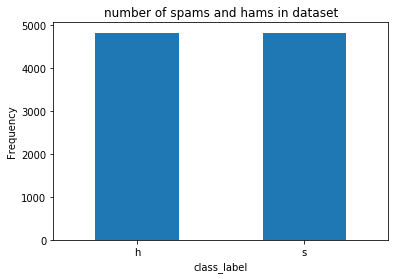

In [6]:
# Display new class counts of ham and spam after balancing
df_balanced.class_label.value_counts()
count_class=pd.value_counts(df_balanced['class_label'],sort=True)
count_class.plot(kind='bar',rot=0)
plt.title("number of spams and hams in dataset")
plt.xticks(range(2),'hs')
plt.xlabel("class_label")
plt.ylabel("Frequency")

In [7]:
#from sklearn.feature_extraction.text import CountVectorizer
#cv=CountVectorizer(max_features=2000)
#x=cv.fit_transform(MSG_LIST).toarray()
#print(x)

In [8]:

from sklearn.feature_extraction.text import TfidfVectorizer # for document matrix
tf=TfidfVectorizer(max_features=2000)#top 2000 common words AND THIER TFIDF CALCULATED
x=tf.fit_transform(MSG_LIST)#independat feature (messages)
print(x)
pd.DataFrame(x.todense(),columns=tf.get_feature_names())


  (0, 632)	0.1380964477414673
  (0, 1104)	0.3962738201262034
  (0, 1530)	0.2735244065111589
  (0, 596)	0.21257239464134114
  (0, 1218)	0.27900818398080957
  (0, 89)	0.2609201810970271
  (0, 1358)	0.2338974298962167
  (0, 1229)	0.2549089832219231
  (0, 1871)	0.22426014337802552
  (0, 284)	0.40533550376711436
  (0, 1486)	0.3442574411419326
  (0, 1622)	0.32431409668407707
  (1, 1135)	0.20803730683999136
  (1, 1745)	0.22679860640147062
  (1, 1901)	0.21990755749849358
  (1, 821)	0.3946066553746685
  (1, 1446)	0.42782761612391484
  (1, 1192)	0.2948780471190894
  (1, 615)	0.3849712531395814
  (1, 836)	0.3849712531395814
  (1, 1138)	0.2808894696109847
  (1, 1049)	0.23646345884529224
  (2, 1358)	0.387459092122259
  (2, 1745)	0.3114672027162453
  (2, 635)	0.41863580276862505
  :	:
  (9642, 663)	0.40906354687494956
  (9642, 1519)	0.45800136559003857
  (9643, 945)	0.5331754636087307
  (9643, 88)	0.8460046837964995
  (9644, 670)	0.25009914214102347
  (9644, 1473)	0.33997941458459524
  (9644, 1870)	

,aberdeen,abiola,able,abroad,abt,abta,abuse,ac,accept,access,...,yet,yhl,yijue,yoga,yr,yup,zebra,zed,zoe,zouk
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.204248,0.0,0.0


In [9]:
y=pd.get_dummies(df_balanced["class_label"])
y=y.iloc[:,1].values #dependant feature (label) is spam or not
print(y)

[1 1 1 ... 0 0 0]


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix 
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

classifier = DecisionTreeClassifier(criterion="gini", max_depth=100)
classifier=classifier.fit(x_train, y_train)

y_pred = classifier.predict(x_test)

In [12]:
cf_matrix=confusion_matrix(y_test,y_pred)# where diagonals are correctly predicted values

print(classification_report(y_test, y_pred))

accuracy=accuracy_score(y_pred,y_test)
print('Accuracy: %.3f' % accuracy)

score_2 = f1_score(y_test, y_pred, average='binary')
print('F-Measure: %.3f' % score_2)


              precision    recall  f1-score   support

           0       1.00      0.95      0.97      1461
           1       0.95      1.00      0.97      1434

    accuracy                           0.97      2895
   macro avg       0.97      0.97      0.97      2895
weighted avg       0.97      0.97      0.97      2895

Accuracy: 0.972
F-Measure: 0.972


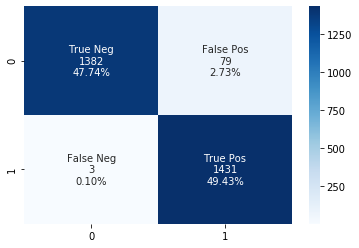

In [13]:
#heat maps 
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in
                cf_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in
                     cf_matrix.flatten()/np.sum(cf_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
          zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')